# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:23:21.823146: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:23:25.235515
2025-04-14 22:23:25.235515


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:23:19"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

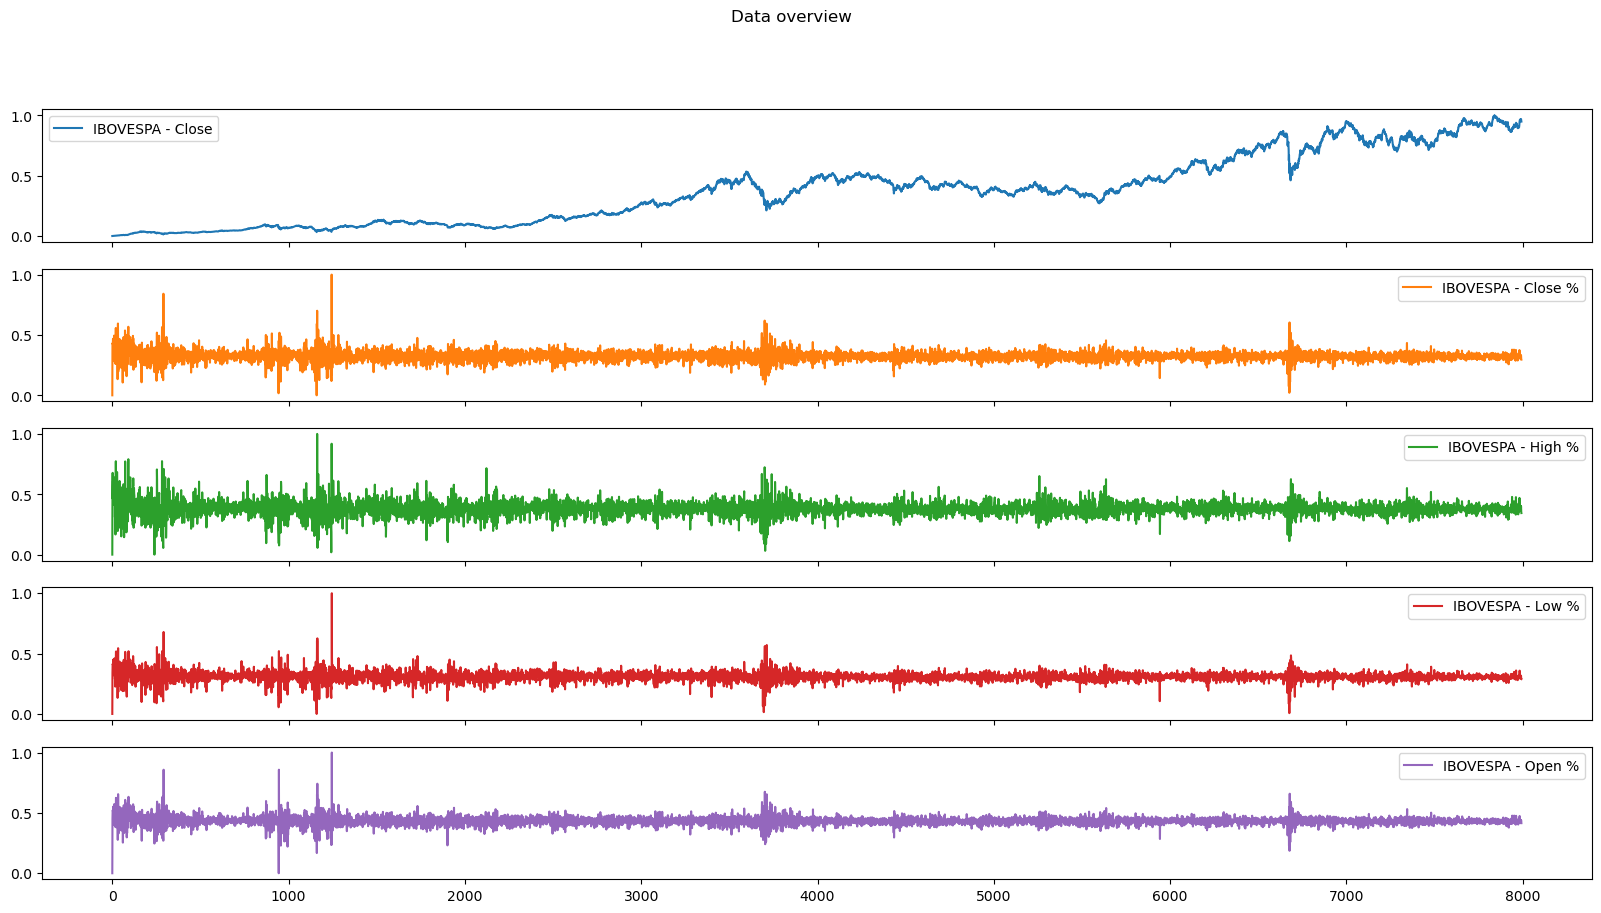

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

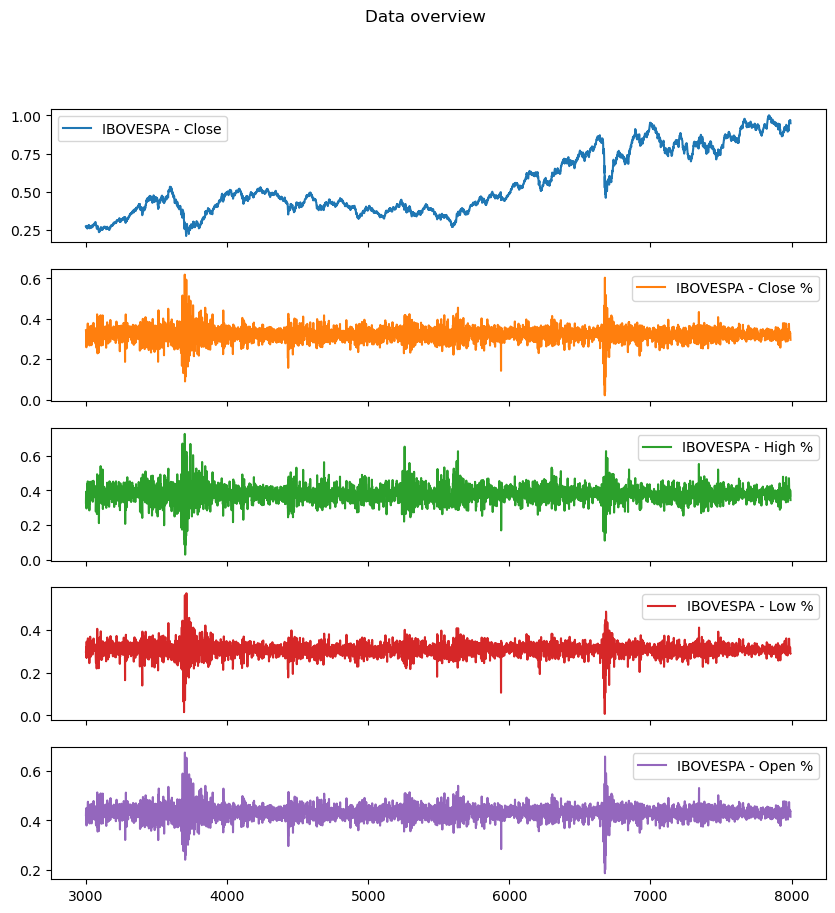

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

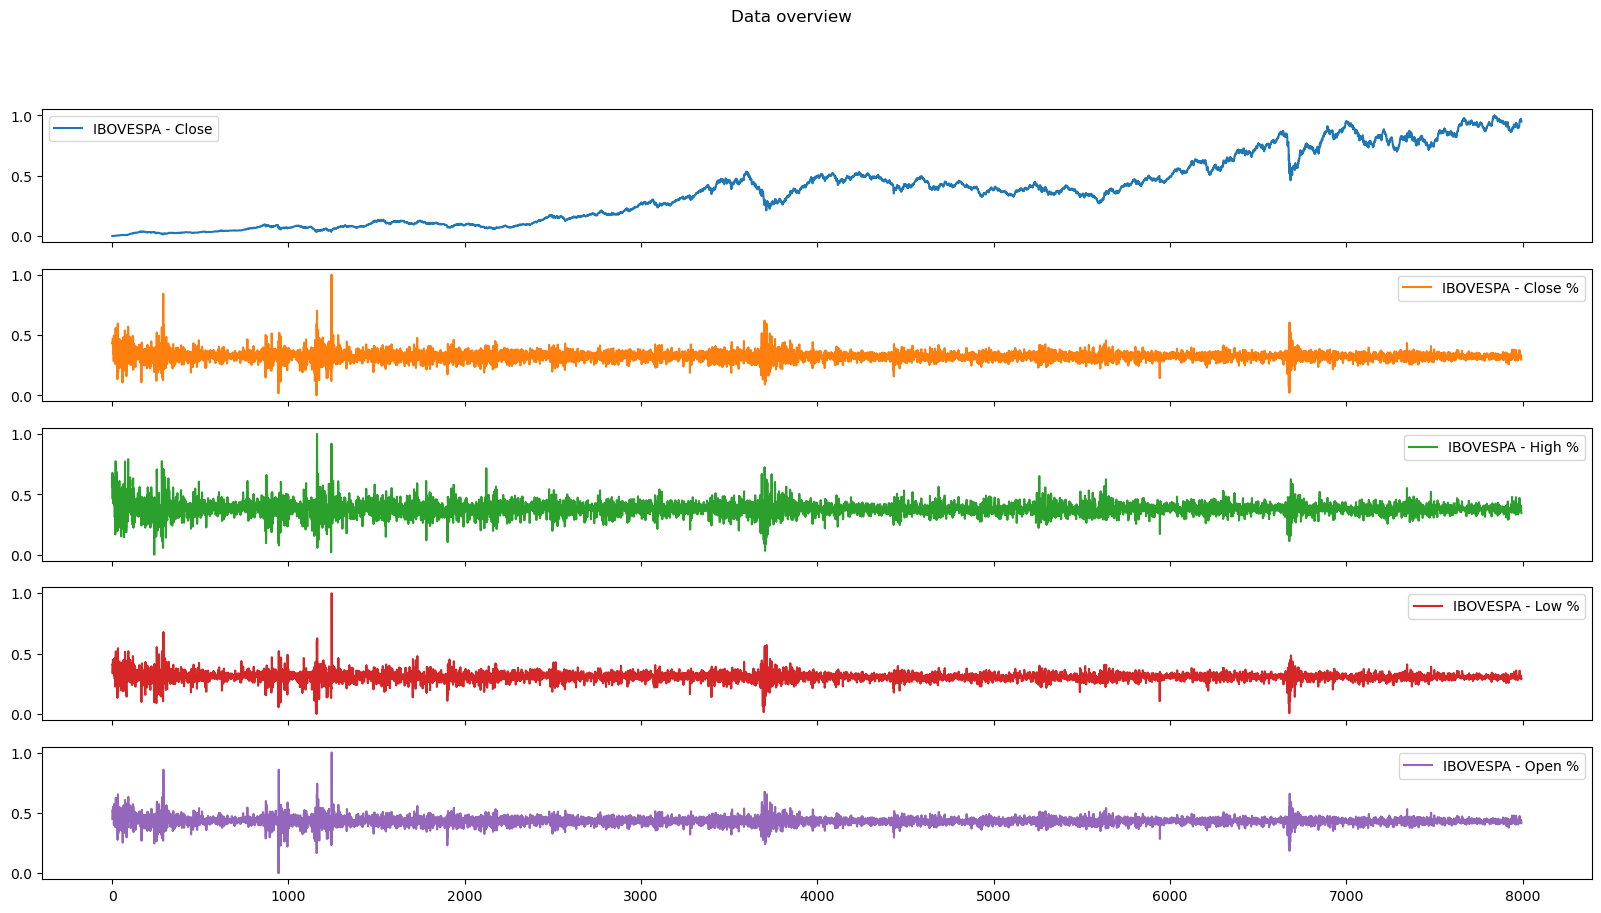

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

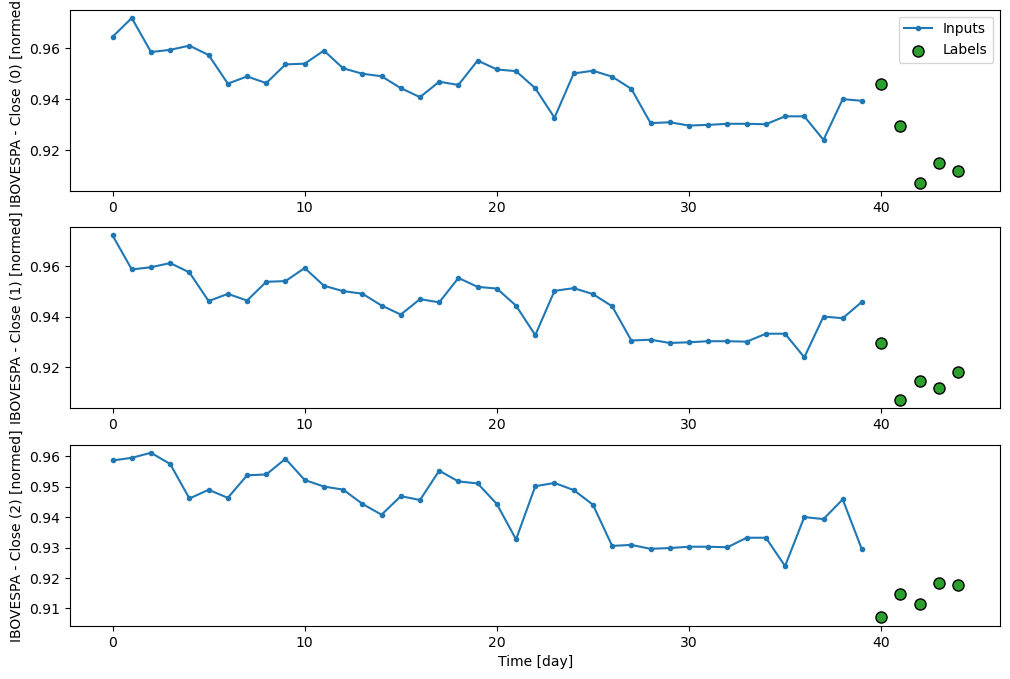

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

5

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18:46 5s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 134.4688 - mean_squared_error: 2.6894e-04 - root_mean_squared_error: 0.0154 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 124.8786 - mean_squared_error: 3.1328e-04 - root_mean_squared_error: 0.0170

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 118.6253 - mean_squared_error: 3.8277e-04 - root_mean_squared_error: 0.0189

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 112.9419 - mean_squared_error: 4.0408e-04 - root_mean_squared_error: 0.0196

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 107.2171 - mean_squared_error: 4.0364e-04 - root_mean_squared_error: 0.0197

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 101.4224 - mean_squared_error: 3.9356e-04 - root_mean_squared_error: 0.0195

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 98.6488 - mean_squared_error: 3.8701e-04 - root_mean_squared_error: 0.0193 

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 93.6230 - mean_squared_error: 3.7333e-04 - root_mean_squared_error: 0.0190

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 89.0549 - mean_squared_error: 3.5926e-04 - root_mean_squared_error: 0.0186

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 84.8950 - mean_squared_error: 3.4551e-04 - root_mean_squared_error: 0.0182

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 81.1161 - mean_squared_error: 3.3240e-04 - root_mean_squared_error: 0.0179

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 79.3744 - mean_squared_error: 3.2625e-04 - root_mean_squared_error: 0.0177

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 76.1515 - mean_squared_error: 3.1468e-04 - root_mean_squared_error: 0.0174

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 73.2335 - mean_squared_error: 3.0422e-04 - root_mean_squared_error: 0.0170

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 70.5897 - mean_squared_error: 2.9481e-04 - root_mean_squared_error: 0.0168

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 68.1808 - mean_squared_error: 2.8620e-04 - root_mean_squared_error: 0.0165

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.0012 - mean_squared_error: 2.7887e-04 - root_mean_squared_error: 0.0163

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 64.0347 - mean_squared_error: 2.7267e-04 - root_mean_squared_error: 0.0161

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.3557 - mean_squared_error: 2.6902e-04 - root_mean_squared_error: 0.0160

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.8316 - mean_squared_error: 2.6579e-04 - root_mean_squared_error: 0.0159

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.4535 - mean_squared_error: 2.6407e-04 - root_mean_squared_error: 0.0159

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.2026 - mean_squared_error: 2.6347e-04 - root_mean_squared_error: 0.0159

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.0546 - mean_squared_error: 2.6385e-04 - root_mean_squared_error: 0.0159

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.0041 - mean_squared_error: 2.6660e-04 - root_mean_squared_error: 0.0160

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.0243 - mean_squared_error: 2.6984e-04 - root_mean_squared_error: 0.0161

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.0830 - mean_squared_error: 2.7252e-04 - root_mean_squared_error: 0.0162

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.1790 - mean_squared_error: 2.7464e-04 - root_mean_squared_error: 0.0163

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.7418 - mean_squared_error: 2.7556e-04 - root_mean_squared_error: 0.0163

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.8902 - mean_squared_error: 2.7703e-04 - root_mean_squared_error: 0.0164

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.0689 - mean_squared_error: 2.7806e-04 - root_mean_squared_error: 0.0164

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 50.2903 - mean_squared_error: 2.7896e-04 - root_mean_squared_error: 0.0164

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 49.5470 - mean_squared_error: 2.7970e-04 - root_mean_squared_error: 0.0165

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 48.8344 - mean_squared_error: 2.8023e-04 - root_mean_squared_error: 0.0165

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 48.4925 - mean_squared_error: 2.8049e-04 - root_mean_squared_error: 0.0165

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 47.8470 - mean_squared_error: 2.8124e-04 - root_mean_squared_error: 0.0165

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 47.2354 - mean_squared_error: 2.8195e-04 - root_mean_squared_error: 0.0166

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 46.6435 - mean_squared_error: 2.8245e-04 - root_mean_squared_error: 0.0166

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 46.0843 - mean_squared_error: 2.8318e-04 - root_mean_squared_error: 0.0166

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 45.5621 - mean_squared_error: 2.8497e-04 - root_mean_squared_error: 0.0167

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 45.0799 - mean_squared_error: 2.8957e-04 - root_mean_squared_error: 0.0168

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 44.6302 - mean_squared_error: 2.9629e-04 - root_mean_squared_error: 0.0170

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 44.1966 - mean_squared_error: 3.0288e-04 - root_mean_squared_error: 0.0171

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 43.7816 - mean_squared_error: 3.1000e-04 - root_mean_squared_error: 0.0173

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 43.3777 - mean_squared_error: 3.1673e-04 - root_mean_squared_error: 0.0175

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 42.9861 - mean_squared_error: 3.2336e-04 - root_mean_squared_error: 0.0176

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 42.6008 - mean_squared_error: 3.2943e-04 - root_mean_squared_error: 0.0178

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 42.2225 - mean_squared_error: 3.3503e-04 - root_mean_squared_error: 0.0179

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 41.8505 - mean_squared_error: 3.4019e-04 - root_mean_squared_error: 0.0181

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 41.4887 - mean_squared_error: 3.4559e-04 - root_mean_squared_error: 0.0182

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 41.1350 - mean_squared_error: 3.5078e-04 - root_mean_squared_error: 0.0183

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 40.7901 - mean_squared_error: 3.5600e-04 - root_mean_squared_error: 0.0184

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 40.4574 - mean_squared_error: 3.6238e-04 - root_mean_squared_error: 0.0186

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 40.1345 - mean_squared_error: 3.6939e-04 - root_mean_squared_error: 0.0188

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 39.8192 - mean_squared_error: 3.7656e-04 - root_mean_squared_error: 0.0189

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 39.5104 - mean_squared_error: 3.8389e-04 - root_mean_squared_error: 0.0191

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 39.2063 - mean_squared_error: 3.9083e-04 - root_mean_squared_error: 0.0192

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 38.9076 - mean_squared_error: 3.9764e-04 - root_mean_squared_error: 0.0194

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 38.6155 - mean_squared_error: 4.0489e-04 - root_mean_squared_error: 0.0196

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 38.3369 - mean_squared_error: 4.1619e-04 - root_mean_squared_error: 0.0198

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 38.0798 - mean_squared_error: 4.3546e-04 - root_mean_squared_error: 0.0201

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 37.8335 - mean_squared_error: 4.5631e-04 - root_mean_squared_error: 0.0205

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 37.5925 - mean_squared_error: 4.7677e-04 - root_mean_squared_error: 0.0208

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 37.3603 - mean_squared_error: 5.0000e-04 - root_mean_squared_error: 0.0212

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 37.1392 - mean_squared_error: 5.3054e-04 - root_mean_squared_error: 0.0216

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 36.9284 - mean_squared_error: 5.6780e-04 - root_mean_squared_error: 0.0221

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 36.7252 - mean_squared_error: 6.0777e-04 - root_mean_squared_error: 0.0227

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 36.5282 - mean_squared_error: 6.4896e-04 - root_mean_squared_error: 0.0232

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 36.3353 - mean_squared_error: 6.8982e-04 - root_mean_squared_error: 0.0237

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 36.1451 - mean_squared_error: 7.2927e-04 - root_mean_squared_error: 0.0242

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 35.9593 - mean_squared_error: 7.6849e-04 - root_mean_squared_error: 0.0247

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 35.7797 - mean_squared_error: 8.0837e-04 - root_mean_squared_error: 0.0252

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 35.6033 - mean_squared_error: 8.4725e-04 - root_mean_squared_error: 0.0257

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 35.4289 - mean_squared_error: 8.8473e-04 - root_mean_squared_error: 0.0262

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 35.2562 - mean_squared_error: 9.2071e-04 - root_mean_squared_error: 0.0266

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 35.0848 - mean_squared_error: 9.5516e-04 - root_mean_squared_error: 0.0271

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 34.9148 - mean_squared_error: 9.8819e-04 - root_mean_squared_error: 0.0275

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 34.7462 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0279    

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 34.5801 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0283

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 34.4177 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 34.2570 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 34.0983 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 33.9414 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 33.7876 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 33.6364 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 33.4864 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 33.3380 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0311

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 33.1912 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 33.0472 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 32.9075 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 32.7693 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0322

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 32.6325 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0325

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 32.4984 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 32.3670 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 32.2383 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 32.1119 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0336

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 31.9882 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 31.8672 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 31.7486 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 31.6309 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0347

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 31.5139 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 31.3978 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 31.2823 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 31.1675 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 31.0534 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 30.9403 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 30.8305 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 30.7226 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 30.6156 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 30.5100 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 30.4061 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 30.3043 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 30.2036 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 30.1035 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 30.0039 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 29.9054 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 29.8076 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 29.7104 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0394

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 29.6137 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 29.5179 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

237/237 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 29.3768 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402 - val_loss: 0.1869 - val_mean_absolute_error: 0.1869 - val_mean_absolute_percentage_error: 19.9134 - val_mean_squared_error: 0.0357 - val_root_mean_squared_error: 0.1890 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.7365 - mean_absolute_error: 0.7365 - mean_absolute_percentage_error: 9780.5449 - mean_squared_error: 0.5425 - root_mean_squared_error: 0.7365

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7325 - mean_absolute_error: 0.7325 - mean_absolute_percentage_error: 8138.2959 - mean_squared_error: 0.5366 - root_mean_squared_error: 0.7325 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7256 - mean_absolute_error: 0.7256 - mean_absolute_percentage_error: 6900.0146 - mean_squared_error: 0.5267 - root_mean_squared_error: 0.7257

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7184 - mean_absolute_error: 0.7184 - mean_absolute_percentage_error: 6112.3608 - mean_squared_error: 0.5166 - root_mean_squared_error: 0.7186

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7111 - mean_absolute_error: 0.7111 - mean_absolute_percentage_error: 5612.6587 - mean_squared_error: 0.5065 - root_mean_squared_error: 0.7115

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7072 - mean_absolute_error: 0.7072 - mean_absolute_percentage_error: 5416.9087 - mean_squared_error: 0.5013 - root_mean_squared_error: 0.7077

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6988 - mean_absolute_error: 0.6988 - mean_absolute_percentage_error: 5088.6509 - mean_squared_error: 0.4902 - root_mean_squared_error: 0.6996

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6880 - mean_absolute_error: 0.6880 - mean_absolute_percentage_error: 4812.6099 - mean_squared_error: 0.4773 - root_mean_squared_error: 0.6900

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6775 - mean_absolute_error: 0.6775 - mean_absolute_percentage_error: 4578.0586 - mean_squared_error: 0.4659 - root_mean_squared_error: 0.6814

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6663 - mean_absolute_error: 0.6663 - mean_absolute_percentage_error: 4371.0972 - mean_squared_error: 0.4540 - root_mean_squared_error: 0.6723

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6537 - mean_absolute_error: 0.6537 - mean_absolute_percentage_error: 4182.9512 - mean_squared_error: 0.4417 - root_mean_squared_error: 0.6626

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6434 - mean_absolute_error: 0.6434 - mean_absolute_percentage_error: 4018.0583 - mean_squared_error: 0.4317 - root_mean_squared_error: 0.6547

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6331 - mean_absolute_error: 0.6331 - mean_absolute_percentage_error: 3867.8611 - mean_squared_error: 0.4219 - root_mean_squared_error: 0.6468

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6234 - mean_absolute_error: 0.6234 - mean_absolute_percentage_error: 3730.2676 - mean_squared_error: 0.4126 - root_mean_squared_error: 0.6393

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6138 - mean_absolute_error: 0.6138 - mean_absolute_percentage_error: 3603.0249 - mean_squared_error: 0.4034 - root_mean_squared_error: 0.6317

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6042 - mean_absolute_error: 0.6042 - mean_absolute_percentage_error: 3485.3589 - mean_squared_error: 0.3945 - root_mean_squared_error: 0.6242

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5947 - mean_absolute_error: 0.5947 - mean_absolute_percentage_error: 3376.0935 - mean_squared_error: 0.3858 - root_mean_squared_error: 0.6167

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5861 - mean_absolute_error: 0.5861 - mean_absolute_percentage_error: 3275.3862 - mean_squared_error: 0.3778 - root_mean_squared_error: 0.6098

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5779 - mean_absolute_error: 0.5779 - mean_absolute_percentage_error: 3182.2434 - mean_squared_error: 0.3702 - root_mean_squared_error: 0.6033

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5701 - mean_absolute_error: 0.5701 - mean_absolute_percentage_error: 3095.9119 - mean_squared_error: 0.3631 - root_mean_squared_error: 0.5970

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5631 - mean_absolute_error: 0.5631 - mean_absolute_percentage_error: 3015.9895 - mean_squared_error: 0.3567 - root_mean_squared_error: 0.5914

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5563 - mean_absolute_error: 0.5563 - mean_absolute_percentage_error: 2940.9385 - mean_squared_error: 0.3506 - root_mean_squared_error: 0.5861

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5499 - mean_absolute_error: 0.5499 - mean_absolute_percentage_error: 2870.4424 - mean_squared_error: 0.3448 - root_mean_squared_error: 0.5809

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5440 - mean_absolute_error: 0.5440 - mean_absolute_percentage_error: 2804.1821 - mean_squared_error: 0.3396 - root_mean_squared_error: 0.5762

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5383 - mean_absolute_error: 0.5383 - mean_absolute_percentage_error: 2741.4644 - mean_squared_error: 0.3345 - root_mean_squared_error: 0.5717

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5327 - mean_absolute_error: 0.5327 - mean_absolute_percentage_error: 2681.8936 - mean_squared_error: 0.3296 - root_mean_squared_error: 0.5672

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5274 - mean_absolute_error: 0.5274 - mean_absolute_percentage_error: 2625.4136 - mean_squared_error: 0.3249 - root_mean_squared_error: 0.5629

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5221 - mean_absolute_error: 0.5221 - mean_absolute_percentage_error: 2571.6426 - mean_squared_error: 0.3202 - root_mean_squared_error: 0.5586

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5170 - mean_absolute_error: 0.5170 - mean_absolute_percentage_error: 2520.4375 - mean_squared_error: 0.3158 - root_mean_squared_error: 0.5544

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5120 - mean_absolute_error: 0.5120 - mean_absolute_percentage_error: 2471.6726 - mean_squared_error: 0.3115 - root_mean_squared_error: 0.5504

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5072 - mean_absolute_error: 0.5072 - mean_absolute_percentage_error: 2425.1755 - mean_squared_error: 0.3073 - root_mean_squared_error: 0.5464

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5024 - mean_absolute_error: 0.5024 - mean_absolute_percentage_error: 2380.7012 - mean_squared_error: 0.3033 - root_mean_squared_error: 0.5426

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4977 - mean_absolute_error: 0.4977 - mean_absolute_percentage_error: 2338.1123 - mean_squared_error: 0.2993 - root_mean_squared_error: 0.5387

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4931 - mean_absolute_error: 0.4931 - mean_absolute_percentage_error: 2297.3286 - mean_squared_error: 0.2955 - root_mean_squared_error: 0.5350

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4885 - mean_absolute_error: 0.4885 - mean_absolute_percentage_error: 2258.1956 - mean_squared_error: 0.2917 - root_mean_squared_error: 0.5313

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4840 - mean_absolute_error: 0.4840 - mean_absolute_percentage_error: 2220.5791 - mean_squared_error: 0.2880 - root_mean_squared_error: 0.5276

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4795 - mean_absolute_error: 0.4795 - mean_absolute_percentage_error: 2184.3662 - mean_squared_error: 0.2844 - root_mean_squared_error: 0.5240

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4751 - mean_absolute_error: 0.4751 - mean_absolute_percentage_error: 2149.4822 - mean_squared_error: 0.2809 - root_mean_squared_error: 0.5205

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4707 - mean_absolute_error: 0.4707 - mean_absolute_percentage_error: 2115.8350 - mean_squared_error: 0.2774 - root_mean_squared_error: 0.5170

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4664 - mean_absolute_error: 0.4664 - mean_absolute_percentage_error: 2083.3538 - mean_squared_error: 0.2741 - root_mean_squared_error: 0.5135

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4621 - mean_absolute_error: 0.4621 - mean_absolute_percentage_error: 2051.9827 - mean_squared_error: 0.2708 - root_mean_squared_error: 0.5101

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4578 - mean_absolute_error: 0.4578 - mean_absolute_percentage_error: 2021.6664 - mean_squared_error: 0.2676 - root_mean_squared_error: 0.5068

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4537 - mean_absolute_error: 0.4537 - mean_absolute_percentage_error: 1992.3521 - mean_squared_error: 0.2645 - root_mean_squared_error: 0.5035

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4496 - mean_absolute_error: 0.4496 - mean_absolute_percentage_error: 1963.9857 - mean_squared_error: 0.2614 - root_mean_squared_error: 0.5003

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4456 - mean_absolute_error: 0.4456 - mean_absolute_percentage_error: 1936.5231 - mean_squared_error: 0.2584 - root_mean_squared_error: 0.4971

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4416 - mean_absolute_error: 0.4416 - mean_absolute_percentage_error: 1909.9180 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4940

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4378 - mean_absolute_error: 0.4378 - mean_absolute_percentage_error: 1884.1360 - mean_squared_error: 0.2527 - root_mean_squared_error: 0.4909

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4340 - mean_absolute_error: 0.4340 - mean_absolute_percentage_error: 1859.1300 - mean_squared_error: 0.2499 - root_mean_squared_error: 0.4879

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4302 - mean_absolute_error: 0.4302 - mean_absolute_percentage_error: 1834.8707 - mean_squared_error: 0.2472 - root_mean_squared_error: 0.4850

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4266 - mean_absolute_error: 0.4266 - mean_absolute_percentage_error: 1811.3231 - mean_squared_error: 0.2445 - root_mean_squared_error: 0.4821

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4230 - mean_absolute_error: 0.4230 - mean_absolute_percentage_error: 1788.4550 - mean_squared_error: 0.2420 - root_mean_squared_error: 0.4792

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4196 - mean_absolute_error: 0.4196 - mean_absolute_percentage_error: 1766.2400 - mean_squared_error: 0.2395 - root_mean_squared_error: 0.4765

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4162 - mean_absolute_error: 0.4162 - mean_absolute_percentage_error: 1744.6450 - mean_squared_error: 0.2370 - root_mean_squared_error: 0.4737

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4128 - mean_absolute_error: 0.4128 - mean_absolute_percentage_error: 1723.6423 - mean_squared_error: 0.2346 - root_mean_squared_error: 0.4710

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4096 - mean_absolute_error: 0.4096 - mean_absolute_percentage_error: 1703.2092 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4684

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4064 - mean_absolute_error: 0.4064 - mean_absolute_percentage_error: 1683.3219 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4658

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4033 - mean_absolute_error: 0.4033 - mean_absolute_percentage_error: 1663.9567 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4633

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4003 - mean_absolute_error: 0.4003 - mean_absolute_percentage_error: 1645.0928 - mean_squared_error: 0.2256 - root_mean_squared_error: 0.4608

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3973 - mean_absolute_error: 0.3973 - mean_absolute_percentage_error: 1626.7119 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4584

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3944 - mean_absolute_error: 0.3944 - mean_absolute_percentage_error: 1608.7947 - mean_squared_error: 0.2213 - root_mean_squared_error: 0.4560

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3916 - mean_absolute_error: 0.3916 - mean_absolute_percentage_error: 1591.3250 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4536

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3888 - mean_absolute_error: 0.3888 - mean_absolute_percentage_error: 1574.2834 - mean_squared_error: 0.2173 - root_mean_squared_error: 0.4513

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3860 - mean_absolute_error: 0.3860 - mean_absolute_percentage_error: 1557.6514 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4490

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3833 - mean_absolute_error: 0.3833 - mean_absolute_percentage_error: 1541.4139 - mean_squared_error: 0.2134 - root_mean_squared_error: 0.4467

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3807 - mean_absolute_error: 0.3807 - mean_absolute_percentage_error: 1525.5566 - mean_squared_error: 0.2115 - root_mean_squared_error: 0.4445

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3781 - mean_absolute_error: 0.3781 - mean_absolute_percentage_error: 1510.0656 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4424

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3756 - mean_absolute_error: 0.3756 - mean_absolute_percentage_error: 1494.9292 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4402

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3731 - mean_absolute_error: 0.3731 - mean_absolute_percentage_error: 1480.1332 - mean_squared_error: 0.2061 - root_mean_squared_error: 0.4381

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3706 - mean_absolute_error: 0.3706 - mean_absolute_percentage_error: 1465.6661 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4360

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3682 - mean_absolute_error: 0.3682 - mean_absolute_percentage_error: 1451.5155 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4340

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3658 - mean_absolute_error: 0.3658 - mean_absolute_percentage_error: 1437.6719 - mean_squared_error: 0.2010 - root_mean_squared_error: 0.4320

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3635 - mean_absolute_error: 0.3635 - mean_absolute_percentage_error: 1424.1261 - mean_squared_error: 0.1994 - root_mean_squared_error: 0.4300

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3612 - mean_absolute_error: 0.3612 - mean_absolute_percentage_error: 1410.8677 - mean_squared_error: 0.1978 - root_mean_squared_error: 0.4280

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3589 - mean_absolute_error: 0.3589 - mean_absolute_percentage_error: 1397.8894 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4261

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3567 - mean_absolute_error: 0.3567 - mean_absolute_percentage_error: 1385.1801 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4242

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3545 - mean_absolute_error: 0.3545 - mean_absolute_percentage_error: 1372.7317 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4223

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3524 - mean_absolute_error: 0.3524 - mean_absolute_percentage_error: 1360.5363 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4205

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3503 - mean_absolute_error: 0.3503 - mean_absolute_percentage_error: 1348.5861 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4187

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3483 - mean_absolute_error: 0.3483 - mean_absolute_percentage_error: 1336.8735 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.4169

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3462 - mean_absolute_error: 0.3462 - mean_absolute_percentage_error: 1325.3911 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.4151

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3442 - mean_absolute_error: 0.3442 - mean_absolute_percentage_error: 1314.1309 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4134

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3423 - mean_absolute_error: 0.3423 - mean_absolute_percentage_error: 1303.0862 - mean_squared_error: 0.1846 - root_mean_squared_error: 0.4117

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3403 - mean_absolute_error: 0.3403 - mean_absolute_percentage_error: 1292.2510 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.4100

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3384 - mean_absolute_error: 0.3384 - mean_absolute_percentage_error: 1281.6204 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.4083

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3366 - mean_absolute_error: 0.3366 - mean_absolute_percentage_error: 1271.1881 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.4067

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3347 - mean_absolute_error: 0.3347 - mean_absolute_percentage_error: 1260.9485 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.4050

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 1250.8958 - mean_squared_error: 0.1781 - root_mean_squared_error: 0.4034

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3312 - mean_absolute_error: 0.3312 - mean_absolute_percentage_error: 1241.0253 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.4019

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3294 - mean_absolute_error: 0.3294 - mean_absolute_percentage_error: 1231.3318 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.4003

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3277 - mean_absolute_error: 0.3277 - mean_absolute_percentage_error: 1221.8120 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3988

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1212.4590 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3973

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3244 - mean_absolute_error: 0.3244 - mean_absolute_percentage_error: 1203.2681 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3958

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3227 - mean_absolute_error: 0.3227 - mean_absolute_percentage_error: 1194.2346 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3943

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3211 - mean_absolute_error: 0.3211 - mean_absolute_percentage_error: 1185.3539 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3928

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3195 - mean_absolute_error: 0.3195 - mean_absolute_percentage_error: 1176.6227 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3914

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3180 - mean_absolute_error: 0.3180 - mean_absolute_percentage_error: 1168.0365 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3900

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 1159.5908 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3886

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3149 - mean_absolute_error: 0.3149 - mean_absolute_percentage_error: 1151.2832 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3872

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3134 - mean_absolute_error: 0.3134 - mean_absolute_percentage_error: 1143.1101 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3858

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3120 - mean_absolute_error: 0.3120 - mean_absolute_percentage_error: 1135.0682 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3845

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - mean_absolute_percentage_error: 1127.1542 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3832

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 1119.3646 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3819

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1111.6960 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3806

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1104.1455 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3793

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1096.7113 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3780

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1089.3920 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3768

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3024 - mean_absolute_error: 0.3024 - mean_absolute_percentage_error: 1082.1824 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3756

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1075.0803 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3744

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2998 - mean_absolute_error: 0.2998 - mean_absolute_percentage_error: 1068.0836 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3732

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2986 - mean_absolute_error: 0.2986 - mean_absolute_percentage_error: 1061.1896 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3720

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2973 - mean_absolute_error: 0.2973 - mean_absolute_percentage_error: 1054.3956 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3708

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1047.7004 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3697

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2950 - mean_absolute_error: 0.2950 - mean_absolute_percentage_error: 1041.1019 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3686

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2938 - mean_absolute_error: 0.2938 - mean_absolute_percentage_error: 1034.5973 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3674

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2927 - mean_absolute_error: 0.2927 - mean_absolute_percentage_error: 1028.1840 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3664

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - mean_absolute_percentage_error: 1021.8602 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3653

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 1015.6238 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3642

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1009.4728 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3631

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1003.4059 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3621

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2871 - mean_absolute_error: 0.2871 - mean_absolute_percentage_error: 997.4339 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3610 - val_loss: 0.0959 - val_mean_absolute_error: 0.0959 - val_mean_absolute_percentage_error: 10.2340 - val_mean_squared_error: 0.0145 - val_root_mean_squared_error: 0.1205 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8558 - mean_absolute_error: 0.8558 - mean_absolute_percentage_error: 11358.3047 - mean_squared_error: 0.7410 - root_mean_squared_error: 0.8608

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8543 - mean_absolute_error: 0.8543 - mean_absolute_percentage_error: 9484.9561 - mean_squared_error: 0.7405 - root_mean_squared_error: 0.8605  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8342 - mean_absolute_error: 0.8342 - mean_absolute_percentage_error: 8008.7163 - mean_squared_error: 0.7115 - root_mean_squared_error: 0.8432

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7996 - mean_absolute_error: 0.7996 - mean_absolute_percentage_error: 7004.9199 - mean_squared_error: 0.6673 - root_mean_squared_error: 0.8154

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7569 - mean_absolute_error: 0.7569 - mean_absolute_percentage_error: 6274.4673 - mean_squared_error: 0.6188 - root_mean_squared_error: 0.7831

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7165 - mean_absolute_error: 0.7165 - mean_absolute_percentage_error: 5712.7427 - mean_squared_error: 0.5748 - root_mean_squared_error: 0.7523

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6843 - mean_absolute_error: 0.6843 - mean_absolute_percentage_error: 5276.1514 - mean_squared_error: 0.5385 - root_mean_squared_error: 0.7261

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6580 - mean_absolute_error: 0.6580 - mean_absolute_percentage_error: 4926.1226 - mean_squared_error: 0.5083 - root_mean_squared_error: 0.7038

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6343 - mean_absolute_error: 0.6343 - mean_absolute_percentage_error: 4630.4028 - mean_squared_error: 0.4819 - root_mean_squared_error: 0.6836

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6121 - mean_absolute_error: 0.6121 - mean_absolute_percentage_error: 4373.7935 - mean_squared_error: 0.4581 - root_mean_squared_error: 0.6649

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5915 - mean_absolute_error: 0.5915 - mean_absolute_percentage_error: 4148.5562 - mean_squared_error: 0.4367 - root_mean_squared_error: 0.6476

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5724 - mean_absolute_error: 0.5724 - mean_absolute_percentage_error: 3949.1077 - mean_squared_error: 0.4174 - root_mean_squared_error: 0.6316

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5551 - mean_absolute_error: 0.5551 - mean_absolute_percentage_error: 3771.1719 - mean_squared_error: 0.4000 - root_mean_squared_error: 0.6169

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5391 - mean_absolute_error: 0.5391 - mean_absolute_percentage_error: 3610.8281 - mean_squared_error: 0.3842 - root_mean_squared_error: 0.6032

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5240 - mean_absolute_error: 0.5240 - mean_absolute_percentage_error: 3465.3132 - mean_squared_error: 0.3697 - root_mean_squared_error: 0.5903

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5101 - mean_absolute_error: 0.5101 - mean_absolute_percentage_error: 3333.0681 - mean_squared_error: 0.3565 - root_mean_squared_error: 0.5784

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4972 - mean_absolute_error: 0.4972 - mean_absolute_percentage_error: 3212.1440 - mean_squared_error: 0.3443 - root_mean_squared_error: 0.5672

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4850 - mean_absolute_error: 0.4850 - mean_absolute_percentage_error: 3100.9517 - mean_squared_error: 0.3330 - root_mean_squared_error: 0.5567

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4735 - mean_absolute_error: 0.4735 - mean_absolute_percentage_error: 2998.5796 - mean_squared_error: 0.3225 - root_mean_squared_error: 0.5468

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4628 - mean_absolute_error: 0.4628 - mean_absolute_percentage_error: 2903.9897 - mean_squared_error: 0.3128 - root_mean_squared_error: 0.5374

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4526 - mean_absolute_error: 0.4526 - mean_absolute_percentage_error: 2816.0359 - mean_squared_error: 0.3037 - root_mean_squared_error: 0.5286

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4429 - mean_absolute_error: 0.4429 - mean_absolute_percentage_error: 2734.0000 - mean_squared_error: 0.2952 - root_mean_squared_error: 0.5202

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4337 - mean_absolute_error: 0.4337 - mean_absolute_percentage_error: 2657.2915 - mean_squared_error: 0.2872 - root_mean_squared_error: 0.5122

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4250 - mean_absolute_error: 0.4250 - mean_absolute_percentage_error: 2585.3896 - mean_squared_error: 0.2797 - root_mean_squared_error: 0.5045

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4168 - mean_absolute_error: 0.4168 - mean_absolute_percentage_error: 2517.8181 - mean_squared_error: 0.2727 - root_mean_squared_error: 0.4973

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 2454.1643 - mean_squared_error: 0.2660 - root_mean_squared_error: 0.4903

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4013 - mean_absolute_error: 0.4013 - mean_absolute_percentage_error: 2394.0796 - mean_squared_error: 0.2597 - root_mean_squared_error: 0.4837

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3941 - mean_absolute_error: 0.3941 - mean_absolute_percentage_error: 2337.2607 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4773

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3872 - mean_absolute_error: 0.3872 - mean_absolute_percentage_error: 2283.4465 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4712

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3806 - mean_absolute_error: 0.3806 - mean_absolute_percentage_error: 2232.4087 - mean_squared_error: 0.2426 - root_mean_squared_error: 0.4653

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3742 - mean_absolute_error: 0.3742 - mean_absolute_percentage_error: 2183.9143 - mean_squared_error: 0.2375 - root_mean_squared_error: 0.4596

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3681 - mean_absolute_error: 0.3681 - mean_absolute_percentage_error: 2137.7744 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4542

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3622 - mean_absolute_error: 0.3622 - mean_absolute_percentage_error: 2093.8181 - mean_squared_error: 0.2279 - root_mean_squared_error: 0.4490

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3566 - mean_absolute_error: 0.3566 - mean_absolute_percentage_error: 2051.9082 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4439

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3512 - mean_absolute_error: 0.3512 - mean_absolute_percentage_error: 2011.8923 - mean_squared_error: 0.2192 - root_mean_squared_error: 0.4391

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3460 - mean_absolute_error: 0.3460 - mean_absolute_percentage_error: 1973.6562 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4344

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1937.0457 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4298

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3361 - mean_absolute_error: 0.3361 - mean_absolute_percentage_error: 1901.9650 - mean_squared_error: 0.2074 - root_mean_squared_error: 0.4254

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3314 - mean_absolute_error: 0.3314 - mean_absolute_percentage_error: 1868.3073 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4212

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3269 - mean_absolute_error: 0.3269 - mean_absolute_percentage_error: 1835.9791 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4171

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3226 - mean_absolute_error: 0.3226 - mean_absolute_percentage_error: 1804.9022 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4131

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1774.9944 - mean_squared_error: 0.1938 - root_mean_squared_error: 0.4092

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3143 - mean_absolute_error: 0.3143 - mean_absolute_percentage_error: 1746.1912 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4054

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 1718.4281 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4018

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3065 - mean_absolute_error: 0.3065 - mean_absolute_percentage_error: 1691.6473 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.3982

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3028 - mean_absolute_error: 0.3028 - mean_absolute_percentage_error: 1665.7952 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.3948

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2992 - mean_absolute_error: 0.2992 - mean_absolute_percentage_error: 1640.8224 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3914

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 1616.6818 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3882

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1593.3378 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3850

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 1570.7454 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.3819

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2859 - mean_absolute_error: 0.2859 - mean_absolute_percentage_error: 1548.8687 - mean_squared_error: 0.1694 - root_mean_squared_error: 0.3789

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2829 - mean_absolute_error: 0.2829 - mean_absolute_percentage_error: 1527.6733 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3760

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1507.1241 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3731

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1487.1901 - mean_squared_error: 0.1628 - root_mean_squared_error: 0.3703

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1458.3815 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3663

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1439.8655 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3636

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1421.8730 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3611

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1404.3906 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3586

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1387.3894 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3562

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 1370.8540 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3538

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 1354.7648 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3515

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1339.0977 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3492

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 1323.8357 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3470

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1308.9653 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3449

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1294.4709 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3428

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1280.3358 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3408

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 1266.5468 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3388

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1253.0901 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3368

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1239.9545 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3349

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - mean_absolute_percentage_error: 1227.1278 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3330

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1214.5988 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3312

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2368 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 1202.3580 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3294

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1190.3927 - mean_squared_error: 0.1312 - root_mean_squared_error: 0.3276

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 1178.6921 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3259

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1167.2473 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3242

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 1156.0496 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3225

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2289 - mean_absolute_error: 0.2289 - mean_absolute_percentage_error: 1145.0911 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3209

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1134.3641 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3193

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1123.8613 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3177

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1113.5753 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3161

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1103.4990 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3146

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1093.6259 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3130

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1083.9504 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3116

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 1074.4664 - mean_squared_error: 0.1189 - root_mean_squared_error: 0.3101

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 1065.1675 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3086

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 1056.0485 - mean_squared_error: 0.1170 - root_mean_squared_error: 0.3072

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 1047.1041 - mean_squared_error: 0.1160 - root_mean_squared_error: 0.3058

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 1038.3293 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3045

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1029.7198 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.3031

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 1021.2700 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3018

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2104 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 1012.9743 - mean_squared_error: 0.1124 - root_mean_squared_error: 0.3004

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 1004.8288 - mean_squared_error: 0.1115 - root_mean_squared_error: 0.2992

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2081 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 996.8287 - mean_squared_error: 0.1107 - root_mean_squared_error: 0.2979 

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 988.9707 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.2966

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2059 - mean_absolute_error: 0.2059 - mean_absolute_percentage_error: 981.2507 - mean_squared_error: 0.1090 - root_mean_squared_error: 0.2954

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 973.6644 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.2942

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 966.2094 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2929

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - mean_absolute_percentage_error: 958.8824 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.2918

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - mean_absolute_percentage_error: 951.6798 - mean_squared_error: 0.1059 - root_mean_squared_error: 0.2906

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 944.5989 - mean_squared_error: 0.1051 - root_mean_squared_error: 0.2895

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 937.6357 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.2883

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 930.7865 - mean_squared_error: 0.1037 - root_mean_squared_error: 0.2872

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 924.0485 - mean_squared_error: 0.1030 - root_mean_squared_error: 0.2861

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 917.4197 - mean_squared_error: 0.1023 - root_mean_squared_error: 0.2851

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1960 - mean_absolute_error: 0.1960 - mean_absolute_percentage_error: 910.8986 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.2840

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1952 - mean_absolute_error: 0.1952 - mean_absolute_percentage_error: 904.4807 - mean_squared_error: 0.1009 - root_mean_squared_error: 0.2830

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1943 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 898.1641 - mean_squared_error: 0.1002 - root_mean_squared_error: 0.2819

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 891.9462 - mean_squared_error: 0.0996 - root_mean_squared_error: 0.2809

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1926 - mean_absolute_error: 0.1926 - mean_absolute_percentage_error: 885.8239 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.2799

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 879.7951 - mean_squared_error: 0.0983 - root_mean_squared_error: 0.2790

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 873.8586 - mean_squared_error: 0.0977 - root_mean_squared_error: 0.2780

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 868.0119 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2771

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 862.2529 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2762

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 856.5789 - mean_squared_error: 0.0959 - root_mean_squared_error: 0.2752

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1880 - mean_absolute_error: 0.1880 - mean_absolute_percentage_error: 850.9880 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2743

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 845.4791 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.2735

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1865 - mean_absolute_error: 0.1865 - mean_absolute_percentage_error: 840.0501 - mean_squared_error: 0.0942 - root_mean_squared_error: 0.2726

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1858 - mean_absolute_error: 0.1858 - mean_absolute_percentage_error: 834.6988 - mean_squared_error: 0.0937 - root_mean_squared_error: 0.2717

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 829.4325 - mean_squared_error: 0.0931 - root_mean_squared_error: 0.2709 - val_loss: 0.0952 - val_mean_absolute_error: 0.0952 - val_mean_absolute_percentage_error: 10.1413 - val_mean_squared_error: 0.0106 - val_root_mean_squared_error: 0.1031 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.8778 - mean_absolute_error: 0.8778 - mean_absolute_percentage_error: 11666.1084 - mean_squared_error: 0.7779 - root_mean_squared_error: 0.8820

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8823 - mean_absolute_error: 0.8823 - mean_absolute_percentage_error: 9782.1719 - mean_squared_error: 0.7872 - root_mean_squared_error: 0.8872  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8712 - mean_absolute_error: 0.8712 - mean_absolute_percentage_error: 8294.7100 - mean_squared_error: 0.7701 - root_mean_squared_error: 0.8775

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8484 - mean_absolute_error: 0.8484 - mean_absolute_percentage_error: 7302.9253 - mean_squared_error: 0.7368 - root_mean_squared_error: 0.8577

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8152 - mean_absolute_error: 0.8152 - mean_absolute_percentage_error: 6594.6704 - mean_squared_error: 0.6944 - root_mean_squared_error: 0.8312

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7760 - mean_absolute_error: 0.7760 - mean_absolute_percentage_error: 6026.7588 - mean_squared_error: 0.6501 - root_mean_squared_error: 0.8021

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7399 - mean_absolute_error: 0.7399 - mean_absolute_percentage_error: 5568.1260 - mean_squared_error: 0.6100 - root_mean_squared_error: 0.7747

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7101 - mean_absolute_error: 0.7101 - mean_absolute_percentage_error: 5198.5068 - mean_squared_error: 0.5759 - root_mean_squared_error: 0.7508

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6852 - mean_absolute_error: 0.6852 - mean_absolute_percentage_error: 4891.1538 - mean_squared_error: 0.5468 - root_mean_squared_error: 0.7299

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6627 - mean_absolute_error: 0.6627 - mean_absolute_percentage_error: 4626.3975 - mean_squared_error: 0.5210 - root_mean_squared_error: 0.7109

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6415 - mean_absolute_error: 0.6415 - mean_absolute_percentage_error: 4393.2612 - mean_squared_error: 0.4976 - root_mean_squared_error: 0.6931

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6216 - mean_absolute_error: 0.6216 - mean_absolute_percentage_error: 4185.8501 - mean_squared_error: 0.4763 - root_mean_squared_error: 0.6765

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6032 - mean_absolute_error: 0.6032 - mean_absolute_percentage_error: 3999.9722 - mean_squared_error: 0.4569 - root_mean_squared_error: 0.6611

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5859 - mean_absolute_error: 0.5859 - mean_absolute_percentage_error: 3832.0244 - mean_squared_error: 0.4391 - root_mean_squared_error: 0.6467

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5697 - mean_absolute_error: 0.5697 - mean_absolute_percentage_error: 3679.4272 - mean_squared_error: 0.4229 - root_mean_squared_error: 0.6332

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5545 - mean_absolute_error: 0.5545 - mean_absolute_percentage_error: 3540.2075 - mean_squared_error: 0.4079 - root_mean_squared_error: 0.6205

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5401 - mean_absolute_error: 0.5401 - mean_absolute_percentage_error: 3412.5249 - mean_squared_error: 0.3940 - root_mean_squared_error: 0.6085

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5265 - mean_absolute_error: 0.5265 - mean_absolute_percentage_error: 3294.9851 - mean_squared_error: 0.3811 - root_mean_squared_error: 0.5972

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5138 - mean_absolute_error: 0.5138 - mean_absolute_percentage_error: 3186.6255 - mean_squared_error: 0.3692 - root_mean_squared_error: 0.5866

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5017 - mean_absolute_error: 0.5017 - mean_absolute_percentage_error: 3086.1929 - mean_squared_error: 0.3581 - root_mean_squared_error: 0.5765

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4902 - mean_absolute_error: 0.4902 - mean_absolute_percentage_error: 2992.7610 - mean_squared_error: 0.3477 - root_mean_squared_error: 0.5669

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4793 - mean_absolute_error: 0.4793 - mean_absolute_percentage_error: 2905.5854 - mean_squared_error: 0.3379 - root_mean_squared_error: 0.5579

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4690 - mean_absolute_error: 0.4690 - mean_absolute_percentage_error: 2824.0034 - mean_squared_error: 0.3288 - root_mean_squared_error: 0.5492

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4591 - mean_absolute_error: 0.4591 - mean_absolute_percentage_error: 2747.4592 - mean_squared_error: 0.3202 - root_mean_squared_error: 0.5410

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4497 - mean_absolute_error: 0.4497 - mean_absolute_percentage_error: 2675.4883 - mean_squared_error: 0.3120 - root_mean_squared_error: 0.5331

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4407 - mean_absolute_error: 0.4407 - mean_absolute_percentage_error: 2607.6604 - mean_squared_error: 0.3044 - root_mean_squared_error: 0.5256

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4321 - mean_absolute_error: 0.4321 - mean_absolute_percentage_error: 2543.6174 - mean_squared_error: 0.2971 - root_mean_squared_error: 0.5184

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4239 - mean_absolute_error: 0.4239 - mean_absolute_percentage_error: 2483.0410 - mean_squared_error: 0.2902 - root_mean_squared_error: 0.5115

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4160 - mean_absolute_error: 0.4160 - mean_absolute_percentage_error: 2425.6648 - mean_squared_error: 0.2837 - root_mean_squared_error: 0.5048

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4085 - mean_absolute_error: 0.4085 - mean_absolute_percentage_error: 2371.2192 - mean_squared_error: 0.2775 - root_mean_squared_error: 0.4985

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4012 - mean_absolute_error: 0.4012 - mean_absolute_percentage_error: 2319.4851 - mean_squared_error: 0.2716 - root_mean_squared_error: 0.4924

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3943 - mean_absolute_error: 0.3943 - mean_absolute_percentage_error: 2270.2637 - mean_squared_error: 0.2660 - root_mean_squared_error: 0.4865

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - mean_absolute_percentage_error: 2223.3794 - mean_squared_error: 0.2606 - root_mean_squared_error: 0.4808

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3813 - mean_absolute_error: 0.3813 - mean_absolute_percentage_error: 2178.6575 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4754

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3752 - mean_absolute_error: 0.3752 - mean_absolute_percentage_error: 2135.9846 - mean_squared_error: 0.2506 - root_mean_squared_error: 0.4701

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3693 - mean_absolute_error: 0.3693 - mean_absolute_percentage_error: 2095.2002 - mean_squared_error: 0.2459 - root_mean_squared_error: 0.4650

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3637 - mean_absolute_error: 0.3637 - mean_absolute_percentage_error: 2056.1616 - mean_squared_error: 0.2414 - root_mean_squared_error: 0.4601

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3583 - mean_absolute_error: 0.3583 - mean_absolute_percentage_error: 2018.7616 - mean_squared_error: 0.2371 - root_mean_squared_error: 0.4554

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3530 - mean_absolute_error: 0.3530 - mean_absolute_percentage_error: 1982.8796 - mean_squared_error: 0.2329 - root_mean_squared_error: 0.4508

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3480 - mean_absolute_error: 0.3480 - mean_absolute_percentage_error: 1948.4143 - mean_squared_error: 0.2289 - root_mean_squared_error: 0.4463

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 1915.2784 - mean_squared_error: 0.2251 - root_mean_squared_error: 0.4420

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3384 - mean_absolute_error: 0.3384 - mean_absolute_percentage_error: 1883.3951 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4378

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3339 - mean_absolute_error: 0.3339 - mean_absolute_percentage_error: 1852.6925 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4338

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3295 - mean_absolute_error: 0.3295 - mean_absolute_percentage_error: 1823.1025 - mean_squared_error: 0.2144 - root_mean_squared_error: 0.4298

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3252 - mean_absolute_error: 0.3252 - mean_absolute_percentage_error: 1794.5637 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4260

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3211 - mean_absolute_error: 0.3211 - mean_absolute_percentage_error: 1767.0188 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4223

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3171 - mean_absolute_error: 0.3171 - mean_absolute_percentage_error: 1740.4175 - mean_squared_error: 0.2049 - root_mean_squared_error: 0.4187

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3132 - mean_absolute_error: 0.3132 - mean_absolute_percentage_error: 1714.7059 - mean_squared_error: 0.2019 - root_mean_squared_error: 0.4151

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3095 - mean_absolute_error: 0.3095 - mean_absolute_percentage_error: 1689.8448 - mean_squared_error: 0.1990 - root_mean_squared_error: 0.4117

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1665.7889 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4084

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3024 - mean_absolute_error: 0.3024 - mean_absolute_percentage_error: 1642.4958 - mean_squared_error: 0.1935 - root_mean_squared_error: 0.4051

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - mean_absolute_percentage_error: 1619.9294 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.4020

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 1598.0522 - mean_squared_error: 0.1883 - root_mean_squared_error: 0.3989

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2926 - mean_absolute_error: 0.2926 - mean_absolute_percentage_error: 1576.8311 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.3959

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 1556.2351 - mean_squared_error: 0.1835 - root_mean_squared_error: 0.3929

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2864 - mean_absolute_error: 0.2864 - mean_absolute_percentage_error: 1536.2368 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3901

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2835 - mean_absolute_error: 0.2835 - mean_absolute_percentage_error: 1516.8096 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3873

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1497.9336 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3846

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1479.5880 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3819

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2753 - mean_absolute_error: 0.2753 - mean_absolute_percentage_error: 1461.7466 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3793

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2727 - mean_absolute_error: 0.2727 - mean_absolute_percentage_error: 1444.3939 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3768

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2703 - mean_absolute_error: 0.2703 - mean_absolute_percentage_error: 1427.5066 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3743

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 1411.0605 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3719

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2656 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 1395.0376 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3696

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 1379.4241 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3673

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1364.2023 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3651

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 1349.3549 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3629

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1334.8674 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3608

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1320.7261 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3587

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2530 - mean_absolute_error: 0.2530 - mean_absolute_percentage_error: 1306.9200 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3566

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1293.4360 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3546

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1280.2643 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3526

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1267.3916 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3507

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1254.8074 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3488

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2438 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 1242.5007 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3469

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1230.4629 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3451

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1218.6846 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3433

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2387 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 1207.1575 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3415

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1195.8735 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3397

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1184.8237 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3380

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2340 - mean_absolute_error: 0.2340 - mean_absolute_percentage_error: 1174.0007 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3363

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1163.3975 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3347

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1153.0074 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3330

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2294 - mean_absolute_error: 0.2294 - mean_absolute_percentage_error: 1142.8245 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3314

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1132.8420 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3299

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2266 - mean_absolute_error: 0.2266 - mean_absolute_percentage_error: 1123.0537 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3283

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1113.4541 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3268

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1104.0374 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3252

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1094.8002 - mean_squared_error: 0.1305 - root_mean_squared_error: 0.3238

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 1085.7366 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3223

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1076.8401 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3209

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1068.1063 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3194

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1059.5309 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3181

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1051.1088 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3167

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 1042.8359 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3153

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 1034.7084 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3140

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2126 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 1026.7218 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3127

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 1018.8729 - mean_squared_error: 0.1217 - root_mean_squared_error: 0.3114

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 1011.1578 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3101

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 1003.5734 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3089

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2081 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 996.1158 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3076 

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 988.7810 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3064

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - mean_absolute_percentage_error: 981.5663 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3052

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 974.4682 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3040

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 967.4860 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3029

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2031 - mean_absolute_error: 0.2031 - mean_absolute_percentage_error: 960.6154 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3017

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 953.8533 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3006

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 947.1976 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.2995

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 940.6451 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.2984

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1993 - mean_absolute_error: 0.1993 - mean_absolute_percentage_error: 934.1930 - mean_squared_error: 0.1121 - root_mean_squared_error: 0.2973

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 927.8399 - mean_squared_error: 0.1113 - root_mean_squared_error: 0.2963

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1976 - mean_absolute_error: 0.1976 - mean_absolute_percentage_error: 921.5835 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.2952

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 915.4216 - mean_squared_error: 0.1099 - root_mean_squared_error: 0.2942

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 909.3515 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.2932

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1951 - mean_absolute_error: 0.1951 - mean_absolute_percentage_error: 903.3709 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.2922

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1943 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 897.4783 - mean_squared_error: 0.1079 - root_mean_squared_error: 0.2912

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 891.6723 - mean_squared_error: 0.1073 - root_mean_squared_error: 0.2902

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 885.9501 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.2893

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1916 - mean_absolute_error: 0.1916 - mean_absolute_percentage_error: 877.5287 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.2879 - val_loss: 0.1329 - val_mean_absolute_error: 0.1329 - val_mean_absolute_percentage_error: 14.1733 - val_mean_squared_error: 0.0186 - val_root_mean_squared_error: 0.1362 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.8418 - mean_absolute_error: 0.8418 - mean_absolute_percentage_error: 11178.8584 - mean_squared_error: 0.7191 - root_mean_squared_error: 0.8480

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8385 - mean_absolute_error: 0.8385 - mean_absolute_percentage_error: 9317.4844 - mean_squared_error: 0.7162 - root_mean_squared_error: 0.8463  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8213 - mean_absolute_error: 0.8213 - mean_absolute_percentage_error: 7872.7017 - mean_squared_error: 0.6921 - root_mean_squared_error: 0.8317

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7939 - mean_absolute_error: 0.7939 - mean_absolute_percentage_error: 6907.9526 - mean_squared_error: 0.6563 - root_mean_squared_error: 0.8091

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7577 - mean_absolute_error: 0.7577 - mean_absolute_percentage_error: 6213.6074 - mean_squared_error: 0.6153 - root_mean_squared_error: 0.7819

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7194 - mean_absolute_error: 0.7194 - mean_absolute_percentage_error: 5667.7002 - mean_squared_error: 0.5750 - root_mean_squared_error: 0.7538

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6858 - mean_absolute_error: 0.6858 - mean_absolute_percentage_error: 5232.8926 - mean_squared_error: 0.5392 - root_mean_squared_error: 0.7278

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6574 - mean_absolute_error: 0.6574 - mean_absolute_percentage_error: 4880.1079 - mean_squared_error: 0.5083 - root_mean_squared_error: 0.7047

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6326 - mean_absolute_error: 0.6326 - mean_absolute_percentage_error: 4584.4106 - mean_squared_error: 0.4814 - root_mean_squared_error: 0.6841

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6099 - mean_absolute_error: 0.6099 - mean_absolute_percentage_error: 4328.8726 - mean_squared_error: 0.4575 - root_mean_squared_error: 0.6651

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5890 - mean_absolute_error: 0.5890 - mean_absolute_percentage_error: 4105.1729 - mean_squared_error: 0.4360 - root_mean_squared_error: 0.6476

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5701 - mean_absolute_error: 0.5701 - mean_absolute_percentage_error: 3907.8274 - mean_squared_error: 0.4168 - root_mean_squared_error: 0.6316

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5527 - mean_absolute_error: 0.5527 - mean_absolute_percentage_error: 3731.4729 - mean_squared_error: 0.3994 - root_mean_squared_error: 0.6168

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5365 - mean_absolute_error: 0.5365 - mean_absolute_percentage_error: 3572.4797 - mean_squared_error: 0.3835 - root_mean_squared_error: 0.6029

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5214 - mean_absolute_error: 0.5214 - mean_absolute_percentage_error: 3428.2878 - mean_squared_error: 0.3690 - root_mean_squared_error: 0.5900

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5073 - mean_absolute_error: 0.5073 - mean_absolute_percentage_error: 3296.9348 - mean_squared_error: 0.3556 - root_mean_squared_error: 0.5780

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4940 - mean_absolute_error: 0.4940 - mean_absolute_percentage_error: 3176.7261 - mean_squared_error: 0.3433 - root_mean_squared_error: 0.5666

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4815 - mean_absolute_error: 0.4815 - mean_absolute_percentage_error: 3066.2524 - mean_squared_error: 0.3320 - root_mean_squared_error: 0.5560

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4698 - mean_absolute_error: 0.4698 - mean_absolute_percentage_error: 2964.4761 - mean_squared_error: 0.3214 - root_mean_squared_error: 0.5459

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4588 - mean_absolute_error: 0.4588 - mean_absolute_percentage_error: 2870.3818 - mean_squared_error: 0.3116 - root_mean_squared_error: 0.5364

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4485 - mean_absolute_error: 0.4485 - mean_absolute_percentage_error: 2782.9946 - mean_squared_error: 0.3025 - root_mean_squared_error: 0.5275

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4386 - mean_absolute_error: 0.4386 - mean_absolute_percentage_error: 2701.5107 - mean_squared_error: 0.2939 - root_mean_squared_error: 0.5189

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4339 - mean_absolute_error: 0.4339 - mean_absolute_percentage_error: 2662.7981 - mean_squared_error: 0.2899 - root_mean_squared_error: 0.5148

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4248 - mean_absolute_error: 0.4248 - mean_absolute_percentage_error: 2589.0552 - mean_squared_error: 0.2821 - root_mean_squared_error: 0.5070

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4161 - mean_absolute_error: 0.4161 - mean_absolute_percentage_error: 2519.8042 - mean_squared_error: 0.2748 - root_mean_squared_error: 0.4994

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4079 - mean_absolute_error: 0.4079 - mean_absolute_percentage_error: 2454.6519 - mean_squared_error: 0.2679 - root_mean_squared_error: 0.4922

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4000 - mean_absolute_error: 0.4000 - mean_absolute_percentage_error: 2393.2131 - mean_squared_error: 0.2614 - root_mean_squared_error: 0.4854

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.3961 - mean_absolute_error: 0.3961 - mean_absolute_percentage_error: 2363.7856 - mean_squared_error: 0.2582 - root_mean_squared_error: 0.4820

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.3924 - mean_absolute_error: 0.3924 - mean_absolute_percentage_error: 2335.1736 - mean_squared_error: 0.2552 - root_mean_squared_error: 0.4788

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3888 - mean_absolute_error: 0.3888 - mean_absolute_percentage_error: 2307.3479 - mean_squared_error: 0.2522 - root_mean_squared_error: 0.4756

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3852 - mean_absolute_error: 0.3852 - mean_absolute_percentage_error: 2280.2771 - mean_squared_error: 0.2493 - root_mean_squared_error: 0.4725

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3817 - mean_absolute_error: 0.3817 - mean_absolute_percentage_error: 2253.9265 - mean_squared_error: 0.2465 - root_mean_squared_error: 0.4694

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 2203.2563 - mean_squared_error: 0.2411 - root_mean_squared_error: 0.4635

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3685 - mean_absolute_error: 0.3685 - mean_absolute_percentage_error: 2155.1316 - mean_squared_error: 0.2360 - root_mean_squared_error: 0.4578

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3623 - mean_absolute_error: 0.3623 - mean_absolute_percentage_error: 2109.3479 - mean_squared_error: 0.2311 - root_mean_squared_error: 0.4523

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3564 - mean_absolute_error: 0.3564 - mean_absolute_percentage_error: 2065.7424 - mean_squared_error: 0.2264 - root_mean_squared_error: 0.4471

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3506 - mean_absolute_error: 0.3506 - mean_absolute_percentage_error: 2024.1647 - mean_squared_error: 0.2219 - root_mean_squared_error: 0.4420

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3452 - mean_absolute_error: 0.3452 - mean_absolute_percentage_error: 1984.4696 - mean_squared_error: 0.2176 - root_mean_squared_error: 0.4371

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3399 - mean_absolute_error: 0.3399 - mean_absolute_percentage_error: 1946.5146 - mean_squared_error: 0.2135 - root_mean_squared_error: 0.4323

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3348 - mean_absolute_error: 0.3348 - mean_absolute_percentage_error: 1910.1799 - mean_squared_error: 0.2096 - root_mean_squared_error: 0.4278

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3298 - mean_absolute_error: 0.3298 - mean_absolute_percentage_error: 1875.3558 - mean_squared_error: 0.2058 - root_mean_squared_error: 0.4233

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3251 - mean_absolute_error: 0.3251 - mean_absolute_percentage_error: 1841.9396 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4191

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1809.8484 - mean_squared_error: 0.1988 - root_mean_squared_error: 0.4149

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 1779.0024 - mean_squared_error: 0.1954 - root_mean_squared_error: 0.4109

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3118 - mean_absolute_error: 0.3118 - mean_absolute_percentage_error: 1749.3319 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4070

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1720.7633 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4032

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1693.2354 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.3995

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2998 - mean_absolute_error: 0.2998 - mean_absolute_percentage_error: 1666.6885 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.3959

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1641.0690 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3925

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1616.3276 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.3891

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1592.4161 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3858

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1569.2922 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.3826

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2823 - mean_absolute_error: 0.2823 - mean_absolute_percentage_error: 1546.9181 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3795

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1525.2562 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3765

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2760 - mean_absolute_error: 0.2760 - mean_absolute_percentage_error: 1504.2690 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3736

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 1483.9240 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3707

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2702 - mean_absolute_error: 0.2702 - mean_absolute_percentage_error: 1464.1901 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3679

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1445.0387 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3652

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 1435.6736 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3638

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1417.3480 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3612

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 1399.5425 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3586

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1382.2416 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3561

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2556 - mean_absolute_error: 0.2556 - mean_absolute_percentage_error: 1365.4210 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3537

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 1349.0660 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3513

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1333.1570 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3490

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1317.6697 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3467

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 1302.5837 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3445

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1287.8878 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3424

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - mean_absolute_percentage_error: 1273.5674 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3403

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 1259.6028 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3383

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1252.7495 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3373

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1239.2937 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3354

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1226.1599 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3334

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1213.3381 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3315

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1200.8164 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3297

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1188.5833 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3279

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1182.5714 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3270

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 1170.7509 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3252

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1159.1924 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3235

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 1153.5087 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3226

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1142.3269 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3210

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 1131.3862 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3193

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 1120.6790 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3177

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 1110.1990 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3161

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 1099.9369 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3145

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1089.8855 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3129

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 1080.0377 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3114

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 1070.3881 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3099

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2132 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 1060.9308 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3084

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 1051.6605 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3070

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 1042.5709 - mean_squared_error: 0.1161 - root_mean_squared_error: 0.3055

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 1033.6561 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3041

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2081 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 1024.9115 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.3027

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 1016.3338 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3014

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 1007.9177 - mean_squared_error: 0.1124 - root_mean_squared_error: 0.3000

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2046 - mean_absolute_error: 0.2046 - mean_absolute_percentage_error: 999.6569 - mean_squared_error: 0.1115 - root_mean_squared_error: 0.2987 

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 991.5480 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.2974

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 983.5866 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.2961

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 975.7676 - mean_squared_error: 0.1090 - root_mean_squared_error: 0.2949

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 968.0887 - mean_squared_error: 0.1081 - root_mean_squared_error: 0.2936

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 960.5460 - mean_squared_error: 0.1073 - root_mean_squared_error: 0.2924

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 953.1346 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.2912

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 945.8521 - mean_squared_error: 0.1058 - root_mean_squared_error: 0.2900

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 942.2582 - mean_squared_error: 0.1054 - root_mean_squared_error: 0.2895

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 935.1613 - mean_squared_error: 0.1047 - root_mean_squared_error: 0.2883

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 928.1837 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.2872

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 921.3223 - mean_squared_error: 0.1032 - root_mean_squared_error: 0.2861

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 914.5735 - mean_squared_error: 0.1025 - root_mean_squared_error: 0.2850

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 907.9341 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.2839

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 901.4023 - mean_squared_error: 0.1011 - root_mean_squared_error: 0.2828

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 894.9773 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.2818

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1893 - mean_absolute_error: 0.1893 - mean_absolute_percentage_error: 888.6541 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2808

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 882.4310 - mean_squared_error: 0.0991 - root_mean_squared_error: 0.2798

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 876.3058 - mean_squared_error: 0.0984 - root_mean_squared_error: 0.2788

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 870.2750 - mean_squared_error: 0.0978 - root_mean_squared_error: 0.2778

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1861 - mean_absolute_error: 0.1861 - mean_absolute_percentage_error: 864.3369 - mean_squared_error: 0.0972 - root_mean_squared_error: 0.2768

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 858.4911 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.2759

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 852.7352 - mean_squared_error: 0.0960 - root_mean_squared_error: 0.2750

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1840 - mean_absolute_error: 0.1840 - mean_absolute_percentage_error: 847.0660 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2741

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1833 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 841.4808 - mean_squared_error: 0.0949 - root_mean_squared_error: 0.2733

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1826 - mean_absolute_error: 0.1826 - mean_absolute_percentage_error: 835.9785 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2724

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1819 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 830.5574 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2716

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1813 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 825.2155 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2707

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1807 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 819.9501 - mean_squared_error: 0.0927 - root_mean_squared_error: 0.2699

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 814.7684 - mean_squared_error: 0.0922 - root_mean_squared_error: 0.2691 - val_loss: 0.0825 - val_mean_absolute_error: 0.0825 - val_mean_absolute_percentage_error: 8.8841 - val_mean_squared_error: 0.0082 - val_root_mean_squared_error: 0.0906 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.9601 - mean_absolute_error: 0.9601 - mean_absolute_percentage_error: 12759.8066 - mean_squared_error: 0.9280 - root_mean_squared_error: 0.9633

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9654 - mean_absolute_error: 0.9654 - mean_absolute_percentage_error: 10698.7744 - mean_squared_error: 0.9394 - root_mean_squared_error: 0.9692 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9574 - mean_absolute_error: 0.9574 - mean_absolute_percentage_error: 9084.5371 - mean_squared_error: 0.9256 - root_mean_squared_error: 0.9620 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9395 - mean_absolute_error: 0.9395 - mean_absolute_percentage_error: 8023.3042 - mean_squared_error: 0.8955 - root_mean_squared_error: 0.9459

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9129 - mean_absolute_error: 0.9129 - mean_absolute_percentage_error: 7291.2993 - mean_squared_error: 0.8548 - root_mean_squared_error: 0.9232

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8782 - mean_absolute_error: 0.8782 - mean_absolute_percentage_error: 6706.0312 - mean_squared_error: 0.8085 - root_mean_squared_error: 0.8962

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.8404 - mean_absolute_error: 0.8404 - mean_absolute_percentage_error: 6214.3730 - mean_squared_error: 0.7626 - root_mean_squared_error: 0.8682

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.8060 - mean_absolute_error: 0.8060 - mean_absolute_percentage_error: 5805.8496 - mean_squared_error: 0.7211 - root_mean_squared_error: 0.8420

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7767 - mean_absolute_error: 0.7767 - mean_absolute_percentage_error: 5464.3608 - mean_squared_error: 0.6850 - root_mean_squared_error: 0.8186

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7515 - mean_absolute_error: 0.7515 - mean_absolute_percentage_error: 5172.3320 - mean_squared_error: 0.6534 - root_mean_squared_error: 0.7977

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7284 - mean_absolute_error: 0.7284 - mean_absolute_percentage_error: 4916.2866 - mean_squared_error: 0.6249 - root_mean_squared_error: 0.7785

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7172 - mean_absolute_error: 0.7172 - mean_absolute_percentage_error: 4798.8462 - mean_squared_error: 0.6116 - root_mean_squared_error: 0.7693

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7063 - mean_absolute_error: 0.7063 - mean_absolute_percentage_error: 4687.4224 - mean_squared_error: 0.5988 - root_mean_squared_error: 0.7603

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6853 - mean_absolute_error: 0.6853 - mean_absolute_percentage_error: 4481.3130 - mean_squared_error: 0.5748 - root_mean_squared_error: 0.7433

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6659 - mean_absolute_error: 0.6659 - mean_absolute_percentage_error: 4294.9980 - mean_squared_error: 0.5529 - root_mean_squared_error: 0.7273

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6477 - mean_absolute_error: 0.6477 - mean_absolute_percentage_error: 4125.7529 - mean_squared_error: 0.5328 - root_mean_squared_error: 0.7124

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6306 - mean_absolute_error: 0.6306 - mean_absolute_percentage_error: 3971.1462 - mean_squared_error: 0.5142 - root_mean_squared_error: 0.6983

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6145 - mean_absolute_error: 0.6145 - mean_absolute_percentage_error: 3829.2241 - mean_squared_error: 0.4970 - root_mean_squared_error: 0.6851

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5993 - mean_absolute_error: 0.5993 - mean_absolute_percentage_error: 3698.5662 - mean_squared_error: 0.4810 - root_mean_squared_error: 0.6726

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5850 - mean_absolute_error: 0.5850 - mean_absolute_percentage_error: 3577.9417 - mean_squared_error: 0.4662 - root_mean_squared_error: 0.6608

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5713 - mean_absolute_error: 0.5713 - mean_absolute_percentage_error: 3466.0376 - mean_squared_error: 0.4523 - root_mean_squared_error: 0.6496

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5584 - mean_absolute_error: 0.5584 - mean_absolute_percentage_error: 3361.8352 - mean_squared_error: 0.4393 - root_mean_squared_error: 0.6389

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5460 - mean_absolute_error: 0.5460 - mean_absolute_percentage_error: 3264.5491 - mean_squared_error: 0.4271 - root_mean_squared_error: 0.6288

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5343 - mean_absolute_error: 0.5343 - mean_absolute_percentage_error: 3173.4839 - mean_squared_error: 0.4157 - root_mean_squared_error: 0.6191

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5231 - mean_absolute_error: 0.5231 - mean_absolute_percentage_error: 3087.9893 - mean_squared_error: 0.4049 - root_mean_squared_error: 0.6099

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5125 - mean_absolute_error: 0.5125 - mean_absolute_percentage_error: 3007.5901 - mean_squared_error: 0.3947 - root_mean_squared_error: 0.6012

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5023 - mean_absolute_error: 0.5023 - mean_absolute_percentage_error: 2931.8069 - mean_squared_error: 0.3851 - root_mean_squared_error: 0.5928

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4926 - mean_absolute_error: 0.4926 - mean_absolute_percentage_error: 2860.2275 - mean_squared_error: 0.3760 - root_mean_squared_error: 0.5847

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4833 - mean_absolute_error: 0.4833 - mean_absolute_percentage_error: 2792.5073 - mean_squared_error: 0.3674 - root_mean_squared_error: 0.5770

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4744 - mean_absolute_error: 0.4744 - mean_absolute_percentage_error: 2728.3442 - mean_squared_error: 0.3592 - root_mean_squared_error: 0.5696

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4659 - mean_absolute_error: 0.4659 - mean_absolute_percentage_error: 2667.4487 - mean_squared_error: 0.3514 - root_mean_squared_error: 0.5625

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4577 - mean_absolute_error: 0.4577 - mean_absolute_percentage_error: 2609.5947 - mean_squared_error: 0.3440 - root_mean_squared_error: 0.5557

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4499 - mean_absolute_error: 0.4499 - mean_absolute_percentage_error: 2554.5481 - mean_squared_error: 0.3369 - root_mean_squared_error: 0.5491

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4424 - mean_absolute_error: 0.4424 - mean_absolute_percentage_error: 2502.1011 - mean_squared_error: 0.3302 - root_mean_squared_error: 0.5427

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4352 - mean_absolute_error: 0.4352 - mean_absolute_percentage_error: 2452.1169 - mean_squared_error: 0.3237 - root_mean_squared_error: 0.5366

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4284 - mean_absolute_error: 0.4284 - mean_absolute_percentage_error: 2404.3855 - mean_squared_error: 0.3176 - root_mean_squared_error: 0.5307

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4217 - mean_absolute_error: 0.4217 - mean_absolute_percentage_error: 2358.7424 - mean_squared_error: 0.3117 - root_mean_squared_error: 0.5251

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4154 - mean_absolute_error: 0.4154 - mean_absolute_percentage_error: 2315.0459 - mean_squared_error: 0.3060 - root_mean_squared_error: 0.5196

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4092 - mean_absolute_error: 0.4092 - mean_absolute_percentage_error: 2273.1467 - mean_squared_error: 0.3006 - root_mean_squared_error: 0.5142

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4033 - mean_absolute_error: 0.4033 - mean_absolute_percentage_error: 2232.9338 - mean_squared_error: 0.2954 - root_mean_squared_error: 0.5091

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3976 - mean_absolute_error: 0.3976 - mean_absolute_percentage_error: 2194.3062 - mean_squared_error: 0.2904 - root_mean_squared_error: 0.5041

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3920 - mean_absolute_error: 0.3920 - mean_absolute_percentage_error: 2157.1675 - mean_squared_error: 0.2855 - root_mean_squared_error: 0.4992

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3867 - mean_absolute_error: 0.3867 - mean_absolute_percentage_error: 2121.4402 - mean_squared_error: 0.2809 - root_mean_squared_error: 0.4946

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 2087.0366 - mean_squared_error: 0.2764 - root_mean_squared_error: 0.4900

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3766 - mean_absolute_error: 0.3766 - mean_absolute_percentage_error: 2053.8743 - mean_squared_error: 0.2721 - root_mean_squared_error: 0.4856

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3718 - mean_absolute_error: 0.3718 - mean_absolute_percentage_error: 2021.8951 - mean_squared_error: 0.2679 - root_mean_squared_error: 0.4813

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3672 - mean_absolute_error: 0.3672 - mean_absolute_percentage_error: 1991.0299 - mean_squared_error: 0.2639 - root_mean_squared_error: 0.4771

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3627 - mean_absolute_error: 0.3627 - mean_absolute_percentage_error: 1961.2139 - mean_squared_error: 0.2600 - root_mean_squared_error: 0.4731

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3584 - mean_absolute_error: 0.3584 - mean_absolute_percentage_error: 1932.3942 - mean_squared_error: 0.2563 - root_mean_squared_error: 0.4691

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3542 - mean_absolute_error: 0.3542 - mean_absolute_percentage_error: 1904.5190 - mean_squared_error: 0.2526 - root_mean_squared_error: 0.4653

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - mean_absolute_percentage_error: 1877.5396 - mean_squared_error: 0.2491 - root_mean_squared_error: 0.4615

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3461 - mean_absolute_error: 0.3461 - mean_absolute_percentage_error: 1851.4102 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4579

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3423 - mean_absolute_error: 0.3423 - mean_absolute_percentage_error: 1826.0887 - mean_squared_error: 0.2424 - root_mean_squared_error: 0.4543

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3385 - mean_absolute_error: 0.3385 - mean_absolute_percentage_error: 1801.5356 - mean_squared_error: 0.2392 - root_mean_squared_error: 0.4509

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3349 - mean_absolute_error: 0.3349 - mean_absolute_percentage_error: 1777.7151 - mean_squared_error: 0.2361 - root_mean_squared_error: 0.4475

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3313 - mean_absolute_error: 0.3313 - mean_absolute_percentage_error: 1754.5933 - mean_squared_error: 0.2331 - root_mean_squared_error: 0.4442

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3279 - mean_absolute_error: 0.3279 - mean_absolute_percentage_error: 1732.1383 - mean_squared_error: 0.2301 - root_mean_squared_error: 0.4409

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3245 - mean_absolute_error: 0.3245 - mean_absolute_percentage_error: 1710.3214 - mean_squared_error: 0.2273 - root_mean_squared_error: 0.4378

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3213 - mean_absolute_error: 0.3213 - mean_absolute_percentage_error: 1689.1208 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4347

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3181 - mean_absolute_error: 0.3181 - mean_absolute_percentage_error: 1668.5135 - mean_squared_error: 0.2218 - root_mean_squared_error: 0.4317

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3151 - mean_absolute_error: 0.3151 - mean_absolute_percentage_error: 1648.4685 - mean_squared_error: 0.2192 - root_mean_squared_error: 0.4288

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3121 - mean_absolute_error: 0.3121 - mean_absolute_percentage_error: 1628.9695 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4259

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3093 - mean_absolute_error: 0.3093 - mean_absolute_percentage_error: 1609.9924 - mean_squared_error: 0.2142 - root_mean_squared_error: 0.4231

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 1591.5104 - mean_squared_error: 0.2118 - root_mean_squared_error: 0.4204

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3039 - mean_absolute_error: 0.3039 - mean_absolute_percentage_error: 1573.5017 - mean_squared_error: 0.2095 - root_mean_squared_error: 0.4178

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1555.9536 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4152

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1538.8461 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4127

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2964 - mean_absolute_error: 0.2964 - mean_absolute_percentage_error: 1522.1566 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4102

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2940 - mean_absolute_error: 0.2940 - mean_absolute_percentage_error: 1505.8707 - mean_squared_error: 0.2007 - root_mean_squared_error: 0.4078

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1489.9731 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4054

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2894 - mean_absolute_error: 0.2894 - mean_absolute_percentage_error: 1474.4498 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4031

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2872 - mean_absolute_error: 0.2872 - mean_absolute_percentage_error: 1459.2866 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4008

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2850 - mean_absolute_error: 0.2850 - mean_absolute_percentage_error: 1444.4705 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.3986

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2829 - mean_absolute_error: 0.2829 - mean_absolute_percentage_error: 1429.9888 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.3964

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1415.8295 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.3942

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2788 - mean_absolute_error: 0.2788 - mean_absolute_percentage_error: 1401.9810 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.3921

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2768 - mean_absolute_error: 0.2768 - mean_absolute_percentage_error: 1388.4331 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.3900

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1375.1758 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.3879

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1362.1997 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.3859

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1349.4962 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3839

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1337.0560 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3820

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2672 - mean_absolute_error: 0.2672 - mean_absolute_percentage_error: 1324.8707 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.3801

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2654 - mean_absolute_error: 0.2654 - mean_absolute_percentage_error: 1312.9326 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3782

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2637 - mean_absolute_error: 0.2637 - mean_absolute_percentage_error: 1301.2345 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3763

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 1289.7704 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3745

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2603 - mean_absolute_error: 0.2603 - mean_absolute_percentage_error: 1278.5310 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3727

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 1267.5092 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3709

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1256.6979 - mean_squared_error: 0.1685 - root_mean_squared_error: 0.3692

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2553 - mean_absolute_error: 0.2553 - mean_absolute_percentage_error: 1246.0920 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.3674

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2537 - mean_absolute_error: 0.2537 - mean_absolute_percentage_error: 1235.6862 - mean_squared_error: 0.1657 - root_mean_squared_error: 0.3657

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1225.4744 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.3641

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1215.4498 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3624

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1205.6080 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3608

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1195.9434 - mean_squared_error: 0.1606 - root_mean_squared_error: 0.3592

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1186.4507 - mean_squared_error: 0.1593 - root_mean_squared_error: 0.3576

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1177.1263 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3561

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1167.9653 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3546

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1158.9629 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3531

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 1150.1157 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3516

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1141.4191 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3501

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1132.8689 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3487

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2368 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 1124.4614 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3473

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 1116.1923 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3459

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 1108.0581 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3445

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 1100.0551 - mean_squared_error: 0.1481 - root_mean_squared_error: 0.3431

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1092.1825 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3418

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1084.4358 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3405

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1076.8112 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3392

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 1069.3065 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3379

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1061.9183 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3367

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 1054.6434 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3354

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 1047.4803 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3342

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_absolute_percentage_error: 1040.4277 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3330

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 1033.4818 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3319

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 1026.6393 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3307

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1019.8977 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3296

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1013.2555 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3285

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 1006.7103 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3274

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1000.2593 - mean_squared_error: 0.1353 - root_mean_squared_error: 0.3263

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 990.7651 - mean_squared_error: 0.1341 - root_mean_squared_error: 0.3248 - val_loss: 0.0772 - val_mean_absolute_error: 0.0772 - val_mean_absolute_percentage_error: 8.3160 - val_mean_squared_error: 0.0070 - val_root_mean_squared_error: 0.0835 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.9652 - mean_absolute_error: 0.9652 - mean_absolute_percentage_error: 12805.3379 - mean_squared_error: 0.9364 - root_mean_squared_error: 0.9677

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.9694 - mean_absolute_error: 0.9694 - mean_absolute_percentage_error: 10723.3037 - mean_squared_error: 0.9450 - root_mean_squared_error: 0.9721 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9608 - mean_absolute_error: 0.9608 - mean_absolute_percentage_error: 9102.1758 - mean_squared_error: 0.9294 - root_mean_squared_error: 0.9640 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9428 - mean_absolute_error: 0.9428 - mean_absolute_percentage_error: 8038.8413 - mean_squared_error: 0.8985 - root_mean_squared_error: 0.9474

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9166 - mean_absolute_error: 0.9166 - mean_absolute_percentage_error: 7308.0801 - mean_squared_error: 0.8574 - root_mean_squared_error: 0.9246

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8824 - mean_absolute_error: 0.8824 - mean_absolute_percentage_error: 6724.3682 - mean_squared_error: 0.8108 - root_mean_squared_error: 0.8974

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.8438 - mean_absolute_error: 0.8438 - mean_absolute_percentage_error: 6230.1914 - mean_squared_error: 0.7643 - root_mean_squared_error: 0.8690

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8082 - mean_absolute_error: 0.8082 - mean_absolute_percentage_error: 5817.3589 - mean_squared_error: 0.7220 - root_mean_squared_error: 0.8423

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7775 - mean_absolute_error: 0.7775 - mean_absolute_percentage_error: 5471.1689 - mean_squared_error: 0.6849 - root_mean_squared_error: 0.8183

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7508 - mean_absolute_error: 0.7508 - mean_absolute_percentage_error: 5174.7188 - mean_squared_error: 0.6524 - root_mean_squared_error: 0.7967

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7266 - mean_absolute_error: 0.7266 - mean_absolute_percentage_error: 4915.0654 - mean_squared_error: 0.6233 - root_mean_squared_error: 0.7768

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7037 - mean_absolute_error: 0.7037 - mean_absolute_percentage_error: 4683.5972 - mean_squared_error: 0.5966 - root_mean_squared_error: 0.7583

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6820 - mean_absolute_error: 0.6820 - mean_absolute_percentage_error: 4475.3638 - mean_squared_error: 0.5723 - root_mean_squared_error: 0.7409

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6620 - mean_absolute_error: 0.6620 - mean_absolute_percentage_error: 4287.4214 - mean_squared_error: 0.5501 - root_mean_squared_error: 0.7246

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6436 - mean_absolute_error: 0.6436 - mean_absolute_percentage_error: 4117.0630 - mean_squared_error: 0.5298 - root_mean_squared_error: 0.7096

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6264 - mean_absolute_error: 0.6264 - mean_absolute_percentage_error: 3961.7571 - mean_squared_error: 0.5112 - root_mean_squared_error: 0.6955

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6102 - mean_absolute_error: 0.6102 - mean_absolute_percentage_error: 3819.3230 - mean_squared_error: 0.4939 - root_mean_squared_error: 0.6822

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5950 - mean_absolute_error: 0.5950 - mean_absolute_percentage_error: 3688.1621 - mean_squared_error: 0.4779 - root_mean_squared_error: 0.6696

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5805 - mean_absolute_error: 0.5805 - mean_absolute_percentage_error: 3567.0532 - mean_squared_error: 0.4631 - root_mean_squared_error: 0.6577

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5669 - mean_absolute_error: 0.5669 - mean_absolute_percentage_error: 3454.8926 - mean_squared_error: 0.4492 - root_mean_squared_error: 0.6465

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5539 - mean_absolute_error: 0.5539 - mean_absolute_percentage_error: 3350.5051 - mean_squared_error: 0.4362 - root_mean_squared_error: 0.6358

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5416 - mean_absolute_error: 0.5416 - mean_absolute_percentage_error: 3253.1177 - mean_squared_error: 0.4240 - root_mean_squared_error: 0.6257

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5300 - mean_absolute_error: 0.5300 - mean_absolute_percentage_error: 3162.0193 - mean_squared_error: 0.4126 - root_mean_squared_error: 0.6160

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5189 - mean_absolute_error: 0.5189 - mean_absolute_percentage_error: 3076.5471 - mean_squared_error: 0.4018 - root_mean_squared_error: 0.6068

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5083 - mean_absolute_error: 0.5083 - mean_absolute_percentage_error: 2996.1641 - mean_squared_error: 0.3917 - root_mean_squared_error: 0.5981

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4982 - mean_absolute_error: 0.4982 - mean_absolute_percentage_error: 2920.3999 - mean_squared_error: 0.3821 - root_mean_squared_error: 0.5897

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4886 - mean_absolute_error: 0.4886 - mean_absolute_percentage_error: 2848.8501 - mean_squared_error: 0.3731 - root_mean_squared_error: 0.5816

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4793 - mean_absolute_error: 0.4793 - mean_absolute_percentage_error: 2781.1689 - mean_squared_error: 0.3645 - root_mean_squared_error: 0.5739

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4705 - mean_absolute_error: 0.4705 - mean_absolute_percentage_error: 2717.0447 - mean_squared_error: 0.3563 - root_mean_squared_error: 0.5665

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4620 - mean_absolute_error: 0.4620 - mean_absolute_percentage_error: 2656.1978 - mean_squared_error: 0.3485 - root_mean_squared_error: 0.5594

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4538 - mean_absolute_error: 0.4538 - mean_absolute_percentage_error: 2598.3896 - mean_squared_error: 0.3412 - root_mean_squared_error: 0.5526

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4461 - mean_absolute_error: 0.4461 - mean_absolute_percentage_error: 2543.3936 - mean_squared_error: 0.3341 - root_mean_squared_error: 0.5460

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4386 - mean_absolute_error: 0.4386 - mean_absolute_percentage_error: 2490.9929 - mean_squared_error: 0.3274 - root_mean_squared_error: 0.5397

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4314 - mean_absolute_error: 0.4314 - mean_absolute_percentage_error: 2441.0164 - mean_squared_error: 0.3210 - root_mean_squared_error: 0.5336

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4245 - mean_absolute_error: 0.4245 - mean_absolute_percentage_error: 2393.3044 - mean_squared_error: 0.3148 - root_mean_squared_error: 0.5277

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4179 - mean_absolute_error: 0.4179 - mean_absolute_percentage_error: 2347.6987 - mean_squared_error: 0.3090 - root_mean_squared_error: 0.5220

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4116 - mean_absolute_error: 0.4116 - mean_absolute_percentage_error: 2304.0352 - mean_squared_error: 0.3033 - root_mean_squared_error: 0.5165

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4054 - mean_absolute_error: 0.4054 - mean_absolute_percentage_error: 2262.1873 - mean_squared_error: 0.2979 - root_mean_squared_error: 0.5112

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3995 - mean_absolute_error: 0.3995 - mean_absolute_percentage_error: 2222.0330 - mean_squared_error: 0.2927 - root_mean_squared_error: 0.5060

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3938 - mean_absolute_error: 0.3938 - mean_absolute_percentage_error: 2183.4609 - mean_squared_error: 0.2877 - root_mean_squared_error: 0.5010

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3883 - mean_absolute_error: 0.3883 - mean_absolute_percentage_error: 2146.3782 - mean_squared_error: 0.2829 - root_mean_squared_error: 0.4962

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3830 - mean_absolute_error: 0.3830 - mean_absolute_percentage_error: 2110.6941 - mean_squared_error: 0.2783 - root_mean_squared_error: 0.4915

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3778 - mean_absolute_error: 0.3778 - mean_absolute_percentage_error: 2076.3281 - mean_squared_error: 0.2738 - root_mean_squared_error: 0.4870

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3729 - mean_absolute_error: 0.3729 - mean_absolute_percentage_error: 2043.2047 - mean_squared_error: 0.2695 - root_mean_squared_error: 0.4825

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3680 - mean_absolute_error: 0.3680 - mean_absolute_percentage_error: 2011.2601 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.4782

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3634 - mean_absolute_error: 0.3634 - mean_absolute_percentage_error: 1980.4290 - mean_squared_error: 0.2614 - root_mean_squared_error: 0.4741

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3589 - mean_absolute_error: 0.3589 - mean_absolute_percentage_error: 1950.6517 - mean_squared_error: 0.2575 - root_mean_squared_error: 0.4700

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3545 - mean_absolute_error: 0.3545 - mean_absolute_percentage_error: 1921.8682 - mean_squared_error: 0.2538 - root_mean_squared_error: 0.4661

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3524 - mean_absolute_error: 0.3524 - mean_absolute_percentage_error: 1907.8350 - mean_squared_error: 0.2519 - root_mean_squared_error: 0.4641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3503 - mean_absolute_error: 0.3503 - mean_absolute_percentage_error: 1894.0330 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4622

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3462 - mean_absolute_error: 0.3462 - mean_absolute_percentage_error: 1867.0962 - mean_squared_error: 0.2466 - root_mean_squared_error: 0.4585

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3422 - mean_absolute_error: 0.3422 - mean_absolute_percentage_error: 1841.0115 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4548

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3383 - mean_absolute_error: 0.3383 - mean_absolute_percentage_error: 1815.7380 - mean_squared_error: 0.2399 - root_mean_squared_error: 0.4513

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3346 - mean_absolute_error: 0.3346 - mean_absolute_percentage_error: 1791.2341 - mean_squared_error: 0.2368 - root_mean_squared_error: 0.4478

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3309 - mean_absolute_error: 0.3309 - mean_absolute_percentage_error: 1767.4644 - mean_squared_error: 0.2337 - root_mean_squared_error: 0.4444

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1744.3936 - mean_squared_error: 0.2307 - root_mean_squared_error: 0.4411

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3240 - mean_absolute_error: 0.3240 - mean_absolute_percentage_error: 1721.9910 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4379

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3206 - mean_absolute_error: 0.3206 - mean_absolute_percentage_error: 1700.2274 - mean_squared_error: 0.2249 - root_mean_squared_error: 0.4347

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3174 - mean_absolute_error: 0.3174 - mean_absolute_percentage_error: 1679.0797 - mean_squared_error: 0.2221 - root_mean_squared_error: 0.4316

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3142 - mean_absolute_error: 0.3142 - mean_absolute_percentage_error: 1658.5258 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4286

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3112 - mean_absolute_error: 0.3112 - mean_absolute_percentage_error: 1638.5344 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4257

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1619.0895 - mean_squared_error: 0.2143 - root_mean_squared_error: 0.4229

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 1600.1674 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4201

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3027 - mean_absolute_error: 0.3027 - mean_absolute_percentage_error: 1581.7411 - mean_squared_error: 0.2095 - root_mean_squared_error: 0.4174

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 1563.7874 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4148

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2975 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 1546.2941 - mean_squared_error: 0.2049 - root_mean_squared_error: 0.4122

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2950 - mean_absolute_error: 0.2950 - mean_absolute_percentage_error: 1529.2427 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4097

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2926 - mean_absolute_error: 0.2926 - mean_absolute_percentage_error: 1512.6112 - mean_squared_error: 0.2006 - root_mean_squared_error: 0.4072

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2903 - mean_absolute_error: 0.2903 - mean_absolute_percentage_error: 1496.3822 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4048

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2880 - mean_absolute_error: 0.2880 - mean_absolute_percentage_error: 1480.5406 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4025

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1465.0725 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4002

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2835 - mean_absolute_error: 0.2835 - mean_absolute_percentage_error: 1449.9630 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.3979

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1435.1997 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.3957

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 1420.7705 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.3935

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2772 - mean_absolute_error: 0.2772 - mean_absolute_percentage_error: 1406.6637 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.3914

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2752 - mean_absolute_error: 0.2752 - mean_absolute_percentage_error: 1392.8678 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.3892

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2732 - mean_absolute_error: 0.2732 - mean_absolute_percentage_error: 1379.3723 - mean_squared_error: 0.1835 - root_mean_squared_error: 0.3872

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 1366.1680 - mean_squared_error: 0.1818 - root_mean_squared_error: 0.3851

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2693 - mean_absolute_error: 0.2693 - mean_absolute_percentage_error: 1353.2449 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3831

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1340.5944 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3812

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2656 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 1328.2067 - mean_squared_error: 0.1769 - root_mean_squared_error: 0.3792

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2638 - mean_absolute_error: 0.2638 - mean_absolute_percentage_error: 1316.0726 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3773

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2620 - mean_absolute_error: 0.2620 - mean_absolute_percentage_error: 1304.1842 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3754

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2603 - mean_absolute_error: 0.2603 - mean_absolute_percentage_error: 1292.5347 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3736

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 1281.1173 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3718

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1269.9248 - mean_squared_error: 0.1694 - root_mean_squared_error: 0.3700

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2553 - mean_absolute_error: 0.2553 - mean_absolute_percentage_error: 1258.9504 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3682

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1248.1873 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3665

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2520 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 1237.6296 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3648

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1227.2716 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3631

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2490 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 1217.1072 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3614

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1207.1301 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3598

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2460 - mean_absolute_error: 0.2460 - mean_absolute_percentage_error: 1197.3347 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3582

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1187.7161 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 1178.2688 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3551

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1168.9890 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3535

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1159.8713 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3520

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 1150.9114 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3505

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1142.1064 - mean_squared_error: 0.1529 - root_mean_squared_error: 0.3491

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1133.4513 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3476

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1124.9426 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3462

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1116.5768 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3448

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1108.3491 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3434

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1100.2559 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3420

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1092.2933 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3407

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1084.4609 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3394

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 1076.7538 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3381

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1069.1683 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3368

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1061.7024 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3355

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1054.3521 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3343

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1047.1144 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3330

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1039.9883 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3318

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1032.9718 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3307

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 1026.0608 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3295

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 1019.2523 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3283

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 1012.5447 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3272

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1005.9357 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3261

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 999.4227 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3250 

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 993.0034 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3239

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 983.5557 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3223 - val_loss: 0.0754 - val_mean_absolute_error: 0.0754 - val_mean_absolute_percentage_error: 8.0219 - val_mean_squared_error: 0.0070 - val_root_mean_squared_error: 0.0838 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.8721 - mean_absolute_error: 0.8721 - mean_absolute_percentage_error: 11588.1934 - mean_squared_error: 0.7637 - root_mean_squared_error: 0.8739

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8553 - mean_absolute_error: 0.8553 - mean_absolute_percentage_error: 9568.2549 - mean_squared_error: 0.7378 - root_mean_squared_error: 0.8588  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8278 - mean_absolute_error: 0.8278 - mean_absolute_percentage_error: 8042.3799 - mean_squared_error: 0.6979 - root_mean_squared_error: 0.8347

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7930 - mean_absolute_error: 0.7930 - mean_absolute_percentage_error: 7025.9868 - mean_squared_error: 0.6524 - root_mean_squared_error: 0.8059

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7522 - mean_absolute_error: 0.7522 - mean_absolute_percentage_error: 6296.5132 - mean_squared_error: 0.6063 - root_mean_squared_error: 0.7750

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7122 - mean_absolute_error: 0.7122 - mean_absolute_percentage_error: 5731.1577 - mean_squared_error: 0.5639 - root_mean_squared_error: 0.7451

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6781 - mean_absolute_error: 0.6781 - mean_absolute_percentage_error: 5284.7583 - mean_squared_error: 0.5273 - root_mean_squared_error: 0.7183

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6498 - mean_absolute_error: 0.6498 - mean_absolute_percentage_error: 4924.6050 - mean_squared_error: 0.4964 - root_mean_squared_error: 0.6951

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6259 - mean_absolute_error: 0.6259 - mean_absolute_percentage_error: 4625.3613 - mean_squared_error: 0.4700 - root_mean_squared_error: 0.6747

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6044 - mean_absolute_error: 0.6044 - mean_absolute_percentage_error: 4368.4692 - mean_squared_error: 0.4469 - root_mean_squared_error: 0.6563

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5845 - mean_absolute_error: 0.5845 - mean_absolute_percentage_error: 4143.2412 - mean_squared_error: 0.4262 - root_mean_squared_error: 0.6394

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5664 - mean_absolute_error: 0.5664 - mean_absolute_percentage_error: 3944.6809 - mean_squared_error: 0.4076 - root_mean_squared_error: 0.6239

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5499 - mean_absolute_error: 0.5499 - mean_absolute_percentage_error: 3767.4146 - mean_squared_error: 0.3909 - root_mean_squared_error: 0.6096

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5344 - mean_absolute_error: 0.5344 - mean_absolute_percentage_error: 3607.5049 - mean_squared_error: 0.3756 - root_mean_squared_error: 0.5963

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5199 - mean_absolute_error: 0.5199 - mean_absolute_percentage_error: 3462.4294 - mean_squared_error: 0.3616 - root_mean_squared_error: 0.5838

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5063 - mean_absolute_error: 0.5063 - mean_absolute_percentage_error: 3330.4006 - mean_squared_error: 0.3487 - root_mean_squared_error: 0.5721

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4936 - mean_absolute_error: 0.4936 - mean_absolute_percentage_error: 3209.5623 - mean_squared_error: 0.3369 - root_mean_squared_error: 0.5612

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4815 - mean_absolute_error: 0.4815 - mean_absolute_percentage_error: 3098.4119 - mean_squared_error: 0.3260 - root_mean_squared_error: 0.5509

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4702 - mean_absolute_error: 0.4702 - mean_absolute_percentage_error: 2996.0042 - mean_squared_error: 0.3158 - root_mean_squared_error: 0.5412

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4595 - mean_absolute_error: 0.4595 - mean_absolute_percentage_error: 2901.2495 - mean_squared_error: 0.3063 - root_mean_squared_error: 0.5320

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4494 - mean_absolute_error: 0.4494 - mean_absolute_percentage_error: 2813.2251 - mean_squared_error: 0.2974 - root_mean_squared_error: 0.5232

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4398 - mean_absolute_error: 0.4398 - mean_absolute_percentage_error: 2731.1978 - mean_squared_error: 0.2891 - root_mean_squared_error: 0.5150

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4307 - mean_absolute_error: 0.4307 - mean_absolute_percentage_error: 2654.4771 - mean_squared_error: 0.2813 - root_mean_squared_error: 0.5071

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4220 - mean_absolute_error: 0.4220 - mean_absolute_percentage_error: 2582.5071 - mean_squared_error: 0.2740 - root_mean_squared_error: 0.4996

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4138 - mean_absolute_error: 0.4138 - mean_absolute_percentage_error: 2514.8672 - mean_squared_error: 0.2671 - root_mean_squared_error: 0.4924

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4059 - mean_absolute_error: 0.4059 - mean_absolute_percentage_error: 2451.1492 - mean_squared_error: 0.2606 - root_mean_squared_error: 0.4855

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 2390.9915 - mean_squared_error: 0.2544 - root_mean_squared_error: 0.4790

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3911 - mean_absolute_error: 0.3911 - mean_absolute_percentage_error: 2334.1182 - mean_squared_error: 0.2486 - root_mean_squared_error: 0.4727

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3841 - mean_absolute_error: 0.3841 - mean_absolute_percentage_error: 2280.2522 - mean_squared_error: 0.2430 - root_mean_squared_error: 0.4666

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3775 - mean_absolute_error: 0.3775 - mean_absolute_percentage_error: 2229.1458 - mean_squared_error: 0.2377 - root_mean_squared_error: 0.4608

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3711 - mean_absolute_error: 0.3711 - mean_absolute_percentage_error: 2180.6025 - mean_squared_error: 0.2327 - root_mean_squared_error: 0.4553

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3650 - mean_absolute_error: 0.3650 - mean_absolute_percentage_error: 2134.4219 - mean_squared_error: 0.2279 - root_mean_squared_error: 0.4499

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3591 - mean_absolute_error: 0.3591 - mean_absolute_percentage_error: 2090.4351 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4447

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3535 - mean_absolute_error: 0.3535 - mean_absolute_percentage_error: 2048.5098 - mean_squared_error: 0.2190 - root_mean_squared_error: 0.4397

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3481 - mean_absolute_error: 0.3481 - mean_absolute_percentage_error: 2008.4777 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4349

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3429 - mean_absolute_error: 0.3429 - mean_absolute_percentage_error: 1970.2075 - mean_squared_error: 0.2108 - root_mean_squared_error: 0.4303

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 1933.5742 - mean_squared_error: 0.2070 - root_mean_squared_error: 0.4258

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3330 - mean_absolute_error: 0.3330 - mean_absolute_percentage_error: 1898.4554 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4214

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1864.7535 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4172

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3238 - mean_absolute_error: 0.3238 - mean_absolute_percentage_error: 1832.3810 - mean_squared_error: 0.1964 - root_mean_squared_error: 0.4131

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 1801.2601 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4092

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3151 - mean_absolute_error: 0.3151 - mean_absolute_percentage_error: 1771.3145 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4054

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3110 - mean_absolute_error: 0.3110 - mean_absolute_percentage_error: 1742.4764 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.4016

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 1714.6810 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.3980

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 1687.8749 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3945

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 1662.0005 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3911

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2958 - mean_absolute_error: 0.2958 - mean_absolute_percentage_error: 1637.0083 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3877

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2923 - mean_absolute_error: 0.2923 - mean_absolute_percentage_error: 1612.8518 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3845

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1589.4897 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3814

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1566.8813 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.3783

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 1544.9915 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3753

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 1523.7823 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3724

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2763 - mean_absolute_error: 0.2763 - mean_absolute_percentage_error: 1503.2191 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3695

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 1483.2733 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3668

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1463.9150 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3641

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1445.1173 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3614

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1426.8566 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3588

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1409.1154 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3563

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 1391.8773 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3539

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2576 - mean_absolute_error: 0.2576 - mean_absolute_percentage_error: 1375.1125 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3515

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2553 - mean_absolute_error: 0.2553 - mean_absolute_percentage_error: 1358.8065 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3492

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2530 - mean_absolute_error: 0.2530 - mean_absolute_percentage_error: 1342.9414 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3470

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 1327.4951 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3448

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1312.4449 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3427

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1297.7795 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3406

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1283.4844 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3386

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1269.5409 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3366

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1255.9343 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3347

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1242.6527 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3328

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1229.6837 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3309

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 1217.0150 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3291

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1204.6372 - mean_squared_error: 0.1305 - root_mean_squared_error: 0.3273

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 1192.5403 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3256

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1180.7146 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3238

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1169.1494 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3221

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1157.8363 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3205

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1146.7666 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3188

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1135.9330 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3172

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1125.3273 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3156

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1114.9415 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3140

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1104.7686 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3125

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2189 - mean_absolute_error: 0.2189 - mean_absolute_percentage_error: 1094.8011 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3110

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 1089.8931 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3102

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1080.2253 - mean_squared_error: 0.1176 - root_mean_squared_error: 0.3088

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1070.7489 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3073

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1061.4584 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3059

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1052.3474 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3045

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 1043.4111 - mean_squared_error: 0.1138 - root_mean_squared_error: 0.3031

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 1034.6449 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3017

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 1026.0439 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.3004

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 1017.6030 - mean_squared_error: 0.1111 - root_mean_squared_error: 0.2990

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 1009.3167 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.2977

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2056 - mean_absolute_error: 0.2056 - mean_absolute_percentage_error: 1001.1809 - mean_squared_error: 0.1094 - root_mean_squared_error: 0.2964

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 993.1910 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.2952 

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2033 - mean_absolute_error: 0.2033 - mean_absolute_percentage_error: 985.3436 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.2939

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 977.6349 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.2927

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 970.0604 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.2915

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 962.6176 - mean_squared_error: 0.1054 - root_mean_squared_error: 0.2903

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 955.3040 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.2891

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 948.1140 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.2880

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 941.0449 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.2868

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1961 - mean_absolute_error: 0.1961 - mean_absolute_percentage_error: 934.0935 - mean_squared_error: 0.1024 - root_mean_squared_error: 0.2857

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1952 - mean_absolute_error: 0.1952 - mean_absolute_percentage_error: 927.2562 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.2846

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1942 - mean_absolute_error: 0.1942 - mean_absolute_percentage_error: 920.5296 - mean_squared_error: 0.1010 - root_mean_squared_error: 0.2835

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1933 - mean_absolute_error: 0.1933 - mean_absolute_percentage_error: 913.9122 - mean_squared_error: 0.1003 - root_mean_squared_error: 0.2825

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 907.4031 - mean_squared_error: 0.0996 - root_mean_squared_error: 0.2814

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1916 - mean_absolute_error: 0.1916 - mean_absolute_percentage_error: 900.9970 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.2804

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1907 - mean_absolute_error: 0.1907 - mean_absolute_percentage_error: 894.6917 - mean_squared_error: 0.0983 - root_mean_squared_error: 0.2794

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 888.4854 - mean_squared_error: 0.0977 - root_mean_squared_error: 0.2784

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 882.3748 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2774

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 876.3577 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2765

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1874 - mean_absolute_error: 0.1874 - mean_absolute_percentage_error: 870.4340 - mean_squared_error: 0.0959 - root_mean_squared_error: 0.2755

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 864.6012 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2746

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1859 - mean_absolute_error: 0.1859 - mean_absolute_percentage_error: 858.8559 - mean_squared_error: 0.0947 - root_mean_squared_error: 0.2737

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1852 - mean_absolute_error: 0.1852 - mean_absolute_percentage_error: 853.1956 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2728

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 847.6194 - mean_squared_error: 0.0936 - root_mean_squared_error: 0.2720

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1838 - mean_absolute_error: 0.1838 - mean_absolute_percentage_error: 842.1257 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2711

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 836.7119 - mean_squared_error: 0.0925 - root_mean_squared_error: 0.2703

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 831.3755 - mean_squared_error: 0.0920 - root_mean_squared_error: 0.2695

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 826.1239 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2686 - val_loss: 0.0758 - val_mean_absolute_error: 0.0758 - val_mean_absolute_percentage_error: 8.2058 - val_mean_squared_error: 0.0073 - val_root_mean_squared_error: 0.0852 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 1.0026 - mean_absolute_error: 1.0026 - mean_absolute_percentage_error: 13307.2422 - mean_squared_error: 1.0059 - root_mean_squared_error: 1.0030

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 1.0088 - mean_absolute_error: 1.0088 - mean_absolute_percentage_error: 11157.0195 - mean_squared_error: 1.0186 - root_mean_squared_error: 1.0092 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 1.0027 - mean_absolute_error: 1.0027 - mean_absolute_percentage_error: 9481.2021 - mean_squared_error: 1.0070 - root_mean_squared_error: 1.0034 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.9878 - mean_absolute_error: 0.9878 - mean_absolute_percentage_error: 8387.8057 - mean_squared_error: 0.9797 - root_mean_squared_error: 0.9895

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.9652 - mean_absolute_error: 0.9652 - mean_absolute_percentage_error: 7647.5400 - mean_squared_error: 0.9413 - root_mean_squared_error: 0.9692

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.9349 - mean_absolute_error: 0.9349 - mean_absolute_percentage_error: 7062.6489 - mean_squared_error: 0.8959 - root_mean_squared_error: 0.9441

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8983 - mean_absolute_error: 0.8983 - mean_absolute_percentage_error: 6562.8203 - mean_squared_error: 0.8483 - root_mean_squared_error: 0.9167

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8615 - mean_absolute_error: 0.8615 - mean_absolute_percentage_error: 6135.5737 - mean_squared_error: 0.8031 - root_mean_squared_error: 0.8896

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8287 - mean_absolute_error: 0.8287 - mean_absolute_percentage_error: 5773.3608 - mean_squared_error: 0.7626 - root_mean_squared_error: 0.8647

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.8000 - mean_absolute_error: 0.8000 - mean_absolute_percentage_error: 5462.3032 - mean_squared_error: 0.7267 - root_mean_squared_error: 0.8420

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7741 - mean_absolute_error: 0.7741 - mean_absolute_percentage_error: 5190.0649 - mean_squared_error: 0.6945 - root_mean_squared_error: 0.8212

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7499 - mean_absolute_error: 0.7499 - mean_absolute_percentage_error: 4947.6167 - mean_squared_error: 0.6652 - root_mean_squared_error: 0.8017

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7269 - mean_absolute_error: 0.7269 - mean_absolute_percentage_error: 4729.2290 - mean_squared_error: 0.6382 - root_mean_squared_error: 0.7834

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7056 - mean_absolute_error: 0.7056 - mean_absolute_percentage_error: 4531.7246 - mean_squared_error: 0.6136 - root_mean_squared_error: 0.7663

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6858 - mean_absolute_error: 0.6858 - mean_absolute_percentage_error: 4352.4331 - mean_squared_error: 0.5910 - root_mean_squared_error: 0.7504

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6673 - mean_absolute_error: 0.6673 - mean_absolute_percentage_error: 4188.8389 - mean_squared_error: 0.5702 - root_mean_squared_error: 0.7354

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6498 - mean_absolute_error: 0.6498 - mean_absolute_percentage_error: 4038.5903 - mean_squared_error: 0.5509 - root_mean_squared_error: 0.7212

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6333 - mean_absolute_error: 0.6333 - mean_absolute_percentage_error: 3900.3188 - mean_squared_error: 0.5330 - root_mean_squared_error: 0.7079

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6178 - mean_absolute_error: 0.6178 - mean_absolute_percentage_error: 3772.7000 - mean_squared_error: 0.5164 - root_mean_squared_error: 0.6953

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6031 - mean_absolute_error: 0.6031 - mean_absolute_percentage_error: 3654.2739 - mean_squared_error: 0.5009 - root_mean_squared_error: 0.6834

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5891 - mean_absolute_error: 0.5891 - mean_absolute_percentage_error: 3544.0142 - mean_squared_error: 0.4864 - root_mean_squared_error: 0.6720

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5758 - mean_absolute_error: 0.5758 - mean_absolute_percentage_error: 3441.0623 - mean_squared_error: 0.4728 - root_mean_squared_error: 0.6612

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5632 - mean_absolute_error: 0.5632 - mean_absolute_percentage_error: 3344.7039 - mean_squared_error: 0.4600 - root_mean_squared_error: 0.6510

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5512 - mean_absolute_error: 0.5512 - mean_absolute_percentage_error: 3254.3132 - mean_squared_error: 0.4480 - root_mean_squared_error: 0.6412

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5398 - mean_absolute_error: 0.5398 - mean_absolute_percentage_error: 3169.3113 - mean_squared_error: 0.4366 - root_mean_squared_error: 0.6319

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5289 - mean_absolute_error: 0.5289 - mean_absolute_percentage_error: 3089.2017 - mean_squared_error: 0.4259 - root_mean_squared_error: 0.6230

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5185 - mean_absolute_error: 0.5185 - mean_absolute_percentage_error: 3013.5500 - mean_squared_error: 0.4158 - root_mean_squared_error: 0.6144

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5086 - mean_absolute_error: 0.5086 - mean_absolute_percentage_error: 2941.9980 - mean_squared_error: 0.4062 - root_mean_squared_error: 0.6063

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4991 - mean_absolute_error: 0.4991 - mean_absolute_percentage_error: 2874.2244 - mean_squared_error: 0.3971 - root_mean_squared_error: 0.5984

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4901 - mean_absolute_error: 0.4901 - mean_absolute_percentage_error: 2809.9111 - mean_squared_error: 0.3884 - root_mean_squared_error: 0.5909

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4814 - mean_absolute_error: 0.4814 - mean_absolute_percentage_error: 2748.8206 - mean_squared_error: 0.3802 - root_mean_squared_error: 0.5837

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4731 - mean_absolute_error: 0.4731 - mean_absolute_percentage_error: 2690.6873 - mean_squared_error: 0.3723 - root_mean_squared_error: 0.5767

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4651 - mean_absolute_error: 0.4651 - mean_absolute_percentage_error: 2635.3032 - mean_squared_error: 0.3648 - root_mean_squared_error: 0.5700

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4575 - mean_absolute_error: 0.4575 - mean_absolute_percentage_error: 2582.4917 - mean_squared_error: 0.3577 - root_mean_squared_error: 0.5635

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4501 - mean_absolute_error: 0.4501 - mean_absolute_percentage_error: 2532.0474 - mean_squared_error: 0.3508 - root_mean_squared_error: 0.5573

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4430 - mean_absolute_error: 0.4430 - mean_absolute_percentage_error: 2483.8145 - mean_squared_error: 0.3443 - root_mean_squared_error: 0.5513

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4362 - mean_absolute_error: 0.4362 - mean_absolute_percentage_error: 2437.6372 - mean_squared_error: 0.3380 - root_mean_squared_error: 0.5454

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4297 - mean_absolute_error: 0.4297 - mean_absolute_percentage_error: 2393.3655 - mean_squared_error: 0.3319 - root_mean_squared_error: 0.5398

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4233 - mean_absolute_error: 0.4233 - mean_absolute_percentage_error: 2350.8782 - mean_squared_error: 0.3261 - root_mean_squared_error: 0.5343

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4172 - mean_absolute_error: 0.4172 - mean_absolute_percentage_error: 2310.0679 - mean_squared_error: 0.3206 - root_mean_squared_error: 0.5291

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4113 - mean_absolute_error: 0.4113 - mean_absolute_percentage_error: 2270.8333 - mean_squared_error: 0.3152 - root_mean_squared_error: 0.5239

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4057 - mean_absolute_error: 0.4057 - mean_absolute_percentage_error: 2233.0847 - mean_squared_error: 0.3100 - root_mean_squared_error: 0.5190

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4001 - mean_absolute_error: 0.4001 - mean_absolute_percentage_error: 2196.7300 - mean_squared_error: 0.3051 - root_mean_squared_error: 0.5141

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3948 - mean_absolute_error: 0.3948 - mean_absolute_percentage_error: 2161.6897 - mean_squared_error: 0.3003 - root_mean_squared_error: 0.5095

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3897 - mean_absolute_error: 0.3897 - mean_absolute_percentage_error: 2127.8921 - mean_squared_error: 0.2956 - root_mean_squared_error: 0.5049

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3847 - mean_absolute_error: 0.3847 - mean_absolute_percentage_error: 2095.2739 - mean_squared_error: 0.2912 - root_mean_squared_error: 0.5005

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3799 - mean_absolute_error: 0.3799 - mean_absolute_percentage_error: 2063.7705 - mean_squared_error: 0.2869 - root_mean_squared_error: 0.4962

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3752 - mean_absolute_error: 0.3752 - mean_absolute_percentage_error: 2033.3197 - mean_squared_error: 0.2827 - root_mean_squared_error: 0.4920

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3707 - mean_absolute_error: 0.3707 - mean_absolute_percentage_error: 2003.8701 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.4879

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3663 - mean_absolute_error: 0.3663 - mean_absolute_percentage_error: 1975.3705 - mean_squared_error: 0.2747 - root_mean_squared_error: 0.4840

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3621 - mean_absolute_error: 0.3621 - mean_absolute_percentage_error: 1947.7755 - mean_squared_error: 0.2709 - root_mean_squared_error: 0.4801

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3580 - mean_absolute_error: 0.3580 - mean_absolute_percentage_error: 1921.0394 - mean_squared_error: 0.2673 - root_mean_squared_error: 0.4764

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3540 - mean_absolute_error: 0.3540 - mean_absolute_percentage_error: 1895.1182 - mean_squared_error: 0.2637 - root_mean_squared_error: 0.4727

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - mean_absolute_percentage_error: 1869.9734 - mean_squared_error: 0.2603 - root_mean_squared_error: 0.4691

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3482 - mean_absolute_error: 0.3482 - mean_absolute_percentage_error: 1857.6805 - mean_squared_error: 0.2586 - root_mean_squared_error: 0.4674

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3445 - mean_absolute_error: 0.3445 - mean_absolute_percentage_error: 1833.6327 - mean_squared_error: 0.2553 - root_mean_squared_error: 0.4639

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1810.2765 - mean_squared_error: 0.2521 - root_mean_squared_error: 0.4605

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3374 - mean_absolute_error: 0.3374 - mean_absolute_percentage_error: 1787.5807 - mean_squared_error: 0.2490 - root_mean_squared_error: 0.4572

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3340 - mean_absolute_error: 0.3340 - mean_absolute_percentage_error: 1765.5275 - mean_squared_error: 0.2459 - root_mean_squared_error: 0.4540

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3307 - mean_absolute_error: 0.3307 - mean_absolute_percentage_error: 1744.0833 - mean_squared_error: 0.2430 - root_mean_squared_error: 0.4509

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3275 - mean_absolute_error: 0.3275 - mean_absolute_percentage_error: 1723.2241 - mean_squared_error: 0.2401 - root_mean_squared_error: 0.4478

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3245 - mean_absolute_error: 0.3245 - mean_absolute_percentage_error: 1702.9296 - mean_squared_error: 0.2374 - root_mean_squared_error: 0.4448

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 1683.1746 - mean_squared_error: 0.2347 - root_mean_squared_error: 0.4420

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 1663.9309 - mean_squared_error: 0.2320 - root_mean_squared_error: 0.4391

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3158 - mean_absolute_error: 0.3158 - mean_absolute_percentage_error: 1645.1782 - mean_squared_error: 0.2295 - root_mean_squared_error: 0.4364

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3132 - mean_absolute_error: 0.3132 - mean_absolute_percentage_error: 1626.9019 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4337

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - mean_absolute_percentage_error: 1609.0796 - mean_squared_error: 0.2246 - root_mean_squared_error: 0.4310

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1591.6906 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4284

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3055 - mean_absolute_error: 0.3055 - mean_absolute_percentage_error: 1574.7195 - mean_squared_error: 0.2199 - root_mean_squared_error: 0.4259

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3030 - mean_absolute_error: 0.3030 - mean_absolute_percentage_error: 1558.1504 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4234

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 1541.9681 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4210

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1526.1586 - mean_squared_error: 0.2133 - root_mean_squared_error: 0.4186

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 1510.7094 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4162

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2937 - mean_absolute_error: 0.2937 - mean_absolute_percentage_error: 1495.6088 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4139

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - mean_absolute_percentage_error: 1480.8425 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4116

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1466.3998 - mean_squared_error: 0.2052 - root_mean_squared_error: 0.4094

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2872 - mean_absolute_error: 0.2872 - mean_absolute_percentage_error: 1452.2692 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4072

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1438.4415 - mean_squared_error: 0.2014 - root_mean_squared_error: 0.4050

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2831 - mean_absolute_error: 0.2831 - mean_absolute_percentage_error: 1424.9069 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4029

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2811 - mean_absolute_error: 0.2811 - mean_absolute_percentage_error: 1411.6556 - mean_squared_error: 0.1977 - root_mean_squared_error: 0.4008

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1398.6775 - mean_squared_error: 0.1960 - root_mean_squared_error: 0.3988

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2772 - mean_absolute_error: 0.2772 - mean_absolute_percentage_error: 1385.9635 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.3968

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2753 - mean_absolute_error: 0.2753 - mean_absolute_percentage_error: 1373.5056 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.3948

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 1361.2972 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.3928

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1349.3297 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.3909

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2698 - mean_absolute_error: 0.2698 - mean_absolute_percentage_error: 1337.5970 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.3890

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1326.0909 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.3871

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1314.8053 - mean_squared_error: 0.1845 - root_mean_squared_error: 0.3853

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1303.7339 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.3835

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1292.8713 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3817

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1282.2108 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.3800

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2597 - mean_absolute_error: 0.2597 - mean_absolute_percentage_error: 1271.7455 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3783

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1261.4703 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3766

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2565 - mean_absolute_error: 0.2565 - mean_absolute_percentage_error: 1251.3794 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3749

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1241.4683 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3732

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 1231.7327 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3716

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1222.1670 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.3700

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2506 - mean_absolute_error: 0.2506 - mean_absolute_percentage_error: 1212.7671 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3684

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1203.5300 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3669

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 1194.4498 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3654

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1185.5219 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3639

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 1176.7422 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3624

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1168.1068 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.3609

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - mean_absolute_percentage_error: 1159.6115 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3595

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1151.2538 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3581

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - mean_absolute_percentage_error: 1143.0330 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3567

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1134.9423 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3553

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1126.9788 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3540

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1119.1405 - mean_squared_error: 0.1578 - root_mean_squared_error: 0.3527

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1111.4236 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3513

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1103.8252 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3501

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2333 - mean_absolute_error: 0.2333 - mean_absolute_percentage_error: 1096.3434 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3488

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 1088.9756 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3476

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2312 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 1081.7184 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3464

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1074.5686 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3452

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1067.5244 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3440

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 1060.5837 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3428

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1053.7433 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3417

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 1047.0007 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3405

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 1040.3654 - mean_squared_error: 0.1473 - root_mean_squared_error: 0.3394 - val_loss: 0.0569 - val_mean_absolute_error: 0.0569 - val_mean_absolute_percentage_error: 6.1391 - val_mean_squared_error: 0.0045 - val_root_mean_squared_error: 0.0672 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.9674 - mean_absolute_error: 0.9674 - mean_absolute_percentage_error: 12836.6299 - mean_squared_error: 0.9380 - root_mean_squared_error: 0.9685

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9664 - mean_absolute_error: 0.9664 - mean_absolute_percentage_error: 10712.3613 - mean_squared_error: 0.9375 - root_mean_squared_error: 0.9682 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9541 - mean_absolute_error: 0.9541 - mean_absolute_percentage_error: 9076.5566 - mean_squared_error: 0.9165 - root_mean_squared_error: 0.9572 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9339 - mean_absolute_error: 0.9339 - mean_absolute_percentage_error: 8005.5146 - mean_squared_error: 0.8834 - root_mean_squared_error: 0.9394

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9066 - mean_absolute_error: 0.9066 - mean_absolute_percentage_error: 7270.8911 - mean_squared_error: 0.8426 - root_mean_squared_error: 0.9165

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8729 - mean_absolute_error: 0.8729 - mean_absolute_percentage_error: 6688.9634 - mean_squared_error: 0.7977 - root_mean_squared_error: 0.8902

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.8368 - mean_absolute_error: 0.8368 - mean_absolute_percentage_error: 6203.4580 - mean_squared_error: 0.7533 - root_mean_squared_error: 0.8630

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.8027 - mean_absolute_error: 0.8027 - mean_absolute_percentage_error: 5796.0693 - mean_squared_error: 0.7126 - root_mean_squared_error: 0.8371

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7730 - mean_absolute_error: 0.7730 - mean_absolute_percentage_error: 5453.5068 - mean_squared_error: 0.6767 - root_mean_squared_error: 0.8138

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7473 - mean_absolute_error: 0.7473 - mean_absolute_percentage_error: 5160.4165 - mean_squared_error: 0.6452 - root_mean_squared_error: 0.7927

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7242 - mean_absolute_error: 0.7242 - mean_absolute_percentage_error: 4904.2095 - mean_squared_error: 0.6169 - root_mean_squared_error: 0.7735

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7024 - mean_absolute_error: 0.7024 - mean_absolute_percentage_error: 4675.8208 - mean_squared_error: 0.5911 - root_mean_squared_error: 0.7554

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6814 - mean_absolute_error: 0.6814 - mean_absolute_percentage_error: 4469.9141 - mean_squared_error: 0.5674 - root_mean_squared_error: 0.7383

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6620 - mean_absolute_error: 0.6620 - mean_absolute_percentage_error: 4283.7456 - mean_squared_error: 0.5456 - root_mean_squared_error: 0.7224

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6440 - mean_absolute_error: 0.6440 - mean_absolute_percentage_error: 4114.8159 - mean_squared_error: 0.5257 - root_mean_squared_error: 0.7076

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6272 - mean_absolute_error: 0.6272 - mean_absolute_percentage_error: 3960.7544 - mean_squared_error: 0.5074 - root_mean_squared_error: 0.6936

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6113 - mean_absolute_error: 0.6113 - mean_absolute_percentage_error: 3819.2622 - mean_squared_error: 0.4904 - root_mean_squared_error: 0.6805

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5962 - mean_absolute_error: 0.5962 - mean_absolute_percentage_error: 3688.9666 - mean_squared_error: 0.4746 - root_mean_squared_error: 0.6680

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5820 - mean_absolute_error: 0.5820 - mean_absolute_percentage_error: 3568.7329 - mean_squared_error: 0.4600 - root_mean_squared_error: 0.6563

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5685 - mean_absolute_error: 0.5685 - mean_absolute_percentage_error: 3457.1868 - mean_squared_error: 0.4463 - root_mean_squared_error: 0.6452

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5557 - mean_absolute_error: 0.5557 - mean_absolute_percentage_error: 3353.3184 - mean_squared_error: 0.4334 - root_mean_squared_error: 0.6346

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5435 - mean_absolute_error: 0.5435 - mean_absolute_percentage_error: 3256.3489 - mean_squared_error: 0.4214 - root_mean_squared_error: 0.6245

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5320 - mean_absolute_error: 0.5320 - mean_absolute_percentage_error: 3165.5718 - mean_squared_error: 0.4101 - root_mean_squared_error: 0.6149

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5210 - mean_absolute_error: 0.5210 - mean_absolute_percentage_error: 3080.4019 - mean_squared_error: 0.3995 - root_mean_squared_error: 0.6058

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5105 - mean_absolute_error: 0.5105 - mean_absolute_percentage_error: 3000.2861 - mean_squared_error: 0.3895 - root_mean_squared_error: 0.5971

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5005 - mean_absolute_error: 0.5005 - mean_absolute_percentage_error: 2924.7834 - mean_squared_error: 0.3800 - root_mean_squared_error: 0.5887

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4909 - mean_absolute_error: 0.4909 - mean_absolute_percentage_error: 2853.4822 - mean_squared_error: 0.3710 - root_mean_squared_error: 0.5808

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4818 - mean_absolute_error: 0.4818 - mean_absolute_percentage_error: 2786.0408 - mean_squared_error: 0.3625 - root_mean_squared_error: 0.5731

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4730 - mean_absolute_error: 0.4730 - mean_absolute_percentage_error: 2722.1340 - mean_squared_error: 0.3544 - root_mean_squared_error: 0.5658

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4647 - mean_absolute_error: 0.4647 - mean_absolute_percentage_error: 2661.4954 - mean_squared_error: 0.3467 - root_mean_squared_error: 0.5587

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4566 - mean_absolute_error: 0.4566 - mean_absolute_percentage_error: 2603.8755 - mean_squared_error: 0.3394 - root_mean_squared_error: 0.5519

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4489 - mean_absolute_error: 0.4489 - mean_absolute_percentage_error: 2549.0269 - mean_squared_error: 0.3325 - root_mean_squared_error: 0.5454

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4415 - mean_absolute_error: 0.4415 - mean_absolute_percentage_error: 2496.7693 - mean_squared_error: 0.3258 - root_mean_squared_error: 0.5391

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4344 - mean_absolute_error: 0.4344 - mean_absolute_percentage_error: 2446.9226 - mean_squared_error: 0.3194 - root_mean_squared_error: 0.5330

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4276 - mean_absolute_error: 0.4276 - mean_absolute_percentage_error: 2399.3176 - mean_squared_error: 0.3134 - root_mean_squared_error: 0.5272

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4210 - mean_absolute_error: 0.4210 - mean_absolute_percentage_error: 2353.7979 - mean_squared_error: 0.3075 - root_mean_squared_error: 0.5215

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4147 - mean_absolute_error: 0.4147 - mean_absolute_percentage_error: 2310.2073 - mean_squared_error: 0.3019 - root_mean_squared_error: 0.5160

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4086 - mean_absolute_error: 0.4086 - mean_absolute_percentage_error: 2268.4160 - mean_squared_error: 0.2966 - root_mean_squared_error: 0.5107

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4027 - mean_absolute_error: 0.4027 - mean_absolute_percentage_error: 2228.3005 - mean_squared_error: 0.2914 - root_mean_squared_error: 0.5056

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3970 - mean_absolute_error: 0.3970 - mean_absolute_percentage_error: 2189.7622 - mean_squared_error: 0.2865 - root_mean_squared_error: 0.5006

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3915 - mean_absolute_error: 0.3915 - mean_absolute_percentage_error: 2152.7061 - mean_squared_error: 0.2817 - root_mean_squared_error: 0.4958

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3862 - mean_absolute_error: 0.3862 - mean_absolute_percentage_error: 2117.0510 - mean_squared_error: 0.2771 - root_mean_squared_error: 0.4912

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3811 - mean_absolute_error: 0.3811 - mean_absolute_percentage_error: 2082.7095 - mean_squared_error: 0.2727 - root_mean_squared_error: 0.4866

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3761 - mean_absolute_error: 0.3761 - mean_absolute_percentage_error: 2049.6064 - mean_squared_error: 0.2684 - root_mean_squared_error: 0.4822

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3713 - mean_absolute_error: 0.3713 - mean_absolute_percentage_error: 2017.6741 - mean_squared_error: 0.2643 - root_mean_squared_error: 0.4779

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3666 - mean_absolute_error: 0.3666 - mean_absolute_percentage_error: 1986.8524 - mean_squared_error: 0.2603 - root_mean_squared_error: 0.4738

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3621 - mean_absolute_error: 0.3621 - mean_absolute_percentage_error: 1957.0833 - mean_squared_error: 0.2565 - root_mean_squared_error: 0.4697

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3577 - mean_absolute_error: 0.3577 - mean_absolute_percentage_error: 1928.3062 - mean_squared_error: 0.2528 - root_mean_squared_error: 0.4658

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3535 - mean_absolute_error: 0.3535 - mean_absolute_percentage_error: 1900.4756 - mean_squared_error: 0.2492 - root_mean_squared_error: 0.4620

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3494 - mean_absolute_error: 0.3494 - mean_absolute_percentage_error: 1873.5414 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4582

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3455 - mean_absolute_error: 0.3455 - mean_absolute_percentage_error: 1847.4613 - mean_squared_error: 0.2423 - root_mean_squared_error: 0.4546

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3417 - mean_absolute_error: 0.3417 - mean_absolute_percentage_error: 1822.1931 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4511

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3380 - mean_absolute_error: 0.3380 - mean_absolute_percentage_error: 1797.6948 - mean_squared_error: 0.2359 - root_mean_squared_error: 0.4476

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3344 - mean_absolute_error: 0.3344 - mean_absolute_percentage_error: 1773.9294 - mean_squared_error: 0.2328 - root_mean_squared_error: 0.4443

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3309 - mean_absolute_error: 0.3309 - mean_absolute_percentage_error: 1750.8618 - mean_squared_error: 0.2299 - root_mean_squared_error: 0.4410

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3275 - mean_absolute_error: 0.3275 - mean_absolute_percentage_error: 1728.4604 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4378

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1706.6963 - mean_squared_error: 0.2241 - root_mean_squared_error: 0.4347

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3210 - mean_absolute_error: 0.3210 - mean_absolute_percentage_error: 1685.5447 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4316

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3178 - mean_absolute_error: 0.3178 - mean_absolute_percentage_error: 1664.9839 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4286

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3148 - mean_absolute_error: 0.3148 - mean_absolute_percentage_error: 1644.9843 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4257

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3119 - mean_absolute_error: 0.3119 - mean_absolute_percentage_error: 1625.5291 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4229

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 1606.5950 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4201

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 1588.1561 - mean_squared_error: 0.2089 - root_mean_squared_error: 0.4174

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1570.1881 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4148

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 1552.6779 - mean_squared_error: 0.2043 - root_mean_squared_error: 0.4122

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 1535.6067 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4097

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1518.9532 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4073

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2939 - mean_absolute_error: 0.2939 - mean_absolute_percentage_error: 1502.7010 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4049

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1486.8356 - mean_squared_error: 0.1959 - root_mean_squared_error: 0.4025

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2894 - mean_absolute_error: 0.2894 - mean_absolute_percentage_error: 1471.3434 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4002

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1463.7324 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.3990

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2860 - mean_absolute_error: 0.2860 - mean_absolute_percentage_error: 1448.7732 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.3968

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1434.1543 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.3946

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 1419.8636 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.3924

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2797 - mean_absolute_error: 0.2797 - mean_absolute_percentage_error: 1405.8889 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.3903

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2777 - mean_absolute_error: 0.2777 - mean_absolute_percentage_error: 1392.2194 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.3882

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 1378.8446 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3861

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 1365.7565 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.3841

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - mean_absolute_percentage_error: 1352.9449 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.3821

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1340.4010 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3801

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1328.1150 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.3782

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1316.0785 - mean_squared_error: 0.1741 - root_mean_squared_error: 0.3763

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1304.2841 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3744

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1292.7255 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3726

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1281.3948 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3708

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1270.2852 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3690

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1259.3895 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3672

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1248.7018 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3655

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2544 - mean_absolute_error: 0.2544 - mean_absolute_percentage_error: 1238.2167 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3638

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1227.9298 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3621

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1217.8345 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3605

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1207.9237 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3589

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 1198.1927 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3573

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1188.6367 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3557

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1183.9226 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3549

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1174.6198 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3534

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1170.0297 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3526

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1165.4800 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3519

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1156.4985 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3504

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 1147.6719 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3489

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1138.9957 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3475

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1130.4652 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3460

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2368 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 1122.0771 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3446

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 1113.8271 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3433

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1105.7114 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3419

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1097.7267 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3405

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1089.8724 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3392

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1082.1442 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3379

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1074.5372 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3366

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 1067.0503 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3354

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1059.6801 - mean_squared_error: 0.1411 - root_mean_squared_error: 0.3341

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1052.4232 - mean_squared_error: 0.1402 - root_mean_squared_error: 0.3329

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1048.8364 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3323

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1041.7457 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3311

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2239 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 1034.7631 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3300

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1027.8851 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3288

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1024.4845 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3283

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1017.7585 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3271

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1011.1313 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3260

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1004.6003 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3250

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 998.1631 - mean_squared_error: 0.1334 - root_mean_squared_error: 0.3239 

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 994.9789 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3234

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2179 - mean_absolute_error: 0.2179 - mean_absolute_percentage_error: 991.8208 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3228

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 988.6892 - mean_squared_error: 0.1322 - root_mean_squared_error: 0.3223 - val_loss: 0.0508 - val_mean_absolute_error: 0.0508 - val_mean_absolute_percentage_error: 5.4917 - val_mean_squared_error: 0.0035 - val_root_mean_squared_error: 0.0590 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 34s 146ms/step - loss: 0.9625 - mean_absolute_error: 0.9625 - mean_absolute_percentage_error: 12780.6250 - mean_squared_error: 0.9278 - root_mean_squared_error: 0.9632

  2/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.9629 - mean_absolute_error: 0.9629 - mean_absolute_percentage_error: 11748.4922 - mean_squared_error: 0.9289 - root_mean_squared_error: 0.9638 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.9542 - mean_absolute_error: 0.9542 - mean_absolute_percentage_error: 9752.1475 - mean_squared_error: 0.9132 - root_mean_squared_error: 0.9556 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.9464 - mean_absolute_error: 0.9464 - mean_absolute_percentage_error: 9024.9912 - mean_squared_error: 0.8995 - root_mean_squared_error: 0.9483

  6/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.9367 - mean_absolute_error: 0.9367 - mean_absolute_percentage_error: 8436.7910 - mean_squared_error: 0.8831 - root_mean_squared_error: 0.9394

  8/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.9124 - mean_absolute_error: 0.9124 - mean_absolute_percentage_error: 7562.2168 - mean_squared_error: 0.8439 - root_mean_squared_error: 0.9176

 10/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.8814 - mean_absolute_error: 0.8814 - mean_absolute_percentage_error: 6917.5142 - mean_squared_error: 0.7993 - root_mean_squared_error: 0.8916 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.8447 - mean_absolute_error: 0.8447 - mean_absolute_percentage_error: 6384.4941 - mean_squared_error: 0.7534 - root_mean_squared_error: 0.8636

 14/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.8075 - mean_absolute_error: 0.8075 - mean_absolute_percentage_error: 5935.4497 - mean_squared_error: 0.7100 - root_mean_squared_error: 0.8361

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.7742 - mean_absolute_error: 0.7742 - mean_absolute_percentage_error: 5559.0952 - mean_squared_error: 0.6714 - root_mean_squared_error: 0.8107

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7455 - mean_absolute_error: 0.7455 - mean_absolute_percentage_error: 5240.3071 - mean_squared_error: 0.6376 - root_mean_squared_error: 0.7880

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7201 - mean_absolute_error: 0.7201 - mean_absolute_percentage_error: 4964.3779 - mean_squared_error: 0.6077 - root_mean_squared_error: 0.7673

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6967 - mean_absolute_error: 0.6967 - mean_absolute_percentage_error: 4720.9736 - mean_squared_error: 0.5807 - root_mean_squared_error: 0.7483

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.6746 - mean_absolute_error: 0.6746 - mean_absolute_percentage_error: 4503.2754 - mean_squared_error: 0.5561 - root_mean_squared_error: 0.7305

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6539 - mean_absolute_error: 0.6539 - mean_absolute_percentage_error: 4307.0771 - mean_squared_error: 0.5337 - root_mean_squared_error: 0.7138

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6346 - mean_absolute_error: 0.6346 - mean_absolute_percentage_error: 4129.4995 - mean_squared_error: 0.5131 - root_mean_squared_error: 0.6983

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6168 - mean_absolute_error: 0.6168 - mean_absolute_percentage_error: 3968.2236 - mean_squared_error: 0.4943 - root_mean_squared_error: 0.6838

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6002 - mean_absolute_error: 0.6002 - mean_absolute_percentage_error: 3820.8438 - mean_squared_error: 0.4770 - root_mean_squared_error: 0.6702

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5922 - mean_absolute_error: 0.5922 - mean_absolute_percentage_error: 3751.6948 - mean_squared_error: 0.4689 - root_mean_squared_error: 0.6637

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5768 - mean_absolute_error: 0.5768 - mean_absolute_percentage_error: 3621.6848 - mean_squared_error: 0.4534 - root_mean_squared_error: 0.6512

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5624 - mean_absolute_error: 0.5624 - mean_absolute_percentage_error: 3501.8127 - mean_squared_error: 0.4391 - root_mean_squared_error: 0.6394

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5488 - mean_absolute_error: 0.5488 - mean_absolute_percentage_error: 3390.7649 - mean_squared_error: 0.4257 - root_mean_squared_error: 0.6283

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.5423 - mean_absolute_error: 0.5423 - mean_absolute_percentage_error: 3338.2295 - mean_squared_error: 0.4194 - root_mean_squared_error: 0.6230

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.5360 - mean_absolute_error: 0.5360 - mean_absolute_percentage_error: 3287.5305 - mean_squared_error: 0.4133 - root_mean_squared_error: 0.6178

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.5298 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 3238.5610 - mean_squared_error: 0.4073 - root_mean_squared_error: 0.6127

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.5238 - mean_absolute_error: 0.5238 - mean_absolute_percentage_error: 3191.2290 - mean_squared_error: 0.4016 - root_mean_squared_error: 0.6078

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.5123 - mean_absolute_error: 0.5123 - mean_absolute_percentage_error: 3101.1538 - mean_squared_error: 0.3906 - root_mean_squared_error: 0.5983

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5013 - mean_absolute_error: 0.5013 - mean_absolute_percentage_error: 3016.6602 - mean_squared_error: 0.3803 - root_mean_squared_error: 0.5892

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4960 - mean_absolute_error: 0.4960 - mean_absolute_percentage_error: 2976.3435 - mean_squared_error: 0.3754 - root_mean_squared_error: 0.5848

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4908 - mean_absolute_error: 0.4908 - mean_absolute_percentage_error: 2937.2351 - mean_squared_error: 0.3706 - root_mean_squared_error: 0.5806

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4808 - mean_absolute_error: 0.4808 - mean_absolute_percentage_error: 2862.4114 - mean_squared_error: 0.3614 - root_mean_squared_error: 0.5723

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4713 - mean_absolute_error: 0.4713 - mean_absolute_percentage_error: 2791.7891 - mean_squared_error: 0.3528 - root_mean_squared_error: 0.5644

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4622 - mean_absolute_error: 0.4622 - mean_absolute_percentage_error: 2725.0227 - mean_squared_error: 0.3446 - root_mean_squared_error: 0.5568

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4535 - mean_absolute_error: 0.4535 - mean_absolute_percentage_error: 2661.7896 - mean_squared_error: 0.3368 - root_mean_squared_error: 0.5496

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.4452 - mean_absolute_error: 0.4452 - mean_absolute_percentage_error: 2601.8171 - mean_squared_error: 0.3293 - root_mean_squared_error: 0.5426

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.4372 - mean_absolute_error: 0.4372 - mean_absolute_percentage_error: 2544.8582 - mean_squared_error: 0.3223 - root_mean_squared_error: 0.5359

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.4296 - mean_absolute_error: 0.4296 - mean_absolute_percentage_error: 2490.6890 - mean_squared_error: 0.3156 - root_mean_squared_error: 0.5294

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.4259 - mean_absolute_error: 0.4259 - mean_absolute_percentage_error: 2464.5781 - mean_squared_error: 0.3123 - root_mean_squared_error: 0.5263

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.4188 - mean_absolute_error: 0.4188 - mean_absolute_percentage_error: 2414.2053 - mean_squared_error: 0.3061 - root_mean_squared_error: 0.5202

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4119 - mean_absolute_error: 0.4119 - mean_absolute_percentage_error: 2366.1746 - mean_squared_error: 0.3001 - root_mean_squared_error: 0.5144

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4054 - mean_absolute_error: 0.4054 - mean_absolute_percentage_error: 2320.2891 - mean_squared_error: 0.2944 - root_mean_squared_error: 0.5087

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.3990 - mean_absolute_error: 0.3990 - mean_absolute_percentage_error: 2276.3960 - mean_squared_error: 0.2889 - root_mean_squared_error: 0.5032

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.3930 - mean_absolute_error: 0.3930 - mean_absolute_percentage_error: 2234.3591 - mean_squared_error: 0.2837 - root_mean_squared_error: 0.4979

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 2194.0452 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.4928

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.3815 - mean_absolute_error: 0.3815 - mean_absolute_percentage_error: 2155.3484 - mean_squared_error: 0.2738 - root_mean_squared_error: 0.4879

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3760 - mean_absolute_error: 0.3760 - mean_absolute_percentage_error: 2118.1685 - mean_squared_error: 0.2691 - root_mean_squared_error: 0.4831

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3733 - mean_absolute_error: 0.3733 - mean_absolute_percentage_error: 2100.1191 - mean_squared_error: 0.2669 - root_mean_squared_error: 0.4807

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3682 - mean_absolute_error: 0.3682 - mean_absolute_percentage_error: 2065.0427 - mean_squared_error: 0.2625 - root_mean_squared_error: 0.4761

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3632 - mean_absolute_error: 0.3632 - mean_absolute_percentage_error: 2031.2693 - mean_squared_error: 0.2582 - root_mean_squared_error: 0.4717

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3583 - mean_absolute_error: 0.3583 - mean_absolute_percentage_error: 1998.7211 - mean_squared_error: 0.2541 - root_mean_squared_error: 0.4674

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1982.8843 - mean_squared_error: 0.2522 - root_mean_squared_error: 0.4653

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3513 - mean_absolute_error: 0.3513 - mean_absolute_percentage_error: 1952.0480 - mean_squared_error: 0.2483 - root_mean_squared_error: 0.4611

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3468 - mean_absolute_error: 0.3468 - mean_absolute_percentage_error: 1922.2738 - mean_squared_error: 0.2445 - root_mean_squared_error: 0.4571

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3425 - mean_absolute_error: 0.3425 - mean_absolute_percentage_error: 1893.5050 - mean_squared_error: 0.2409 - root_mean_squared_error: 0.4532

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3383 - mean_absolute_error: 0.3383 - mean_absolute_percentage_error: 1865.6899 - mean_squared_error: 0.2374 - root_mean_squared_error: 0.4494

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3362 - mean_absolute_error: 0.3362 - mean_absolute_percentage_error: 1852.1255 - mean_squared_error: 0.2357 - root_mean_squared_error: 0.4475

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3322 - mean_absolute_error: 0.3322 - mean_absolute_percentage_error: 1825.6534 - mean_squared_error: 0.2324 - root_mean_squared_error: 0.4438

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1800.0225 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4403

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3245 - mean_absolute_error: 0.3245 - mean_absolute_percentage_error: 1775.1912 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4368

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3208 - mean_absolute_error: 0.3208 - mean_absolute_percentage_error: 1751.1187 - mean_squared_error: 0.2230 - root_mean_squared_error: 0.4334

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3173 - mean_absolute_error: 0.3173 - mean_absolute_percentage_error: 1727.7700 - mean_squared_error: 0.2201 - root_mean_squared_error: 0.4301

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 1705.1112 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4269

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 1683.1113 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4237

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1672.3494 - mean_squared_error: 0.2131 - root_mean_squared_error: 0.4222

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3071 - mean_absolute_error: 0.3071 - mean_absolute_percentage_error: 1661.7411 - mean_squared_error: 0.2118 - root_mean_squared_error: 0.4206

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1640.9767 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4176

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3024 - mean_absolute_error: 0.3024 - mean_absolute_percentage_error: 1630.8154 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4162

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 1620.7953 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4147

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.2979 - mean_absolute_error: 0.2979 - mean_absolute_percentage_error: 1601.1682 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4118

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2950 - mean_absolute_error: 0.2950 - mean_absolute_percentage_error: 1582.0785 - mean_squared_error: 0.2017 - root_mean_squared_error: 0.4090

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 1563.5029 - mean_squared_error: 0.1994 - root_mean_squared_error: 0.4063

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1545.4155 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4037

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1527.7935 - mean_squared_error: 0.1950 - root_mean_squared_error: 0.4011

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1510.6237 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.3986

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2832 - mean_absolute_error: 0.2832 - mean_absolute_percentage_error: 1502.2028 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.3974

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2820 - mean_absolute_error: 0.2820 - mean_absolute_percentage_error: 1493.8873 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.3961

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1485.6752 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.3949

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 1469.5514 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.3925

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1461.6362 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.3914

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2750 - mean_absolute_error: 0.2750 - mean_absolute_percentage_error: 1446.0909 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.3890

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2739 - mean_absolute_error: 0.2739 - mean_absolute_percentage_error: 1438.4569 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.3879

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1430.9132 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.3868

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 1423.4574 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.3857

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 1408.8044 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3835

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1394.4865 - mean_squared_error: 0.1784 - root_mean_squared_error: 0.3813

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1387.4498 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3802

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - mean_absolute_percentage_error: 1380.4926 - mean_squared_error: 0.1766 - root_mean_squared_error: 0.3792

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1366.8099 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3771

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1353.4282 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3750

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1340.3370 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3730

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2576 - mean_absolute_error: 0.2576 - mean_absolute_percentage_error: 1327.5281 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3710

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1314.9912 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.3691

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1302.7169 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3672

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1290.6964 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3653

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 1278.9216 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3634

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1273.1240 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3625

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1261.7042 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3607

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1250.5129 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3589

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1239.5426 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3572

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 1228.7859 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3554

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2413 - mean_absolute_error: 0.2413 - mean_absolute_percentage_error: 1218.2363 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3537

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1207.8882 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3521

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1197.7367 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3504

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1187.7756 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3488

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1177.9988 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3472

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1168.4012 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3456

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1158.9778 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3441

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1149.7231 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3426

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1140.6338 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3411

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1131.7051 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3396

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1122.9318 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3381

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 1114.3110 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3367

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1105.8386 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3353

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 1097.5090 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3339

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2221 - mean_absolute_error: 0.2221 - mean_absolute_percentage_error: 1089.3188 - mean_squared_error: 0.1402 - root_mean_squared_error: 0.3326

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 1081.2644 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3312

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1073.3416 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3299

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1065.5469 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3286

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 1057.8805 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3273

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 1050.3378 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3260

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1042.9141 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3248

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2143 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 1035.6077 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3236

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1028.4159 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3224

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 1021.3355 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3212

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1014.3638 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3200

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 1007.4992 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3189

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 1000.7388 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3178

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 994.0796 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3167 

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 987.5189 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3156

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 981.0548 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3146

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2058 - mean_absolute_error: 0.2058 - mean_absolute_percentage_error: 974.6848 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3135

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 968.4063 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3125

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 959.1664 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3109 - val_loss: 0.0486 - val_mean_absolute_error: 0.0486 - val_mean_absolute_percentage_error: 5.2433 - val_mean_squared_error: 0.0033 - val_root_mean_squared_error: 0.0573 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.9568 - mean_absolute_error: 0.9568 - mean_absolute_percentage_error: 12708.1523 - mean_squared_error: 0.9170 - root_mean_squared_error: 0.9576

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9514 - mean_absolute_error: 0.9514 - mean_absolute_percentage_error: 10579.0459 - mean_squared_error: 0.9076 - root_mean_squared_error: 0.9527 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9357 - mean_absolute_error: 0.9357 - mean_absolute_percentage_error: 8949.0732 - mean_squared_error: 0.8801 - root_mean_squared_error: 0.9379 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9129 - mean_absolute_error: 0.9129 - mean_absolute_percentage_error: 7880.5845 - mean_squared_error: 0.8426 - root_mean_squared_error: 0.9171

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8839 - mean_absolute_error: 0.8839 - mean_absolute_percentage_error: 7144.9756 - mean_squared_error: 0.7991 - root_mean_squared_error: 0.8920

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8487 - mean_absolute_error: 0.8487 - mean_absolute_percentage_error: 6561.5581 - mean_squared_error: 0.7530 - root_mean_squared_error: 0.8641

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8108 - mean_absolute_error: 0.8108 - mean_absolute_percentage_error: 6072.8335 - mean_squared_error: 0.7084 - root_mean_squared_error: 0.8358

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7755 - mean_absolute_error: 0.7755 - mean_absolute_percentage_error: 5664.2119 - mean_squared_error: 0.6680 - root_mean_squared_error: 0.8093

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7447 - mean_absolute_error: 0.7447 - mean_absolute_percentage_error: 5320.7036 - mean_squared_error: 0.6325 - root_mean_squared_error: 0.7853

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7179 - mean_absolute_error: 0.7179 - mean_absolute_percentage_error: 5026.4839 - mean_squared_error: 0.6012 - root_mean_squared_error: 0.7636

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6934 - mean_absolute_error: 0.6934 - mean_absolute_percentage_error: 4769.0928 - mean_squared_error: 0.5733 - root_mean_squared_error: 0.7437

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6705 - mean_absolute_error: 0.6705 - mean_absolute_percentage_error: 4540.1724 - mean_squared_error: 0.5479 - root_mean_squared_error: 0.7252

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6489 - mean_absolute_error: 0.6489 - mean_absolute_percentage_error: 4334.7070 - mean_squared_error: 0.5248 - root_mean_squared_error: 0.7079

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6289 - mean_absolute_error: 0.6289 - mean_absolute_percentage_error: 4149.3452 - mean_squared_error: 0.5038 - root_mean_squared_error: 0.6918

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6103 - mean_absolute_error: 0.6103 - mean_absolute_percentage_error: 3981.3286 - mean_squared_error: 0.4845 - root_mean_squared_error: 0.6768

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5929 - mean_absolute_error: 0.5929 - mean_absolute_percentage_error: 3828.2734 - mean_squared_error: 0.4669 - root_mean_squared_error: 0.6627

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5766 - mean_absolute_error: 0.5766 - mean_absolute_percentage_error: 3688.0417 - mean_squared_error: 0.4506 - root_mean_squared_error: 0.6495

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5613 - mean_absolute_error: 0.5613 - mean_absolute_percentage_error: 3559.1902 - mean_squared_error: 0.4355 - root_mean_squared_error: 0.6371

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5470 - mean_absolute_error: 0.5470 - mean_absolute_percentage_error: 3440.5464 - mean_squared_error: 0.4215 - root_mean_squared_error: 0.6254

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5335 - mean_absolute_error: 0.5335 - mean_absolute_percentage_error: 3330.6370 - mean_squared_error: 0.4086 - root_mean_squared_error: 0.6144

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5208 - mean_absolute_error: 0.5208 - mean_absolute_percentage_error: 3228.4680 - mean_squared_error: 0.3964 - root_mean_squared_error: 0.6039

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5087 - mean_absolute_error: 0.5087 - mean_absolute_percentage_error: 3133.2410 - mean_squared_error: 0.3851 - root_mean_squared_error: 0.5940

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4973 - mean_absolute_error: 0.4973 - mean_absolute_percentage_error: 3044.2046 - mean_squared_error: 0.3745 - root_mean_squared_error: 0.5846

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4864 - mean_absolute_error: 0.4864 - mean_absolute_percentage_error: 2960.7122 - mean_squared_error: 0.3645 - root_mean_squared_error: 0.5756

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4761 - mean_absolute_error: 0.4761 - mean_absolute_percentage_error: 2882.2935 - mean_squared_error: 0.3551 - root_mean_squared_error: 0.5670

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4663 - mean_absolute_error: 0.4663 - mean_absolute_percentage_error: 2808.4719 - mean_squared_error: 0.3462 - root_mean_squared_error: 0.5589

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4570 - mean_absolute_error: 0.4570 - mean_absolute_percentage_error: 2738.8301 - mean_squared_error: 0.3378 - root_mean_squared_error: 0.5511

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4481 - mean_absolute_error: 0.4481 - mean_absolute_percentage_error: 2672.9949 - mean_squared_error: 0.3299 - root_mean_squared_error: 0.5436

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4395 - mean_absolute_error: 0.4395 - mean_absolute_percentage_error: 2610.6636 - mean_squared_error: 0.3224 - root_mean_squared_error: 0.5365

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4314 - mean_absolute_error: 0.4314 - mean_absolute_percentage_error: 2551.5510 - mean_squared_error: 0.3152 - root_mean_squared_error: 0.5296

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4236 - mean_absolute_error: 0.4236 - mean_absolute_percentage_error: 2495.3984 - mean_squared_error: 0.3084 - root_mean_squared_error: 0.5230

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4161 - mean_absolute_error: 0.4161 - mean_absolute_percentage_error: 2441.9756 - mean_squared_error: 0.3019 - root_mean_squared_error: 0.5167

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 2391.0940 - mean_squared_error: 0.2958 - root_mean_squared_error: 0.5106

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4020 - mean_absolute_error: 0.4020 - mean_absolute_percentage_error: 2342.5645 - mean_squared_error: 0.2899 - root_mean_squared_error: 0.5047

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3954 - mean_absolute_error: 0.3954 - mean_absolute_percentage_error: 2296.2424 - mean_squared_error: 0.2842 - root_mean_squared_error: 0.4990

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3890 - mean_absolute_error: 0.3890 - mean_absolute_percentage_error: 2251.9651 - mean_squared_error: 0.2788 - root_mean_squared_error: 0.4935

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3829 - mean_absolute_error: 0.3829 - mean_absolute_percentage_error: 2209.5857 - mean_squared_error: 0.2737 - root_mean_squared_error: 0.4882

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3770 - mean_absolute_error: 0.3770 - mean_absolute_percentage_error: 2168.9829 - mean_squared_error: 0.2687 - root_mean_squared_error: 0.4831

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3713 - mean_absolute_error: 0.3713 - mean_absolute_percentage_error: 2130.0349 - mean_squared_error: 0.2639 - root_mean_squared_error: 0.4782

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3659 - mean_absolute_error: 0.3659 - mean_absolute_percentage_error: 2092.6460 - mean_squared_error: 0.2594 - root_mean_squared_error: 0.4734

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3606 - mean_absolute_error: 0.3606 - mean_absolute_percentage_error: 2056.7246 - mean_squared_error: 0.2550 - root_mean_squared_error: 0.4687

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3555 - mean_absolute_error: 0.3555 - mean_absolute_percentage_error: 2022.1777 - mean_squared_error: 0.2507 - root_mean_squared_error: 0.4642

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3506 - mean_absolute_error: 0.3506 - mean_absolute_percentage_error: 1988.9260 - mean_squared_error: 0.2467 - root_mean_squared_error: 0.4599

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3459 - mean_absolute_error: 0.3459 - mean_absolute_percentage_error: 1956.8901 - mean_squared_error: 0.2428 - root_mean_squared_error: 0.4556

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3414 - mean_absolute_error: 0.3414 - mean_absolute_percentage_error: 1926.0026 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4515

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3370 - mean_absolute_error: 0.3370 - mean_absolute_percentage_error: 1896.1991 - mean_squared_error: 0.2353 - root_mean_squared_error: 0.4475

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3327 - mean_absolute_error: 0.3327 - mean_absolute_percentage_error: 1867.4225 - mean_squared_error: 0.2318 - root_mean_squared_error: 0.4436

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3286 - mean_absolute_error: 0.3286 - mean_absolute_percentage_error: 1839.6154 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4398

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3246 - mean_absolute_error: 0.3246 - mean_absolute_percentage_error: 1812.7311 - mean_squared_error: 0.2251 - root_mean_squared_error: 0.4362

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3207 - mean_absolute_error: 0.3207 - mean_absolute_percentage_error: 1786.7209 - mean_squared_error: 0.2219 - root_mean_squared_error: 0.4326

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3170 - mean_absolute_error: 0.3170 - mean_absolute_percentage_error: 1761.5411 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4291

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 1737.1509 - mean_squared_error: 0.2158 - root_mean_squared_error: 0.4257

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3098 - mean_absolute_error: 0.3098 - mean_absolute_percentage_error: 1713.5101 - mean_squared_error: 0.2129 - root_mean_squared_error: 0.4224

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 1690.5817 - mean_squared_error: 0.2101 - root_mean_squared_error: 0.4192

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3031 - mean_absolute_error: 0.3031 - mean_absolute_percentage_error: 1668.3331 - mean_squared_error: 0.2073 - root_mean_squared_error: 0.4160

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 1646.7330 - mean_squared_error: 0.2047 - root_mean_squared_error: 0.4129

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2967 - mean_absolute_error: 0.2967 - mean_absolute_percentage_error: 1625.7528 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4099

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2937 - mean_absolute_error: 0.2937 - mean_absolute_percentage_error: 1605.3705 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4070

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1585.5645 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4041

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2879 - mean_absolute_error: 0.2879 - mean_absolute_percentage_error: 1566.3031 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4013

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1547.5709 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.3986

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - mean_absolute_percentage_error: 1529.3461 - mean_squared_error: 0.1903 - root_mean_squared_error: 0.3960

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2800 - mean_absolute_error: 0.2800 - mean_absolute_percentage_error: 1511.6039 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.3934

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 1494.3198 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.3909

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1477.4791 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.3885

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1461.0652 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.3861

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1445.0591 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3838

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2684 - mean_absolute_error: 0.2684 - mean_absolute_percentage_error: 1429.4438 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3815

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1414.2025 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3793

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1399.3230 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3771

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1384.7921 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3749

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2601 - mean_absolute_error: 0.2601 - mean_absolute_percentage_error: 1370.5970 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3728

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1356.7264 - mean_squared_error: 0.1694 - root_mean_squared_error: 0.3708

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1343.1692 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3687

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2544 - mean_absolute_error: 0.2544 - mean_absolute_percentage_error: 1329.9132 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3667

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1316.9470 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3648

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1304.2614 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3629

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2499 - mean_absolute_error: 0.2499 - mean_absolute_percentage_error: 1298.0209 - mean_squared_error: 0.1624 - root_mean_squared_error: 0.3619

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2491 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 1291.8469 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3610

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 1285.7386 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.3600

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1273.7146 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3582

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1261.9401 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3564

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1250.4065 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3546

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2415 - mean_absolute_error: 0.2415 - mean_absolute_percentage_error: 1239.1067 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3528

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1228.0347 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3511

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1217.1826 - mean_squared_error: 0.1526 - root_mean_squared_error: 0.3494

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1206.5436 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3477

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1196.1107 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3461

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1185.8778 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3444

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1175.8403 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3428

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1165.9932 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3413

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1156.3296 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3397

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 1146.8440 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3382

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1137.5315 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3367

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1128.3867 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3352

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_absolute_percentage_error: 1119.4056 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3337

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1110.5844 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3323

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1101.9180 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3309

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 1093.4021 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3295

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1085.0342 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3281

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 1076.8083 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3268

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1068.7212 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3254

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 1060.7690 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3241

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 1052.9479 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3228

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 1045.2540 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3216

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2126 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 1037.6854 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3203

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 1030.2412 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3191

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 1022.9152 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3179

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2095 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 1015.7048 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3167

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 1008.6082 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3155

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2075 - mean_absolute_error: 0.2075 - mean_absolute_percentage_error: 1001.6218 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3143

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 998.1691 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3138 

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2066 - mean_absolute_error: 0.2066 - mean_absolute_percentage_error: 994.7430 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3132

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 987.9705 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3121

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 981.3019 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3110

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 974.7338 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3099

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 968.2635 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3089

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 961.8890 - mean_squared_error: 0.1217 - root_mean_squared_error: 0.3078

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 955.6084 - mean_squared_error: 0.1210 - root_mean_squared_error: 0.3068

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 949.4189 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3058

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 943.3182 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3048

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 937.3146 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3038 - val_loss: 0.0423 - val_mean_absolute_error: 0.0423 - val_mean_absolute_percentage_error: 4.5957 - val_mean_squared_error: 0.0026 - val_root_mean_squared_error: 0.0509 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.9634 - mean_absolute_error: 0.9634 - mean_absolute_percentage_error: 12792.7480 - mean_squared_error: 0.9286 - root_mean_squared_error: 0.9636

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.9648 - mean_absolute_error: 0.9648 - mean_absolute_percentage_error: 10695.6406 - mean_squared_error: 0.9322 - root_mean_squared_error: 0.9655 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.9556 - mean_absolute_error: 0.9556 - mean_absolute_percentage_error: 9074.5684 - mean_squared_error: 0.9162 - root_mean_squared_error: 0.9571 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.9391 - mean_absolute_error: 0.9391 - mean_absolute_percentage_error: 8017.4258 - mean_squared_error: 0.8881 - root_mean_squared_error: 0.9420

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.9160 - mean_absolute_error: 0.9160 - mean_absolute_percentage_error: 7301.4004 - mean_squared_error: 0.8519 - root_mean_squared_error: 0.9219

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8864 - mean_absolute_error: 0.8864 - mean_absolute_percentage_error: 6737.7285 - mean_squared_error: 0.8105 - root_mean_squared_error: 0.8979

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8524 - mean_absolute_error: 0.8524 - mean_absolute_percentage_error: 6261.5903 - mean_squared_error: 0.7678 - root_mean_squared_error: 0.8720

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.8179 - mean_absolute_error: 0.8179 - mean_absolute_percentage_error: 5854.6904 - mean_squared_error: 0.7272 - root_mean_squared_error: 0.8465

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.8020 - mean_absolute_error: 0.8020 - mean_absolute_percentage_error: 5675.0146 - mean_squared_error: 0.7084 - root_mean_squared_error: 0.8345

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.7871 - mean_absolute_error: 0.7871 - mean_absolute_percentage_error: 5509.4185 - mean_squared_error: 0.6908 - root_mean_squared_error: 0.8230

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.7604 - mean_absolute_error: 0.7604 - mean_absolute_percentage_error: 5213.5752 - mean_squared_error: 0.6586 - root_mean_squared_error: 0.8017

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7368 - mean_absolute_error: 0.7368 - mean_absolute_percentage_error: 4955.6680 - mean_squared_error: 0.6301 - root_mean_squared_error: 0.7824

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7150 - mean_absolute_error: 0.7150 - mean_absolute_percentage_error: 4726.7666 - mean_squared_error: 0.6042 - root_mean_squared_error: 0.7645

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6946 - mean_absolute_error: 0.6946 - mean_absolute_percentage_error: 4520.9736 - mean_squared_error: 0.5806 - root_mean_squared_error: 0.7478

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6753 - mean_absolute_error: 0.6753 - mean_absolute_percentage_error: 4334.3833 - mean_squared_error: 0.5588 - root_mean_squared_error: 0.7321

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6571 - mean_absolute_error: 0.6571 - mean_absolute_percentage_error: 4164.5332 - mean_squared_error: 0.5387 - root_mean_squared_error: 0.7172

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6400 - mean_absolute_error: 0.6400 - mean_absolute_percentage_error: 4009.3835 - mean_squared_error: 0.5202 - root_mean_squared_error: 0.7033

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6238 - mean_absolute_error: 0.6238 - mean_absolute_percentage_error: 3866.9871 - mean_squared_error: 0.5030 - root_mean_squared_error: 0.6901

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6086 - mean_absolute_error: 0.6086 - mean_absolute_percentage_error: 3735.7244 - mean_squared_error: 0.4870 - root_mean_squared_error: 0.6777

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5940 - mean_absolute_error: 0.5940 - mean_absolute_percentage_error: 3614.2317 - mean_squared_error: 0.4721 - root_mean_squared_error: 0.6659

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5803 - mean_absolute_error: 0.5803 - mean_absolute_percentage_error: 3501.6367 - mean_squared_error: 0.4581 - root_mean_squared_error: 0.6547

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5673 - mean_absolute_error: 0.5673 - mean_absolute_percentage_error: 3396.8403 - mean_squared_error: 0.4451 - root_mean_squared_error: 0.6441

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5549 - mean_absolute_error: 0.5549 - mean_absolute_percentage_error: 3298.9397 - mean_squared_error: 0.4329 - root_mean_squared_error: 0.6340

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5431 - mean_absolute_error: 0.5431 - mean_absolute_percentage_error: 3207.2722 - mean_squared_error: 0.4214 - root_mean_squared_error: 0.6243

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5318 - mean_absolute_error: 0.5318 - mean_absolute_percentage_error: 3121.1853 - mean_squared_error: 0.4105 - root_mean_squared_error: 0.6151

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5210 - mean_absolute_error: 0.5210 - mean_absolute_percentage_error: 3040.1904 - mean_squared_error: 0.4003 - root_mean_squared_error: 0.6063

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5107 - mean_absolute_error: 0.5107 - mean_absolute_percentage_error: 2963.8250 - mean_squared_error: 0.3906 - root_mean_squared_error: 0.5979

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5009 - mean_absolute_error: 0.5009 - mean_absolute_percentage_error: 2891.6924 - mean_squared_error: 0.3815 - root_mean_squared_error: 0.5899

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4915 - mean_absolute_error: 0.4915 - mean_absolute_percentage_error: 2823.4316 - mean_squared_error: 0.3728 - root_mean_squared_error: 0.5821

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4824 - mean_absolute_error: 0.4824 - mean_absolute_percentage_error: 2758.7271 - mean_squared_error: 0.3645 - root_mean_squared_error: 0.5747

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4738 - mean_absolute_error: 0.4738 - mean_absolute_percentage_error: 2697.2986 - mean_squared_error: 0.3566 - root_mean_squared_error: 0.5676

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4655 - mean_absolute_error: 0.4655 - mean_absolute_percentage_error: 2638.9192 - mean_squared_error: 0.3492 - root_mean_squared_error: 0.5607

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4575 - mean_absolute_error: 0.4575 - mean_absolute_percentage_error: 2583.3582 - mean_squared_error: 0.3420 - root_mean_squared_error: 0.5541

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4499 - mean_absolute_error: 0.4499 - mean_absolute_percentage_error: 2530.4131 - mean_squared_error: 0.3352 - root_mean_squared_error: 0.5478

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4426 - mean_absolute_error: 0.4426 - mean_absolute_percentage_error: 2479.9380 - mean_squared_error: 0.3287 - root_mean_squared_error: 0.5416

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4355 - mean_absolute_error: 0.4355 - mean_absolute_percentage_error: 2431.7163 - mean_squared_error: 0.3225 - root_mean_squared_error: 0.5357

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4288 - mean_absolute_error: 0.4288 - mean_absolute_percentage_error: 2385.6038 - mean_squared_error: 0.3165 - root_mean_squared_error: 0.5300

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4223 - mean_absolute_error: 0.4223 - mean_absolute_percentage_error: 2341.4517 - mean_squared_error: 0.3108 - root_mean_squared_error: 0.5244

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4160 - mean_absolute_error: 0.4160 - mean_absolute_percentage_error: 2299.1179 - mean_squared_error: 0.3053 - root_mean_squared_error: 0.5191

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4099 - mean_absolute_error: 0.4099 - mean_absolute_percentage_error: 2258.4856 - mean_squared_error: 0.3000 - root_mean_squared_error: 0.5139

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4041 - mean_absolute_error: 0.4041 - mean_absolute_percentage_error: 2219.4446 - mean_squared_error: 0.2949 - root_mean_squared_error: 0.5089

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3984 - mean_absolute_error: 0.3984 - mean_absolute_percentage_error: 2181.9036 - mean_squared_error: 0.2900 - root_mean_squared_error: 0.5040

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3929 - mean_absolute_error: 0.3929 - mean_absolute_percentage_error: 2145.7732 - mean_squared_error: 0.2853 - root_mean_squared_error: 0.4993

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3876 - mean_absolute_error: 0.3876 - mean_absolute_percentage_error: 2110.9702 - mean_squared_error: 0.2808 - root_mean_squared_error: 0.4947

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3850 - mean_absolute_error: 0.3850 - mean_absolute_percentage_error: 2094.0437 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.4924

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3800 - mean_absolute_error: 0.3800 - mean_absolute_percentage_error: 2061.0952 - mean_squared_error: 0.2743 - root_mean_squared_error: 0.4880

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3751 - mean_absolute_error: 0.3751 - mean_absolute_percentage_error: 2029.2988 - mean_squared_error: 0.2701 - root_mean_squared_error: 0.4837

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3704 - mean_absolute_error: 0.3704 - mean_absolute_percentage_error: 1998.5936 - mean_squared_error: 0.2661 - root_mean_squared_error: 0.4796

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3658 - mean_absolute_error: 0.3658 - mean_absolute_percentage_error: 1968.9197 - mean_squared_error: 0.2622 - root_mean_squared_error: 0.4755

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3613 - mean_absolute_error: 0.3613 - mean_absolute_percentage_error: 1940.2268 - mean_squared_error: 0.2585 - root_mean_squared_error: 0.4716

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3570 - mean_absolute_error: 0.3570 - mean_absolute_percentage_error: 1912.4659 - mean_squared_error: 0.2548 - root_mean_squared_error: 0.4677

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3528 - mean_absolute_error: 0.3528 - mean_absolute_percentage_error: 1885.5898 - mean_squared_error: 0.2513 - root_mean_squared_error: 0.4640

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3488 - mean_absolute_error: 0.3488 - mean_absolute_percentage_error: 1859.5557 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4604

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3449 - mean_absolute_error: 0.3449 - mean_absolute_percentage_error: 1834.3204 - mean_squared_error: 0.2446 - root_mean_squared_error: 0.4568

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 1809.8453 - mean_squared_error: 0.2414 - root_mean_squared_error: 0.4533

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3374 - mean_absolute_error: 0.3374 - mean_absolute_percentage_error: 1786.0945 - mean_squared_error: 0.2383 - root_mean_squared_error: 0.4500

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3338 - mean_absolute_error: 0.3338 - mean_absolute_percentage_error: 1763.0345 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4467

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3302 - mean_absolute_error: 0.3302 - mean_absolute_percentage_error: 1740.6357 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4434

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3268 - mean_absolute_error: 0.3268 - mean_absolute_percentage_error: 1718.8696 - mean_squared_error: 0.2295 - root_mean_squared_error: 0.4403

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 1697.7202 - mean_squared_error: 0.2267 - root_mean_squared_error: 0.4372

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3204 - mean_absolute_error: 0.3204 - mean_absolute_percentage_error: 1677.1548 - mean_squared_error: 0.2240 - root_mean_squared_error: 0.4342

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3173 - mean_absolute_error: 0.3173 - mean_absolute_percentage_error: 1657.1481 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4313

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3143 - mean_absolute_error: 0.3143 - mean_absolute_percentage_error: 1637.6814 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4284

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 1618.7316 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4257

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3086 - mean_absolute_error: 0.3086 - mean_absolute_percentage_error: 1600.2725 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4230

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1582.2823 - mean_squared_error: 0.2116 - root_mean_squared_error: 0.4203

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3033 - mean_absolute_error: 0.3033 - mean_absolute_percentage_error: 1564.7476 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4177

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3008 - mean_absolute_error: 0.3008 - mean_absolute_percentage_error: 1547.6482 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4152

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1530.9651 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4127

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1514.6820 - mean_squared_error: 0.2029 - root_mean_squared_error: 0.4103

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2935 - mean_absolute_error: 0.2935 - mean_absolute_percentage_error: 1498.7836 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4079

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2912 - mean_absolute_error: 0.2912 - mean_absolute_percentage_error: 1483.2562 - mean_squared_error: 0.1988 - root_mean_squared_error: 0.4056

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1468.0867 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4033

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2867 - mean_absolute_error: 0.2867 - mean_absolute_percentage_error: 1453.2623 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4010

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 1438.7721 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.3988

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 1424.6027 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.3967

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2803 - mean_absolute_error: 0.2803 - mean_absolute_percentage_error: 1410.7429 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.3945

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1397.1825 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.3924

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1383.9124 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.3904

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1370.9222 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.3883

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1358.2029 - mean_squared_error: 0.1825 - root_mean_squared_error: 0.3863

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 1345.7451 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.3844

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1333.5406 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3824

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1321.5818 - mean_squared_error: 0.1777 - root_mean_squared_error: 0.3805

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1309.8628 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3787

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 1298.3752 - mean_squared_error: 0.1747 - root_mean_squared_error: 0.3768

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1287.1119 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3750

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2597 - mean_absolute_error: 0.2597 - mean_absolute_percentage_error: 1276.0653 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.3732

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 1265.2290 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3715

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1254.5979 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3698

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2548 - mean_absolute_error: 0.2548 - mean_absolute_percentage_error: 1244.1665 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3680

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 1233.9281 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3664

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2516 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 1223.8771 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3647

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1214.0084 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3631

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1204.3163 - mean_squared_error: 0.1624 - root_mean_squared_error: 0.3615

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1194.7969 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3599

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1185.4458 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3583

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 1176.2579 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3568

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 1167.2289 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3553

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2415 - mean_absolute_error: 0.2415 - mean_absolute_percentage_error: 1158.3557 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3538

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2402 - mean_absolute_error: 0.2402 - mean_absolute_percentage_error: 1149.6327 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3524

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1141.0555 - mean_squared_error: 0.1541 - root_mean_squared_error: 0.3509

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1132.6206 - mean_squared_error: 0.1530 - root_mean_squared_error: 0.3495

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1124.3241 - mean_squared_error: 0.1520 - root_mean_squared_error: 0.3481

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1116.1619 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3467

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1108.1317 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3454

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 1100.2330 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3440

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 1092.4595 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3427

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 1084.8080 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3414

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1077.2770 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3402

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 1069.8634 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3389

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 1062.5635 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3377

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1055.3746 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3365

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 1048.2948 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3353

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1041.3210 - mean_squared_error: 0.1412 - root_mean_squared_error: 0.3341

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1034.4503 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3330

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 1027.6807 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3318

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 1021.0096 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3307

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 1014.4345 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3296

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1007.9531 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3285

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1001.5746 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3274 - val_loss: 0.0580 - val_mean_absolute_error: 0.0580 - val_mean_absolute_percentage_error: 6.2422 - val_mean_squared_error: 0.0044 - val_root_mean_squared_error: 0.0667 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.9591 - mean_absolute_error: 0.9591 - mean_absolute_percentage_error: 12728.8838 - mean_squared_error: 0.9225 - root_mean_squared_error: 0.9604

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9543 - mean_absolute_error: 0.9543 - mean_absolute_percentage_error: 10596.9521 - mean_squared_error: 0.9136 - root_mean_squared_error: 0.9558 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9395 - mean_absolute_error: 0.9395 - mean_absolute_percentage_error: 8967.5596 - mean_squared_error: 0.8871 - root_mean_squared_error: 0.9417 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9181 - mean_absolute_error: 0.9181 - mean_absolute_percentage_error: 7902.4365 - mean_squared_error: 0.8508 - root_mean_squared_error: 0.9217

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8908 - mean_absolute_error: 0.8908 - mean_absolute_percentage_error: 7173.9351 - mean_squared_error: 0.8085 - root_mean_squared_error: 0.8974

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8576 - mean_absolute_error: 0.8576 - mean_absolute_percentage_error: 6598.5732 - mean_squared_error: 0.7631 - root_mean_squared_error: 0.8701

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8200 - mean_absolute_error: 0.8200 - mean_absolute_percentage_error: 6111.6763 - mean_squared_error: 0.7184 - root_mean_squared_error: 0.8420

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7839 - mean_absolute_error: 0.7839 - mean_absolute_percentage_error: 5700.5781 - mean_squared_error: 0.6774 - root_mean_squared_error: 0.8152

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7522 - mean_absolute_error: 0.7522 - mean_absolute_percentage_error: 5353.8940 - mean_squared_error: 0.6412 - root_mean_squared_error: 0.7908

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7244 - mean_absolute_error: 0.7244 - mean_absolute_percentage_error: 5056.7114 - mean_squared_error: 0.6093 - root_mean_squared_error: 0.7687

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6992 - mean_absolute_error: 0.6992 - mean_absolute_percentage_error: 4796.8315 - mean_squared_error: 0.5806 - root_mean_squared_error: 0.7485

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6755 - mean_absolute_error: 0.6755 - mean_absolute_percentage_error: 4565.4839 - mean_squared_error: 0.5547 - root_mean_squared_error: 0.7296

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6533 - mean_absolute_error: 0.6533 - mean_absolute_percentage_error: 4358.0093 - mean_squared_error: 0.5311 - root_mean_squared_error: 0.7120

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6330 - mean_absolute_error: 0.6330 - mean_absolute_percentage_error: 4171.1489 - mean_squared_error: 0.5097 - root_mean_squared_error: 0.6957

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6142 - mean_absolute_error: 0.6142 - mean_absolute_percentage_error: 4001.9399 - mean_squared_error: 0.4901 - root_mean_squared_error: 0.6805

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5966 - mean_absolute_error: 0.5966 - mean_absolute_percentage_error: 3847.7444 - mean_squared_error: 0.4722 - root_mean_squared_error: 0.6663

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5801 - mean_absolute_error: 0.5801 - mean_absolute_percentage_error: 3706.4895 - mean_squared_error: 0.4556 - root_mean_squared_error: 0.6529

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5647 - mean_absolute_error: 0.5647 - mean_absolute_percentage_error: 3576.7739 - mean_squared_error: 0.4403 - root_mean_squared_error: 0.6404

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5501 - mean_absolute_error: 0.5501 - mean_absolute_percentage_error: 3457.0972 - mean_squared_error: 0.4261 - root_mean_squared_error: 0.6285

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5364 - mean_absolute_error: 0.5364 - mean_absolute_percentage_error: 3346.2747 - mean_squared_error: 0.4129 - root_mean_squared_error: 0.6174

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5234 - mean_absolute_error: 0.5234 - mean_absolute_percentage_error: 3243.2632 - mean_squared_error: 0.4006 - root_mean_squared_error: 0.6068

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5111 - mean_absolute_error: 0.5111 - mean_absolute_percentage_error: 3147.2090 - mean_squared_error: 0.3891 - root_mean_squared_error: 0.5968

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4995 - mean_absolute_error: 0.4995 - mean_absolute_percentage_error: 3057.4351 - mean_squared_error: 0.3783 - root_mean_squared_error: 0.5872

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4885 - mean_absolute_error: 0.4885 - mean_absolute_percentage_error: 2973.3132 - mean_squared_error: 0.3681 - root_mean_squared_error: 0.5782

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4780 - mean_absolute_error: 0.4780 - mean_absolute_percentage_error: 2894.2996 - mean_squared_error: 0.3586 - root_mean_squared_error: 0.5695

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4681 - mean_absolute_error: 0.4681 - mean_absolute_percentage_error: 2819.9197 - mean_squared_error: 0.3496 - root_mean_squared_error: 0.5613

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4586 - mean_absolute_error: 0.4586 - mean_absolute_percentage_error: 2749.7468 - mean_squared_error: 0.3411 - root_mean_squared_error: 0.5534

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4496 - mean_absolute_error: 0.4496 - mean_absolute_percentage_error: 2683.4460 - mean_squared_error: 0.3330 - root_mean_squared_error: 0.5458

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4410 - mean_absolute_error: 0.4410 - mean_absolute_percentage_error: 2620.6838 - mean_squared_error: 0.3254 - root_mean_squared_error: 0.5386

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4328 - mean_absolute_error: 0.4328 - mean_absolute_percentage_error: 2561.1768 - mean_squared_error: 0.3181 - root_mean_squared_error: 0.5317

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4249 - mean_absolute_error: 0.4249 - mean_absolute_percentage_error: 2504.6782 - mean_squared_error: 0.3113 - root_mean_squared_error: 0.5250

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4173 - mean_absolute_error: 0.4173 - mean_absolute_percentage_error: 2450.9451 - mean_squared_error: 0.3047 - root_mean_squared_error: 0.5186

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4101 - mean_absolute_error: 0.4101 - mean_absolute_percentage_error: 2399.7693 - mean_squared_error: 0.2984 - root_mean_squared_error: 0.5124

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4032 - mean_absolute_error: 0.4032 - mean_absolute_percentage_error: 2350.9766 - mean_squared_error: 0.2925 - root_mean_squared_error: 0.5065

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3965 - mean_absolute_error: 0.3965 - mean_absolute_percentage_error: 2304.3911 - mean_squared_error: 0.2867 - root_mean_squared_error: 0.5008

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3933 - mean_absolute_error: 0.3933 - mean_absolute_percentage_error: 2281.8748 - mean_squared_error: 0.2840 - root_mean_squared_error: 0.4980

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3870 - mean_absolute_error: 0.3870 - mean_absolute_percentage_error: 2238.3083 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.4926

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3809 - mean_absolute_error: 0.3809 - mean_absolute_percentage_error: 2196.5825 - mean_squared_error: 0.2735 - root_mean_squared_error: 0.4873

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3751 - mean_absolute_error: 0.3751 - mean_absolute_percentage_error: 2156.5747 - mean_squared_error: 0.2686 - root_mean_squared_error: 0.4822

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3694 - mean_absolute_error: 0.3694 - mean_absolute_percentage_error: 2118.1794 - mean_squared_error: 0.2639 - root_mean_squared_error: 0.4773

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3640 - mean_absolute_error: 0.3640 - mean_absolute_percentage_error: 2081.3027 - mean_squared_error: 0.2593 - root_mean_squared_error: 0.4726

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3587 - mean_absolute_error: 0.3587 - mean_absolute_percentage_error: 2045.8539 - mean_squared_error: 0.2550 - root_mean_squared_error: 0.4680

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3537 - mean_absolute_error: 0.3537 - mean_absolute_percentage_error: 2011.7489 - mean_squared_error: 0.2508 - root_mean_squared_error: 0.4635

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3488 - mean_absolute_error: 0.3488 - mean_absolute_percentage_error: 1978.9060 - mean_squared_error: 0.2467 - root_mean_squared_error: 0.4591

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3441 - mean_absolute_error: 0.3441 - mean_absolute_percentage_error: 1947.2552 - mean_squared_error: 0.2428 - root_mean_squared_error: 0.4549

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3395 - mean_absolute_error: 0.3395 - mean_absolute_percentage_error: 1916.7313 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4508

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3351 - mean_absolute_error: 0.3351 - mean_absolute_percentage_error: 1887.2709 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4469

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3308 - mean_absolute_error: 0.3308 - mean_absolute_percentage_error: 1858.8154 - mean_squared_error: 0.2319 - root_mean_squared_error: 0.4430

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3267 - mean_absolute_error: 0.3267 - mean_absolute_percentage_error: 1831.3126 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4392

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3227 - mean_absolute_error: 0.3227 - mean_absolute_percentage_error: 1804.7134 - mean_squared_error: 0.2252 - root_mean_squared_error: 0.4356

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3189 - mean_absolute_error: 0.3189 - mean_absolute_percentage_error: 1778.9734 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4320

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3151 - mean_absolute_error: 0.3151 - mean_absolute_percentage_error: 1754.0519 - mean_squared_error: 0.2190 - root_mean_squared_error: 0.4285

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3115 - mean_absolute_error: 0.3115 - mean_absolute_percentage_error: 1729.9070 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4252

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1706.4980 - mean_squared_error: 0.2131 - root_mean_squared_error: 0.4219

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3046 - mean_absolute_error: 0.3046 - mean_absolute_percentage_error: 1683.7910 - mean_squared_error: 0.2103 - root_mean_squared_error: 0.4187

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1661.7537 - mean_squared_error: 0.2076 - root_mean_squared_error: 0.4155

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2981 - mean_absolute_error: 0.2981 - mean_absolute_percentage_error: 1640.3549 - mean_squared_error: 0.2049 - root_mean_squared_error: 0.4125

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2949 - mean_absolute_error: 0.2949 - mean_absolute_percentage_error: 1619.5674 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4095

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2919 - mean_absolute_error: 0.2919 - mean_absolute_percentage_error: 1599.3748 - mean_squared_error: 0.1999 - root_mean_squared_error: 0.4066

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1579.7444 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4037

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2862 - mean_absolute_error: 0.2862 - mean_absolute_percentage_error: 1560.6542 - mean_squared_error: 0.1951 - root_mean_squared_error: 0.4009

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1542.0856 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.3982

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1524.0155 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.3956

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2783 - mean_absolute_error: 0.2783 - mean_absolute_percentage_error: 1506.4181 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.3931

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2758 - mean_absolute_error: 0.2758 - mean_absolute_percentage_error: 1489.2732 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.3906

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1472.5669 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.3881

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2711 - mean_absolute_error: 0.2711 - mean_absolute_percentage_error: 1456.2797 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.3858

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2689 - mean_absolute_error: 0.2689 - mean_absolute_percentage_error: 1440.3923 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.3834

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1424.8898 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3811

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1409.7574 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3789

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1394.9813 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3767

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1380.5479 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3745

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1366.4458 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3724

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1352.6644 - mean_squared_error: 0.1697 - root_mean_squared_error: 0.3703

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1339.1908 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3683

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1326.0148 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3663

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1313.1260 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3643

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1300.5157 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3624

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1288.1746 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3605

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 1276.0929 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3586

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 1264.2618 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3567

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1252.6735 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3549

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1241.3202 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3531

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 1230.1967 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3514

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2370 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 1219.2947 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3497

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1208.6079 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3480

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1198.1287 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3463

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1187.8517 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3446

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1177.7710 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3430

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1167.8805 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3414

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 1158.1746 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3398

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1148.6476 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3383

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 1139.2944 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3368

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2239 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 1130.1101 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3353

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1121.0905 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3338

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1112.2310 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3323

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2200 - mean_absolute_error: 0.2200 - mean_absolute_percentage_error: 1103.5267 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3309

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 1094.9744 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3295

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 1086.5706 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3281

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 1078.3099 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3267

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 1070.1890 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3254

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 1062.2039 - mean_squared_error: 0.1341 - root_mean_squared_error: 0.3240

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1054.3505 - mean_squared_error: 0.1332 - root_mean_squared_error: 0.3227

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 1046.6254 - mean_squared_error: 0.1322 - root_mean_squared_error: 0.3214

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 1039.0262 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3201

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2095 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 1031.5524 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3189

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 1024.1974 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3177

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2075 - mean_absolute_error: 0.2075 - mean_absolute_percentage_error: 1016.9591 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3165

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2065 - mean_absolute_error: 0.2065 - mean_absolute_percentage_error: 1009.8355 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3153

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 1002.8235 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3141

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 995.9197 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3130 

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 989.1221 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3118

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - mean_absolute_percentage_error: 982.4286 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3107

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2018 - mean_absolute_error: 0.2018 - mean_absolute_percentage_error: 975.8362 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3097

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 969.3422 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3086

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 962.9442 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3075

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 956.6403 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3065

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 950.4277 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3055

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 944.3043 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3044

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 938.2784 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3034 - val_loss: 0.0402 - val_mean_absolute_error: 0.0402 - val_mean_absolute_percentage_error: 4.3554 - val_mean_squared_error: 0.0023 - val_root_mean_squared_error: 0.0483 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.9544 - mean_absolute_error: 0.9544 - mean_absolute_percentage_error: 12678.6152 - mean_squared_error: 0.9117 - root_mean_squared_error: 0.9548

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9510 - mean_absolute_error: 0.9510 - mean_absolute_percentage_error: 10567.0859 - mean_squared_error: 0.9054 - root_mean_squared_error: 0.9515 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9379 - mean_absolute_error: 0.9379 - mean_absolute_percentage_error: 8948.3184 - mean_squared_error: 0.8816 - root_mean_squared_error: 0.9388 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9181 - mean_absolute_error: 0.9181 - mean_absolute_percentage_error: 7891.3867 - mean_squared_error: 0.8479 - root_mean_squared_error: 0.9202

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8925 - mean_absolute_error: 0.8925 - mean_absolute_percentage_error: 7171.6836 - mean_squared_error: 0.8078 - root_mean_squared_error: 0.8973

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8611 - mean_absolute_error: 0.8611 - mean_absolute_percentage_error: 6604.9458 - mean_squared_error: 0.7642 - root_mean_squared_error: 0.8711

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8248 - mean_absolute_error: 0.8248 - mean_absolute_percentage_error: 6123.9766 - mean_squared_error: 0.7206 - root_mean_squared_error: 0.8437

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7893 - mean_absolute_error: 0.7893 - mean_absolute_percentage_error: 5716.2715 - mean_squared_error: 0.6803 - root_mean_squared_error: 0.8175

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7583 - mean_absolute_error: 0.7583 - mean_absolute_percentage_error: 5372.6152 - mean_squared_error: 0.6447 - root_mean_squared_error: 0.7936

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7315 - mean_absolute_error: 0.7315 - mean_absolute_percentage_error: 5078.8027 - mean_squared_error: 0.6135 - root_mean_squared_error: 0.7722

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7077 - mean_absolute_error: 0.7077 - mean_absolute_percentage_error: 4822.7627 - mean_squared_error: 0.5858 - root_mean_squared_error: 0.7527

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6855 - mean_absolute_error: 0.6855 - mean_absolute_percentage_error: 4595.3369 - mean_squared_error: 0.5606 - root_mean_squared_error: 0.7346

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6645 - mean_absolute_error: 0.6645 - mean_absolute_percentage_error: 4390.6270 - mean_squared_error: 0.5376 - root_mean_squared_error: 0.7176

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6448 - mean_absolute_error: 0.6448 - mean_absolute_percentage_error: 4205.6919 - mean_squared_error: 0.5166 - root_mean_squared_error: 0.7018

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6268 - mean_absolute_error: 0.6268 - mean_absolute_percentage_error: 4038.2034 - mean_squared_error: 0.4974 - root_mean_squared_error: 0.6870

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6102 - mean_absolute_error: 0.6102 - mean_absolute_percentage_error: 3885.7766 - mean_squared_error: 0.4798 - root_mean_squared_error: 0.6733

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5945 - mean_absolute_error: 0.5945 - mean_absolute_percentage_error: 3745.9866 - mean_squared_error: 0.4635 - root_mean_squared_error: 0.6603

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5797 - mean_absolute_error: 0.5797 - mean_absolute_percentage_error: 3617.2371 - mean_squared_error: 0.4484 - root_mean_squared_error: 0.6481

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5656 - mean_absolute_error: 0.5656 - mean_absolute_percentage_error: 3498.3120 - mean_squared_error: 0.4344 - root_mean_squared_error: 0.6366

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5523 - mean_absolute_error: 0.5523 - mean_absolute_percentage_error: 3388.1152 - mean_squared_error: 0.4213 - root_mean_squared_error: 0.6256

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5397 - mean_absolute_error: 0.5397 - mean_absolute_percentage_error: 3285.5764 - mean_squared_error: 0.4090 - root_mean_squared_error: 0.6152

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5277 - mean_absolute_error: 0.5277 - mean_absolute_percentage_error: 3189.8376 - mean_squared_error: 0.3976 - root_mean_squared_error: 0.6054

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5162 - mean_absolute_error: 0.5162 - mean_absolute_percentage_error: 3100.2607 - mean_squared_error: 0.3868 - root_mean_squared_error: 0.5960

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5054 - mean_absolute_error: 0.5054 - mean_absolute_percentage_error: 3016.2288 - mean_squared_error: 0.3767 - root_mean_squared_error: 0.5870

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4950 - mean_absolute_error: 0.4950 - mean_absolute_percentage_error: 2937.2102 - mean_squared_error: 0.3671 - root_mean_squared_error: 0.5785

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4851 - mean_absolute_error: 0.4851 - mean_absolute_percentage_error: 2862.7417 - mean_squared_error: 0.3581 - root_mean_squared_error: 0.5703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4756 - mean_absolute_error: 0.4756 - mean_absolute_percentage_error: 2792.4319 - mean_squared_error: 0.3496 - root_mean_squared_error: 0.5625

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4665 - mean_absolute_error: 0.4665 - mean_absolute_percentage_error: 2725.9358 - mean_squared_error: 0.3415 - root_mean_squared_error: 0.5550

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4579 - mean_absolute_error: 0.4579 - mean_absolute_percentage_error: 2662.9397 - mean_squared_error: 0.3338 - root_mean_squared_error: 0.5478

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4496 - mean_absolute_error: 0.4496 - mean_absolute_percentage_error: 2603.1653 - mean_squared_error: 0.3265 - root_mean_squared_error: 0.5409

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4416 - mean_absolute_error: 0.4416 - mean_absolute_percentage_error: 2546.3667 - mean_squared_error: 0.3196 - root_mean_squared_error: 0.5343

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4339 - mean_absolute_error: 0.4339 - mean_absolute_percentage_error: 2492.3169 - mean_squared_error: 0.3129 - root_mean_squared_error: 0.5279

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4266 - mean_absolute_error: 0.4266 - mean_absolute_percentage_error: 2440.8274 - mean_squared_error: 0.3066 - root_mean_squared_error: 0.5218

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4195 - mean_absolute_error: 0.4195 - mean_absolute_percentage_error: 2391.7192 - mean_squared_error: 0.3006 - root_mean_squared_error: 0.5158

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4128 - mean_absolute_error: 0.4128 - mean_absolute_percentage_error: 2344.8250 - mean_squared_error: 0.2948 - root_mean_squared_error: 0.5101

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4063 - mean_absolute_error: 0.4063 - mean_absolute_percentage_error: 2299.9973 - mean_squared_error: 0.2893 - root_mean_squared_error: 0.5046

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4000 - mean_absolute_error: 0.4000 - mean_absolute_percentage_error: 2257.0864 - mean_squared_error: 0.2840 - root_mean_squared_error: 0.4992

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3940 - mean_absolute_error: 0.3940 - mean_absolute_percentage_error: 2215.9570 - mean_squared_error: 0.2789 - root_mean_squared_error: 0.4941

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3882 - mean_absolute_error: 0.3882 - mean_absolute_percentage_error: 2176.4905 - mean_squared_error: 0.2740 - root_mean_squared_error: 0.4891

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3826 - mean_absolute_error: 0.3826 - mean_absolute_percentage_error: 2138.5847 - mean_squared_error: 0.2693 - root_mean_squared_error: 0.4842

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3771 - mean_absolute_error: 0.3771 - mean_absolute_percentage_error: 2102.1450 - mean_squared_error: 0.2648 - root_mean_squared_error: 0.4795

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3719 - mean_absolute_error: 0.3719 - mean_absolute_percentage_error: 2067.0840 - mean_squared_error: 0.2605 - root_mean_squared_error: 0.4750

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3668 - mean_absolute_error: 0.3668 - mean_absolute_percentage_error: 2033.3190 - mean_squared_error: 0.2563 - root_mean_squared_error: 0.4706

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3619 - mean_absolute_error: 0.3619 - mean_absolute_percentage_error: 2000.7773 - mean_squared_error: 0.2522 - root_mean_squared_error: 0.4663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3571 - mean_absolute_error: 0.3571 - mean_absolute_percentage_error: 1969.3910 - mean_squared_error: 0.2483 - root_mean_squared_error: 0.4621

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - mean_absolute_percentage_error: 1939.1014 - mean_squared_error: 0.2446 - root_mean_squared_error: 0.4580

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3481 - mean_absolute_error: 0.3481 - mean_absolute_percentage_error: 1909.8479 - mean_squared_error: 0.2409 - root_mean_squared_error: 0.4541

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3438 - mean_absolute_error: 0.3438 - mean_absolute_percentage_error: 1881.5730 - mean_squared_error: 0.2374 - root_mean_squared_error: 0.4503

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3396 - mean_absolute_error: 0.3396 - mean_absolute_percentage_error: 1854.2347 - mean_squared_error: 0.2340 - root_mean_squared_error: 0.4465

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 1827.7827 - mean_squared_error: 0.2307 - root_mean_squared_error: 0.4429

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 1802.1703 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4394

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3279 - mean_absolute_error: 0.3279 - mean_absolute_percentage_error: 1777.3573 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4359

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3243 - mean_absolute_error: 0.3243 - mean_absolute_percentage_error: 1753.3044 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4326

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3207 - mean_absolute_error: 0.3207 - mean_absolute_percentage_error: 1729.9739 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4293

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1707.3322 - mean_squared_error: 0.2157 - root_mean_squared_error: 0.4261

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3139 - mean_absolute_error: 0.3139 - mean_absolute_percentage_error: 1685.3490 - mean_squared_error: 0.2130 - root_mean_squared_error: 0.4230

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3106 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 1663.9945 - mean_squared_error: 0.2103 - root_mean_squared_error: 0.4199

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3075 - mean_absolute_error: 0.3075 - mean_absolute_percentage_error: 1643.2455 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4169

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3044 - mean_absolute_error: 0.3044 - mean_absolute_percentage_error: 1623.0792 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4140

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 1603.4669 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4112

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2986 - mean_absolute_error: 0.2986 - mean_absolute_percentage_error: 1584.3928 - mean_squared_error: 0.2005 - root_mean_squared_error: 0.4084

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1565.8351 - mean_squared_error: 0.1982 - root_mean_squared_error: 0.4058

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1547.7690 - mean_squared_error: 0.1960 - root_mean_squared_error: 0.4032

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1530.1681 - mean_squared_error: 0.1938 - root_mean_squared_error: 0.4007

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1513.0154 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.3982

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2859 - mean_absolute_error: 0.2859 - mean_absolute_percentage_error: 1496.2959 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.3958

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1479.9912 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.3935

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2813 - mean_absolute_error: 0.2813 - mean_absolute_percentage_error: 1464.0826 - mean_squared_error: 0.1857 - root_mean_squared_error: 0.3912

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1448.5532 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.3889

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1433.3895 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.3867

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1418.5789 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3845

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1404.1082 - mean_squared_error: 0.1784 - root_mean_squared_error: 0.3824

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1389.9673 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3803

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2688 - mean_absolute_error: 0.2688 - mean_absolute_percentage_error: 1376.1454 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3782

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2668 - mean_absolute_error: 0.2668 - mean_absolute_percentage_error: 1362.6288 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3762

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1349.4075 - mean_squared_error: 0.1717 - root_mean_squared_error: 0.3742

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 1336.4712 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3723

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1323.8104 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3704

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1311.4154 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.3685

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1299.2775 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3666

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1287.3890 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3648

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2543 - mean_absolute_error: 0.2543 - mean_absolute_percentage_error: 1275.7424 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3630

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1264.3304 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3612

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1253.1471 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3595

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1242.1833 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3578

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1231.4323 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3561

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1220.8868 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3544

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1210.5420 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3528

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1200.3933 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3512

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1190.4346 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3496

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1180.6594 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3480

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1171.0630 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3465

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1161.6405 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3449

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1152.3861 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3434

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2347 - mean_absolute_error: 0.2347 - mean_absolute_percentage_error: 1143.2969 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3420

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 1134.3685 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3405

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1125.5957 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3391

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1116.9742 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3377

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1108.5002 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3363

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1100.1687 - mean_squared_error: 0.1411 - root_mean_squared_error: 0.3350

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1091.9761 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3336

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1083.9186 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3323

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1075.9926 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3310

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1068.1946 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3297

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1060.5245 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3284

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1052.9780 - mean_squared_error: 0.1353 - root_mean_squared_error: 0.3272

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1045.5505 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3259

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 1038.2401 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3247

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 1031.0446 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3235

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 1023.9606 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3224

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 1016.9847 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3212

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 1010.1152 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3201

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1003.3492 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3190

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2136 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 996.6843 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3179 

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2126 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 990.1176 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3168

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 983.6473 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3157

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 977.2709 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3147

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 970.9858 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3136

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 961.7360 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3121 - val_loss: 0.0436 - val_mean_absolute_error: 0.0436 - val_mean_absolute_percentage_error: 4.7087 - val_mean_squared_error: 0.0027 - val_root_mean_squared_error: 0.0520 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.9531 - mean_absolute_error: 0.9531 - mean_absolute_percentage_error: 12652.5508 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9463 - mean_absolute_error: 0.9463 - mean_absolute_percentage_error: 10519.7266 - mean_squared_error: 0.8971 - root_mean_squared_error: 0.9471 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9302 - mean_absolute_error: 0.9302 - mean_absolute_percentage_error: 8895.8008 - mean_squared_error: 0.8684 - root_mean_squared_error: 0.9316 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9080 - mean_absolute_error: 0.9080 - mean_absolute_percentage_error: 7834.7368 - mean_squared_error: 0.8311 - root_mean_squared_error: 0.9109

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8805 - mean_absolute_error: 0.8805 - mean_absolute_percentage_error: 7109.2798 - mean_squared_error: 0.7888 - root_mean_squared_error: 0.8863

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8474 - mean_absolute_error: 0.8474 - mean_absolute_percentage_error: 6537.5098 - mean_squared_error: 0.7439 - root_mean_squared_error: 0.8589

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8101 - mean_absolute_error: 0.8101 - mean_absolute_percentage_error: 6053.9971 - mean_squared_error: 0.7000 - root_mean_squared_error: 0.8309

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7746 - mean_absolute_error: 0.7746 - mean_absolute_percentage_error: 5647.0444 - mean_squared_error: 0.6599 - root_mean_squared_error: 0.8044

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7441 - mean_absolute_error: 0.7441 - mean_absolute_percentage_error: 5305.7173 - mean_squared_error: 0.6249 - root_mean_squared_error: 0.7806

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7180 - mean_absolute_error: 0.7180 - mean_absolute_percentage_error: 5014.9663 - mean_squared_error: 0.5946 - root_mean_squared_error: 0.7595

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6951 - mean_absolute_error: 0.6951 - mean_absolute_percentage_error: 4762.3262 - mean_squared_error: 0.5678 - root_mean_squared_error: 0.7405

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6741 - mean_absolute_error: 0.6741 - mean_absolute_percentage_error: 4538.5537 - mean_squared_error: 0.5436 - root_mean_squared_error: 0.7229

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6541 - mean_absolute_error: 0.6541 - mean_absolute_percentage_error: 4337.3491 - mean_squared_error: 0.5216 - root_mean_squared_error: 0.7065

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6352 - mean_absolute_error: 0.6352 - mean_absolute_percentage_error: 4155.1743 - mean_squared_error: 0.5013 - root_mean_squared_error: 0.6910

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6176 - mean_absolute_error: 0.6176 - mean_absolute_percentage_error: 3989.9573 - mean_squared_error: 0.4828 - root_mean_squared_error: 0.6766

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6015 - mean_absolute_error: 0.6015 - mean_absolute_percentage_error: 3839.6689 - mean_squared_error: 0.4658 - root_mean_squared_error: 0.6632

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5863 - mean_absolute_error: 0.5863 - mean_absolute_percentage_error: 3701.9243 - mean_squared_error: 0.4501 - root_mean_squared_error: 0.6506

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5720 - mean_absolute_error: 0.5720 - mean_absolute_percentage_error: 3575.0967 - mean_squared_error: 0.4356 - root_mean_squared_error: 0.6387

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5584 - mean_absolute_error: 0.5584 - mean_absolute_percentage_error: 3458.0344 - mean_squared_error: 0.4221 - root_mean_squared_error: 0.6275

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5455 - mean_absolute_error: 0.5455 - mean_absolute_percentage_error: 3349.5686 - mean_squared_error: 0.4094 - root_mean_squared_error: 0.6168

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5334 - mean_absolute_error: 0.5334 - mean_absolute_percentage_error: 3248.7197 - mean_squared_error: 0.3977 - root_mean_squared_error: 0.6067

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5220 - mean_absolute_error: 0.5220 - mean_absolute_percentage_error: 3154.7317 - mean_squared_error: 0.3866 - root_mean_squared_error: 0.5971

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5111 - mean_absolute_error: 0.5111 - mean_absolute_percentage_error: 3066.7927 - mean_squared_error: 0.3763 - root_mean_squared_error: 0.5880

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5007 - mean_absolute_error: 0.5007 - mean_absolute_percentage_error: 2984.2466 - mean_squared_error: 0.3665 - root_mean_squared_error: 0.5793

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4908 - mean_absolute_error: 0.4908 - mean_absolute_percentage_error: 2906.6282 - mean_squared_error: 0.3573 - root_mean_squared_error: 0.5710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4814 - mean_absolute_error: 0.4814 - mean_absolute_percentage_error: 2833.4719 - mean_squared_error: 0.3486 - root_mean_squared_error: 0.5630

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4724 - mean_absolute_error: 0.4724 - mean_absolute_percentage_error: 2764.3809 - mean_squared_error: 0.3404 - root_mean_squared_error: 0.5554

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4637 - mean_absolute_error: 0.4637 - mean_absolute_percentage_error: 2699.0212 - mean_squared_error: 0.3326 - root_mean_squared_error: 0.5481

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4554 - mean_absolute_error: 0.4554 - mean_absolute_percentage_error: 2637.0942 - mean_squared_error: 0.3252 - root_mean_squared_error: 0.5411

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4475 - mean_absolute_error: 0.4475 - mean_absolute_percentage_error: 2578.3337 - mean_squared_error: 0.3182 - root_mean_squared_error: 0.5344

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4398 - mean_absolute_error: 0.4398 - mean_absolute_percentage_error: 2522.4871 - mean_squared_error: 0.3115 - root_mean_squared_error: 0.5279

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4325 - mean_absolute_error: 0.4325 - mean_absolute_percentage_error: 2469.3313 - mean_squared_error: 0.3051 - root_mean_squared_error: 0.5217

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4255 - mean_absolute_error: 0.4255 - mean_absolute_percentage_error: 2418.6677 - mean_squared_error: 0.2990 - root_mean_squared_error: 0.5157

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4187 - mean_absolute_error: 0.4187 - mean_absolute_percentage_error: 2370.3369 - mean_squared_error: 0.2931 - root_mean_squared_error: 0.5099

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4121 - mean_absolute_error: 0.4121 - mean_absolute_percentage_error: 2324.1685 - mean_squared_error: 0.2875 - root_mean_squared_error: 0.5043

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4059 - mean_absolute_error: 0.4059 - mean_absolute_percentage_error: 2280.0129 - mean_squared_error: 0.2822 - root_mean_squared_error: 0.4989

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3998 - mean_absolute_error: 0.3998 - mean_absolute_percentage_error: 2237.7214 - mean_squared_error: 0.2771 - root_mean_squared_error: 0.4937

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3939 - mean_absolute_error: 0.3939 - mean_absolute_percentage_error: 2197.1741 - mean_squared_error: 0.2721 - root_mean_squared_error: 0.4887

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3882 - mean_absolute_error: 0.3882 - mean_absolute_percentage_error: 2158.2561 - mean_squared_error: 0.2674 - root_mean_squared_error: 0.4838

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3828 - mean_absolute_error: 0.3828 - mean_absolute_percentage_error: 2120.8701 - mean_squared_error: 0.2629 - root_mean_squared_error: 0.4790

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3775 - mean_absolute_error: 0.3775 - mean_absolute_percentage_error: 2084.9241 - mean_squared_error: 0.2585 - root_mean_squared_error: 0.4744

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3724 - mean_absolute_error: 0.3724 - mean_absolute_percentage_error: 2050.3308 - mean_squared_error: 0.2543 - root_mean_squared_error: 0.4700

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3674 - mean_absolute_error: 0.3674 - mean_absolute_percentage_error: 2017.0104 - mean_squared_error: 0.2502 - root_mean_squared_error: 0.4656

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3626 - mean_absolute_error: 0.3626 - mean_absolute_percentage_error: 1984.8895 - mean_squared_error: 0.2463 - root_mean_squared_error: 0.4614

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3579 - mean_absolute_error: 0.3579 - mean_absolute_percentage_error: 1953.9027 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4573

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3534 - mean_absolute_error: 0.3534 - mean_absolute_percentage_error: 1923.9919 - mean_squared_error: 0.2389 - root_mean_squared_error: 0.4533

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3490 - mean_absolute_error: 0.3490 - mean_absolute_percentage_error: 1895.0973 - mean_squared_error: 0.2353 - root_mean_squared_error: 0.4495

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3448 - mean_absolute_error: 0.3448 - mean_absolute_percentage_error: 1867.1642 - mean_squared_error: 0.2319 - root_mean_squared_error: 0.4457

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3406 - mean_absolute_error: 0.3406 - mean_absolute_percentage_error: 1840.1476 - mean_squared_error: 0.2286 - root_mean_squared_error: 0.4420

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3366 - mean_absolute_error: 0.3366 - mean_absolute_percentage_error: 1813.9990 - mean_squared_error: 0.2254 - root_mean_squared_error: 0.4385

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3328 - mean_absolute_error: 0.3328 - mean_absolute_percentage_error: 1788.6787 - mean_squared_error: 0.2223 - root_mean_squared_error: 0.4350

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3290 - mean_absolute_error: 0.3290 - mean_absolute_percentage_error: 1764.1450 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4316

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3254 - mean_absolute_error: 0.3254 - mean_absolute_percentage_error: 1740.3574 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4283

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3218 - mean_absolute_error: 0.3218 - mean_absolute_percentage_error: 1717.2821 - mean_squared_error: 0.2136 - root_mean_squared_error: 0.4250

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1694.8854 - mean_squared_error: 0.2108 - root_mean_squared_error: 0.4219

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3150 - mean_absolute_error: 0.3150 - mean_absolute_percentage_error: 1673.1362 - mean_squared_error: 0.2082 - root_mean_squared_error: 0.4188

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 1652.0068 - mean_squared_error: 0.2056 - root_mean_squared_error: 0.4158

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3086 - mean_absolute_error: 0.3086 - mean_absolute_percentage_error: 1631.4746 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4128

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3055 - mean_absolute_error: 0.3055 - mean_absolute_percentage_error: 1611.5190 - mean_squared_error: 0.2006 - root_mean_squared_error: 0.4100

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1592.1077 - mean_squared_error: 0.1982 - root_mean_squared_error: 0.4072

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2996 - mean_absolute_error: 0.2996 - mean_absolute_percentage_error: 1573.2255 - mean_squared_error: 0.1959 - root_mean_squared_error: 0.4045

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1554.8517 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4018

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 1536.9625 - mean_squared_error: 0.1915 - root_mean_squared_error: 0.3993

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1519.5330 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.3967

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2892 - mean_absolute_error: 0.2892 - mean_absolute_percentage_error: 1502.5463 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.3943

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1485.9868 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.3919

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1469.8362 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.3896

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1454.0767 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3873

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1438.6924 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3850

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2777 - mean_absolute_error: 0.2777 - mean_absolute_percentage_error: 1423.6697 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3828

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2756 - mean_absolute_error: 0.2756 - mean_absolute_percentage_error: 1408.9960 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3807

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1394.6586 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3785

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1380.6469 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.3764

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2694 - mean_absolute_error: 0.2694 - mean_absolute_percentage_error: 1366.9503 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3744

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1353.5558 - mean_squared_error: 0.1694 - root_mean_squared_error: 0.3724

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - mean_absolute_percentage_error: 1340.4531 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3704

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2636 - mean_absolute_error: 0.2636 - mean_absolute_percentage_error: 1327.6323 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3685

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2618 - mean_absolute_error: 0.2618 - mean_absolute_percentage_error: 1315.0846 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3666

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 1302.7996 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3647

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1290.7689 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3628

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1278.9854 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3610

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 1267.4406 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3592

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2530 - mean_absolute_error: 0.2530 - mean_absolute_percentage_error: 1256.1283 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3575

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1245.0427 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3557

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 1234.1747 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3540

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2481 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 1223.5172 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3524

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 1213.0638 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3507

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1202.8090 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3491

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1192.7476 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3475

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1182.8737 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3459

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1173.1812 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3443

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1163.6654 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3428

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1154.3208 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3413

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1145.1428 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3398

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1136.1279 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3383

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 1127.2712 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3369

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1118.5682 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3355

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1110.0156 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3341

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1101.6088 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3327

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 1093.3433 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3313

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1085.2159 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3300

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1077.2228 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3287

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1069.3599 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3274

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1061.6239 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3261

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1054.0146 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3248

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1046.5278 - mean_squared_error: 0.1322 - root_mean_squared_error: 0.3236

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1039.1589 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3224

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1031.9061 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3212

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1024.7668 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3200

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1017.7379 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3188

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 1010.8163 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3177

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1004.0004 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3166

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2143 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 997.2873 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3155 

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 990.6744 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3144

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 984.1589 - mean_squared_error: 0.1247 - root_mean_squared_error: 0.3133

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 977.7388 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3123

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 971.4116 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3112

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2098 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 965.1751 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3102

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 955.9965 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3087 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287 - val_mean_absolute_percentage_error: 3.0469 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0358 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.9139 - mean_absolute_error: 0.9139 - mean_absolute_percentage_error: 12134.8418 - mean_squared_error: 0.8355 - root_mean_squared_error: 0.9141

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9062 - mean_absolute_error: 0.9062 - mean_absolute_percentage_error: 10082.1201 - mean_squared_error: 0.8218 - root_mean_squared_error: 0.9065 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8895 - mean_absolute_error: 0.8895 - mean_absolute_percentage_error: 8520.7891 - mean_squared_error: 0.7933 - root_mean_squared_error: 0.8904 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8670 - mean_absolute_error: 0.8670 - mean_absolute_percentage_error: 7499.3281 - mean_squared_error: 0.7572 - root_mean_squared_error: 0.8693

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8393 - mean_absolute_error: 0.8393 - mean_absolute_percentage_error: 6798.4453 - mean_squared_error: 0.7168 - root_mean_squared_error: 0.8447

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8064 - mean_absolute_error: 0.8064 - mean_absolute_percentage_error: 6244.9189 - mean_squared_error: 0.6746 - root_mean_squared_error: 0.8176

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7695 - mean_absolute_error: 0.7695 - mean_absolute_percentage_error: 5777.0093 - mean_squared_error: 0.6337 - root_mean_squared_error: 0.7902

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7349 - mean_absolute_error: 0.7349 - mean_absolute_percentage_error: 5384.6094 - mean_squared_error: 0.5967 - root_mean_squared_error: 0.7644

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7049 - mean_absolute_error: 0.7049 - mean_absolute_percentage_error: 5054.9717 - mean_squared_error: 0.5644 - root_mean_squared_error: 0.7412

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6788 - mean_absolute_error: 0.6788 - mean_absolute_percentage_error: 4773.1416 - mean_squared_error: 0.5360 - root_mean_squared_error: 0.7203

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6554 - mean_absolute_error: 0.6554 - mean_absolute_percentage_error: 4527.1772 - mean_squared_error: 0.5108 - root_mean_squared_error: 0.7013

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6334 - mean_absolute_error: 0.6334 - mean_absolute_percentage_error: 4308.5903 - mean_squared_error: 0.4879 - root_mean_squared_error: 0.6836

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6127 - mean_absolute_error: 0.6127 - mean_absolute_percentage_error: 4112.5034 - mean_squared_error: 0.4671 - root_mean_squared_error: 0.6672

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5935 - mean_absolute_error: 0.5935 - mean_absolute_percentage_error: 3935.7075 - mean_squared_error: 0.4482 - root_mean_squared_error: 0.6518

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5758 - mean_absolute_error: 0.5758 - mean_absolute_percentage_error: 3775.5781 - mean_squared_error: 0.4310 - root_mean_squared_error: 0.6376

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5593 - mean_absolute_error: 0.5593 - mean_absolute_percentage_error: 3629.7886 - mean_squared_error: 0.4151 - root_mean_squared_error: 0.6242

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5437 - mean_absolute_error: 0.5437 - mean_absolute_percentage_error: 3496.2202 - mean_squared_error: 0.4005 - root_mean_squared_error: 0.6117

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5291 - mean_absolute_error: 0.5291 - mean_absolute_percentage_error: 3373.5439 - mean_squared_error: 0.3871 - root_mean_squared_error: 0.5999

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5155 - mean_absolute_error: 0.5155 - mean_absolute_percentage_error: 3260.5125 - mean_squared_error: 0.3746 - root_mean_squared_error: 0.5888

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5026 - mean_absolute_error: 0.5026 - mean_absolute_percentage_error: 3155.8435 - mean_squared_error: 0.3629 - root_mean_squared_error: 0.5784

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4904 - mean_absolute_error: 0.4904 - mean_absolute_percentage_error: 3058.5789 - mean_squared_error: 0.3521 - root_mean_squared_error: 0.5684

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4789 - mean_absolute_error: 0.4789 - mean_absolute_percentage_error: 2967.9380 - mean_squared_error: 0.3420 - root_mean_squared_error: 0.5590

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4681 - mean_absolute_error: 0.4681 - mean_absolute_percentage_error: 2883.2188 - mean_squared_error: 0.3325 - root_mean_squared_error: 0.5501

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4578 - mean_absolute_error: 0.4578 - mean_absolute_percentage_error: 2803.8425 - mean_squared_error: 0.3235 - root_mean_squared_error: 0.5416

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4480 - mean_absolute_error: 0.4480 - mean_absolute_percentage_error: 2729.3074 - mean_squared_error: 0.3152 - root_mean_squared_error: 0.5335

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4388 - mean_absolute_error: 0.4388 - mean_absolute_percentage_error: 2659.1567 - mean_squared_error: 0.3072 - root_mean_squared_error: 0.5258

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4300 - mean_absolute_error: 0.4300 - mean_absolute_percentage_error: 2593.0039 - mean_squared_error: 0.2998 - root_mean_squared_error: 0.5184

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4216 - mean_absolute_error: 0.4216 - mean_absolute_percentage_error: 2530.4944 - mean_squared_error: 0.2927 - root_mean_squared_error: 0.5114

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4135 - mean_absolute_error: 0.4135 - mean_absolute_percentage_error: 2471.3169 - mean_squared_error: 0.2860 - root_mean_squared_error: 0.5046

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4059 - mean_absolute_error: 0.4059 - mean_absolute_percentage_error: 2415.2151 - mean_squared_error: 0.2796 - root_mean_squared_error: 0.4981

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3986 - mean_absolute_error: 0.3986 - mean_absolute_percentage_error: 2361.9485 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.4919

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3915 - mean_absolute_error: 0.3915 - mean_absolute_percentage_error: 2311.2866 - mean_squared_error: 0.2678 - root_mean_squared_error: 0.4859

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3848 - mean_absolute_error: 0.3848 - mean_absolute_percentage_error: 2263.0459 - mean_squared_error: 0.2623 - root_mean_squared_error: 0.4801

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3784 - mean_absolute_error: 0.3784 - mean_absolute_percentage_error: 2217.0583 - mean_squared_error: 0.2570 - root_mean_squared_error: 0.4746

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3722 - mean_absolute_error: 0.3722 - mean_absolute_percentage_error: 2173.1614 - mean_squared_error: 0.2520 - root_mean_squared_error: 0.4692

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3662 - mean_absolute_error: 0.3662 - mean_absolute_percentage_error: 2131.2043 - mean_squared_error: 0.2472 - root_mean_squared_error: 0.4641

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 2091.0483 - mean_squared_error: 0.2426 - root_mean_squared_error: 0.4591

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3549 - mean_absolute_error: 0.3549 - mean_absolute_percentage_error: 2052.5747 - mean_squared_error: 0.2382 - root_mean_squared_error: 0.4542

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3496 - mean_absolute_error: 0.3496 - mean_absolute_percentage_error: 2015.6741 - mean_squared_error: 0.2340 - root_mean_squared_error: 0.4496

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3445 - mean_absolute_error: 0.3445 - mean_absolute_percentage_error: 1980.2471 - mean_squared_error: 0.2299 - root_mean_squared_error: 0.4450

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3396 - mean_absolute_error: 0.3396 - mean_absolute_percentage_error: 1946.2119 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4407

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3348 - mean_absolute_error: 0.3348 - mean_absolute_percentage_error: 1913.4739 - mean_squared_error: 0.2223 - root_mean_squared_error: 0.4364

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3302 - mean_absolute_error: 0.3302 - mean_absolute_percentage_error: 1881.9606 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4323

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3257 - mean_absolute_error: 0.3257 - mean_absolute_percentage_error: 1851.6007 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4283

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3214 - mean_absolute_error: 0.3214 - mean_absolute_percentage_error: 1822.3269 - mean_squared_error: 0.2118 - root_mean_squared_error: 0.4244

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3173 - mean_absolute_error: 0.3173 - mean_absolute_percentage_error: 1794.0798 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4206

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3132 - mean_absolute_error: 0.3132 - mean_absolute_percentage_error: 1766.8032 - mean_squared_error: 0.2054 - root_mean_squared_error: 0.4170

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3093 - mean_absolute_error: 0.3093 - mean_absolute_percentage_error: 1740.4442 - mean_squared_error: 0.2023 - root_mean_squared_error: 0.4134

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3055 - mean_absolute_error: 0.3055 - mean_absolute_percentage_error: 1714.9603 - mean_squared_error: 0.1994 - root_mean_squared_error: 0.4099

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3019 - mean_absolute_error: 0.3019 - mean_absolute_percentage_error: 1690.3059 - mean_squared_error: 0.1966 - root_mean_squared_error: 0.4065

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1666.4385 - mean_squared_error: 0.1938 - root_mean_squared_error: 0.4033

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2949 - mean_absolute_error: 0.2949 - mean_absolute_percentage_error: 1643.3193 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4000

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - mean_absolute_percentage_error: 1620.9109 - mean_squared_error: 0.1886 - root_mean_squared_error: 0.3969

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1599.1792 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.3939

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1578.0925 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.3909

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1557.6216 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3880

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1537.7391 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3851

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1518.4243 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3824

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 1499.6572 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3797

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1481.4072 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3771

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1463.6598 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3745

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2656 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 1446.3953 - mean_squared_error: 0.1685 - root_mean_squared_error: 0.3720

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1429.5911 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3696

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1413.2223 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3673

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 1397.2727 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3650

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2565 - mean_absolute_error: 0.2565 - mean_absolute_percentage_error: 1381.7273 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3628

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2544 - mean_absolute_error: 0.2544 - mean_absolute_percentage_error: 1366.5682 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3606

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 1351.7782 - mean_squared_error: 0.1578 - root_mean_squared_error: 0.3584

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 1337.3433 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3563

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2483 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 1323.2494 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3543

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2464 - mean_absolute_error: 0.2464 - mean_absolute_percentage_error: 1309.4840 - mean_squared_error: 0.1530 - root_mean_squared_error: 0.3523

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1296.0356 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3503

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - mean_absolute_percentage_error: 1282.8956 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3483

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 1270.0533 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3464

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 1257.4961 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3445

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1245.2153 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3427

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 1233.2009 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3409

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1221.4441 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3391

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1209.9349 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3373

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1198.6654 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3356

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2291 - mean_absolute_error: 0.2291 - mean_absolute_percentage_error: 1187.6293 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3339

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 1176.8190 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3322

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1166.2279 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3306

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1155.8516 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3290

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 1145.6803 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3274

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1135.7070 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3258

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1125.9259 - mean_squared_error: 0.1322 - root_mean_squared_error: 0.3243

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2189 - mean_absolute_error: 0.2189 - mean_absolute_percentage_error: 1116.3319 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3228

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 1106.9196 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3213

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 1097.6835 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3198

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 1088.6179 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3184

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2136 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 1079.7190 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3170

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 1070.9812 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3155

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2111 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 1062.4000 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3142

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2098 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 1053.9725 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3128

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 1045.6938 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3115

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2075 - mean_absolute_error: 0.2075 - mean_absolute_percentage_error: 1037.5599 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3101

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 1029.5675 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3088

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 1021.7126 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3076

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 1013.9906 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3063

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 1006.3983 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3051

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2019 - mean_absolute_error: 0.2019 - mean_absolute_percentage_error: 998.9319 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3038 

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 991.5880 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3026

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 984.3632 - mean_squared_error: 0.1161 - root_mean_squared_error: 0.3014

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 977.2578 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3003

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 970.2674 - mean_squared_error: 0.1145 - root_mean_squared_error: 0.2991

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 963.3876 - mean_squared_error: 0.1138 - root_mean_squared_error: 0.2980

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 956.6170 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.2969

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 949.9531 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.2958

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - mean_absolute_percentage_error: 943.3931 - mean_squared_error: 0.1115 - root_mean_squared_error: 0.2947

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1933 - mean_absolute_error: 0.1933 - mean_absolute_percentage_error: 936.9338 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.2937

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 930.5735 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.2927

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1916 - mean_absolute_error: 0.1916 - mean_absolute_percentage_error: 924.3096 - mean_squared_error: 0.1094 - root_mean_squared_error: 0.2916

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1907 - mean_absolute_error: 0.1907 - mean_absolute_percentage_error: 918.1396 - mean_squared_error: 0.1087 - root_mean_squared_error: 0.2906

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 912.0611 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.2897

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - mean_absolute_percentage_error: 906.0720 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2887

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1883 - mean_absolute_error: 0.1883 - mean_absolute_percentage_error: 900.1701 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.2877

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 894.3531 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.2868

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 885.7926 - mean_squared_error: 0.1051 - root_mean_squared_error: 0.2854 - val_loss: 0.0364 - val_mean_absolute_error: 0.0364 - val_mean_absolute_percentage_error: 3.8596 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0434 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.9120 - mean_absolute_error: 0.9120 - mean_absolute_percentage_error: 12115.4932 - mean_squared_error: 0.8327 - root_mean_squared_error: 0.9125

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9071 - mean_absolute_error: 0.9071 - mean_absolute_percentage_error: 10086.5430 - mean_squared_error: 0.8243 - root_mean_squared_error: 0.9079 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8931 - mean_absolute_error: 0.8931 - mean_absolute_percentage_error: 8535.6436 - mean_squared_error: 0.8009 - root_mean_squared_error: 0.8947 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8732 - mean_absolute_error: 0.8732 - mean_absolute_percentage_error: 7523.0425 - mean_squared_error: 0.7692 - root_mean_squared_error: 0.8764

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8482 - mean_absolute_error: 0.8482 - mean_absolute_percentage_error: 6833.1445 - mean_squared_error: 0.7325 - root_mean_squared_error: 0.8543

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8178 - mean_absolute_error: 0.8178 - mean_absolute_percentage_error: 6290.4609 - mean_squared_error: 0.6930 - root_mean_squared_error: 0.8295

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7834 - mean_absolute_error: 0.7834 - mean_absolute_percentage_error: 5831.8999 - mean_squared_error: 0.6538 - root_mean_squared_error: 0.8037

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7503 - mean_absolute_error: 0.7503 - mean_absolute_percentage_error: 5445.0898 - mean_squared_error: 0.6176 - root_mean_squared_error: 0.7789

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7211 - mean_absolute_error: 0.7211 - mean_absolute_percentage_error: 5118.4092 - mean_squared_error: 0.5855 - root_mean_squared_error: 0.7564

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6958 - mean_absolute_error: 0.6958 - mean_absolute_percentage_error: 4838.9243 - mean_squared_error: 0.5573 - root_mean_squared_error: 0.7361

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6733 - mean_absolute_error: 0.6733 - mean_absolute_percentage_error: 4595.3955 - mean_squared_error: 0.5322 - root_mean_squared_error: 0.7176

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6524 - mean_absolute_error: 0.6524 - mean_absolute_percentage_error: 4379.2290 - mean_squared_error: 0.5094 - root_mean_squared_error: 0.7004

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6326 - mean_absolute_error: 0.6326 - mean_absolute_percentage_error: 4184.6104 - mean_squared_error: 0.4886 - root_mean_squared_error: 0.6843

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6139 - mean_absolute_error: 0.6139 - mean_absolute_percentage_error: 4008.6189 - mean_squared_error: 0.4695 - root_mean_squared_error: 0.6692

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5968 - mean_absolute_error: 0.5968 - mean_absolute_percentage_error: 3849.1079 - mean_squared_error: 0.4521 - root_mean_squared_error: 0.6552

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5810 - mean_absolute_error: 0.5810 - mean_absolute_percentage_error: 3703.9912 - mean_squared_error: 0.4361 - root_mean_squared_error: 0.6421

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5662 - mean_absolute_error: 0.5662 - mean_absolute_percentage_error: 3570.9790 - mean_squared_error: 0.4214 - root_mean_squared_error: 0.6298

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5521 - mean_absolute_error: 0.5521 - mean_absolute_percentage_error: 3448.4216 - mean_squared_error: 0.4077 - root_mean_squared_error: 0.6182

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5388 - mean_absolute_error: 0.5388 - mean_absolute_percentage_error: 3335.3452 - mean_squared_error: 0.3950 - root_mean_squared_error: 0.6072

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5263 - mean_absolute_error: 0.5263 - mean_absolute_percentage_error: 3230.6694 - mean_squared_error: 0.3831 - root_mean_squared_error: 0.5968

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5145 - mean_absolute_error: 0.5145 - mean_absolute_percentage_error: 3133.2742 - mean_squared_error: 0.3720 - root_mean_squared_error: 0.5869

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5032 - mean_absolute_error: 0.5032 - mean_absolute_percentage_error: 3042.3647 - mean_squared_error: 0.3616 - root_mean_squared_error: 0.5776

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4925 - mean_absolute_error: 0.4925 - mean_absolute_percentage_error: 2957.3096 - mean_squared_error: 0.3519 - root_mean_squared_error: 0.5687

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4823 - mean_absolute_error: 0.4823 - mean_absolute_percentage_error: 2877.4900 - mean_squared_error: 0.3427 - root_mean_squared_error: 0.5602

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4725 - mean_absolute_error: 0.4725 - mean_absolute_percentage_error: 2802.4109 - mean_squared_error: 0.3340 - root_mean_squared_error: 0.5520

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4632 - mean_absolute_error: 0.4632 - mean_absolute_percentage_error: 2731.6409 - mean_squared_error: 0.3258 - root_mean_squared_error: 0.5443

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4543 - mean_absolute_error: 0.4543 - mean_absolute_percentage_error: 2664.8164 - mean_squared_error: 0.3181 - root_mean_squared_error: 0.5368

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4458 - mean_absolute_error: 0.4458 - mean_absolute_percentage_error: 2601.5994 - mean_squared_error: 0.3108 - root_mean_squared_error: 0.5297

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4376 - mean_absolute_error: 0.4376 - mean_absolute_percentage_error: 2541.6978 - mean_squared_error: 0.3038 - root_mean_squared_error: 0.5229

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4298 - mean_absolute_error: 0.4298 - mean_absolute_percentage_error: 2484.8567 - mean_squared_error: 0.2972 - root_mean_squared_error: 0.5163

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4223 - mean_absolute_error: 0.4223 - mean_absolute_percentage_error: 2430.8491 - mean_squared_error: 0.2909 - root_mean_squared_error: 0.5100

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4151 - mean_absolute_error: 0.4151 - mean_absolute_percentage_error: 2379.4526 - mean_squared_error: 0.2849 - root_mean_squared_error: 0.5039

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4082 - mean_absolute_error: 0.4082 - mean_absolute_percentage_error: 2330.4807 - mean_squared_error: 0.2791 - root_mean_squared_error: 0.4981

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4015 - mean_absolute_error: 0.4015 - mean_absolute_percentage_error: 2283.7742 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.4924

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3951 - mean_absolute_error: 0.3951 - mean_absolute_percentage_error: 2239.1697 - mean_squared_error: 0.2684 - root_mean_squared_error: 0.4870

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3890 - mean_absolute_error: 0.3890 - mean_absolute_percentage_error: 2196.5205 - mean_squared_error: 0.2634 - root_mean_squared_error: 0.4817

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3831 - mean_absolute_error: 0.3831 - mean_absolute_percentage_error: 2155.6863 - mean_squared_error: 0.2586 - root_mean_squared_error: 0.4766

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3774 - mean_absolute_error: 0.3774 - mean_absolute_percentage_error: 2116.5408 - mean_squared_error: 0.2539 - root_mean_squared_error: 0.4717

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3719 - mean_absolute_error: 0.3719 - mean_absolute_percentage_error: 2078.9746 - mean_squared_error: 0.2495 - root_mean_squared_error: 0.4670

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3666 - mean_absolute_error: 0.3666 - mean_absolute_percentage_error: 2042.8885 - mean_squared_error: 0.2452 - root_mean_squared_error: 0.4624

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3615 - mean_absolute_error: 0.3615 - mean_absolute_percentage_error: 2008.1980 - mean_squared_error: 0.2411 - root_mean_squared_error: 0.4579

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3565 - mean_absolute_error: 0.3565 - mean_absolute_percentage_error: 1974.8179 - mean_squared_error: 0.2372 - root_mean_squared_error: 0.4535

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3517 - mean_absolute_error: 0.3517 - mean_absolute_percentage_error: 1942.6721 - mean_squared_error: 0.2334 - root_mean_squared_error: 0.4493

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3471 - mean_absolute_error: 0.3471 - mean_absolute_percentage_error: 1911.6895 - mean_squared_error: 0.2297 - root_mean_squared_error: 0.4453

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3426 - mean_absolute_error: 0.3426 - mean_absolute_percentage_error: 1881.8058 - mean_squared_error: 0.2262 - root_mean_squared_error: 0.4413

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3382 - mean_absolute_error: 0.3382 - mean_absolute_percentage_error: 1852.9595 - mean_squared_error: 0.2228 - root_mean_squared_error: 0.4374

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3340 - mean_absolute_error: 0.3340 - mean_absolute_percentage_error: 1825.0961 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4337

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3299 - mean_absolute_error: 0.3299 - mean_absolute_percentage_error: 1798.1617 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4300

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1772.1141 - mean_squared_error: 0.2132 - root_mean_squared_error: 0.4265

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3221 - mean_absolute_error: 0.3221 - mean_absolute_percentage_error: 1746.9076 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4230

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1722.4982 - mean_squared_error: 0.2073 - root_mean_squared_error: 0.4196

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3148 - mean_absolute_error: 0.3148 - mean_absolute_percentage_error: 1698.8488 - mean_squared_error: 0.2045 - root_mean_squared_error: 0.4163

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3113 - mean_absolute_error: 0.3113 - mean_absolute_percentage_error: 1675.9215 - mean_squared_error: 0.2017 - root_mean_squared_error: 0.4131

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1653.6804 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4100

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3046 - mean_absolute_error: 0.3046 - mean_absolute_percentage_error: 1632.0942 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4069

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 1611.1343 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4040

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1590.7721 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4010

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2953 - mean_absolute_error: 0.2953 - mean_absolute_percentage_error: 1570.9854 - mean_squared_error: 0.1893 - root_mean_squared_error: 0.3982

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1551.7527 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.3954

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 1533.0470 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.3927

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1514.8531 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.3901

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 1497.1505 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3876

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2817 - mean_absolute_error: 0.2817 - mean_absolute_percentage_error: 1479.9156 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3851

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2792 - mean_absolute_error: 0.2792 - mean_absolute_percentage_error: 1463.1240 - mean_squared_error: 0.1766 - root_mean_squared_error: 0.3827

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1446.7594 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3803

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - mean_absolute_percentage_error: 1430.8066 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3780

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1415.2482 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3758

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2702 - mean_absolute_error: 0.2702 - mean_absolute_percentage_error: 1400.0671 - mean_squared_error: 0.1692 - root_mean_squared_error: 0.3736

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1385.2479 - mean_squared_error: 0.1675 - root_mean_squared_error: 0.3714

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2660 - mean_absolute_error: 0.2660 - mean_absolute_percentage_error: 1370.7769 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3693

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1356.6428 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3672

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2620 - mean_absolute_error: 0.2620 - mean_absolute_percentage_error: 1342.8344 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3652

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2601 - mean_absolute_error: 0.2601 - mean_absolute_percentage_error: 1329.3400 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3632

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1316.1482 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3612

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1303.2474 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3593

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1290.6284 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3574

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2527 - mean_absolute_error: 0.2527 - mean_absolute_percentage_error: 1278.2808 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3555

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1266.1960 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3537

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1254.3652 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3519

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 1242.7798 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3501

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1231.4321 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3484

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1220.3149 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3467

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 1209.4211 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3450

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1198.7450 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3433

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1188.2783 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3417

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1178.0145 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3401

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1167.9469 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3385

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1158.0704 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3369

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1148.3810 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3354

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1138.8728 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3339

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1129.5396 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3324

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1120.3767 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3309

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 1111.3796 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3295

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1102.5431 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3280

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1093.8638 - mean_squared_error: 0.1334 - root_mean_squared_error: 0.3266

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 1085.3379 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3253

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 1076.9603 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3239

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2219 - mean_absolute_error: 0.2219 - mean_absolute_percentage_error: 1068.7271 - mean_squared_error: 0.1305 - root_mean_squared_error: 0.3226

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1060.6342 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3212

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2196 - mean_absolute_error: 0.2196 - mean_absolute_percentage_error: 1052.6771 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3199

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 1044.8527 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3187

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1037.1571 - mean_squared_error: 0.1268 - root_mean_squared_error: 0.3174

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 1029.5869 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3161

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 1022.1387 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3149

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 1014.8128 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3137

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 1007.6049 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3125

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 1000.5104 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3113

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 993.5277 - mean_squared_error: 0.1217 - root_mean_squared_error: 0.3102 

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 986.6545 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3091

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 979.8882 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3080

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2081 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 973.2248 - mean_squared_error: 0.1193 - root_mean_squared_error: 0.3069

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 966.6629 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3058

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 960.1998 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3047

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 953.8331 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3037

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 947.5602 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3027

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 941.3788 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3016

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2028 - mean_absolute_error: 0.2028 - mean_absolute_percentage_error: 935.2868 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3006

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 929.2820 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.2996

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 920.4443 - mean_squared_error: 0.1132 - root_mean_squared_error: 0.2982 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324 - val_mean_absolute_percentage_error: 3.4078 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0395 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - loss: 0.9002 - mean_absolute_error: 0.9002 - mean_absolute_percentage_error: 11953.7178 - mean_squared_error: 0.8103 - root_mean_squared_error: 0.9002

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.8923 - mean_absolute_error: 0.8923 - mean_absolute_percentage_error: 9930.3613 - mean_squared_error: 0.7965 - root_mean_squared_error: 0.8924  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.8760 - mean_absolute_error: 0.8760 - mean_absolute_percentage_error: 8392.4932 - mean_squared_error: 0.7689 - root_mean_squared_error: 0.8766

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8541 - mean_absolute_error: 0.8541 - mean_absolute_percentage_error: 7387.3555 - mean_squared_error: 0.7343 - root_mean_squared_error: 0.8561

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8274 - mean_absolute_error: 0.8274 - mean_absolute_percentage_error: 6699.4229 - mean_squared_error: 0.6956 - root_mean_squared_error: 0.8321

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7957 - mean_absolute_error: 0.7957 - mean_absolute_percentage_error: 6157.4375 - mean_squared_error: 0.6552 - root_mean_squared_error: 0.8059

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7601 - mean_absolute_error: 0.7601 - mean_absolute_percentage_error: 5699.1729 - mean_squared_error: 0.6158 - root_mean_squared_error: 0.7791

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7264 - mean_absolute_error: 0.7264 - mean_absolute_percentage_error: 5314.0854 - mean_squared_error: 0.5802 - root_mean_squared_error: 0.7539

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6973 - mean_absolute_error: 0.6973 - mean_absolute_percentage_error: 4991.0264 - mean_squared_error: 0.5490 - root_mean_squared_error: 0.7313

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6724 - mean_absolute_error: 0.6724 - mean_absolute_percentage_error: 4715.5381 - mean_squared_error: 0.5220 - root_mean_squared_error: 0.7112

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6503 - mean_absolute_error: 0.6503 - mean_absolute_percentage_error: 4475.8618 - mean_squared_error: 0.4980 - root_mean_squared_error: 0.6929

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6298 - mean_absolute_error: 0.6298 - mean_absolute_percentage_error: 4263.2412 - mean_squared_error: 0.4763 - root_mean_squared_error: 0.6760

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6103 - mean_absolute_error: 0.6103 - mean_absolute_percentage_error: 4071.9788 - mean_squared_error: 0.4564 - root_mean_squared_error: 0.6602

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5920 - mean_absolute_error: 0.5920 - mean_absolute_percentage_error: 3899.2373 - mean_squared_error: 0.4383 - root_mean_squared_error: 0.6454

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5751 - mean_absolute_error: 0.5751 - mean_absolute_percentage_error: 3742.7056 - mean_squared_error: 0.4218 - root_mean_squared_error: 0.6316

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5594 - mean_absolute_error: 0.5594 - mean_absolute_percentage_error: 3600.0867 - mean_squared_error: 0.4066 - root_mean_squared_error: 0.6187

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5445 - mean_absolute_error: 0.5445 - mean_absolute_percentage_error: 3469.2915 - mean_squared_error: 0.3925 - root_mean_squared_error: 0.6065

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5305 - mean_absolute_error: 0.5305 - mean_absolute_percentage_error: 3349.0095 - mean_squared_error: 0.3795 - root_mean_squared_error: 0.5951

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5174 - mean_absolute_error: 0.5174 - mean_absolute_percentage_error: 3238.0459 - mean_squared_error: 0.3675 - root_mean_squared_error: 0.5843

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5049 - mean_absolute_error: 0.5049 - mean_absolute_percentage_error: 3135.1953 - mean_squared_error: 0.3562 - root_mean_squared_error: 0.5741

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4930 - mean_absolute_error: 0.4930 - mean_absolute_percentage_error: 3039.5015 - mean_squared_error: 0.3457 - root_mean_squared_error: 0.5644

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4817 - mean_absolute_error: 0.4817 - mean_absolute_percentage_error: 2950.2058 - mean_squared_error: 0.3359 - root_mean_squared_error: 0.5552

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4763 - mean_absolute_error: 0.4763 - mean_absolute_percentage_error: 2907.7632 - mean_squared_error: 0.3312 - root_mean_squared_error: 0.5508

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4658 - mean_absolute_error: 0.4658 - mean_absolute_percentage_error: 2826.8945 - mean_squared_error: 0.3223 - root_mean_squared_error: 0.5422

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4608 - mean_absolute_error: 0.4608 - mean_absolute_percentage_error: 2788.3389 - mean_squared_error: 0.3180 - root_mean_squared_error: 0.5381

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4559 - mean_absolute_error: 0.4559 - mean_absolute_percentage_error: 2750.9680 - mean_squared_error: 0.3139 - root_mean_squared_error: 0.5341

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.4511 - mean_absolute_error: 0.4511 - mean_absolute_percentage_error: 2714.7207 - mean_squared_error: 0.3099 - root_mean_squared_error: 0.5302

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.4464 - mean_absolute_error: 0.4464 - mean_absolute_percentage_error: 2679.5403 - mean_squared_error: 0.3060 - root_mean_squared_error: 0.5263

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.4418 - mean_absolute_error: 0.4418 - mean_absolute_percentage_error: 2645.3782 - mean_squared_error: 0.3022 - root_mean_squared_error: 0.5226

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4330 - mean_absolute_error: 0.4330 - mean_absolute_percentage_error: 2579.9329 - mean_squared_error: 0.2949 - root_mean_squared_error: 0.5153

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.4246 - mean_absolute_error: 0.4246 - mean_absolute_percentage_error: 2518.0591 - mean_squared_error: 0.2880 - root_mean_squared_error: 0.5084

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.4165 - mean_absolute_error: 0.4165 - mean_absolute_percentage_error: 2459.4648 - mean_squared_error: 0.2814 - root_mean_squared_error: 0.5017

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.4088 - mean_absolute_error: 0.4088 - mean_absolute_percentage_error: 2403.8855 - mean_squared_error: 0.2752 - root_mean_squared_error: 0.4953

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.4014 - mean_absolute_error: 0.4014 - mean_absolute_percentage_error: 2351.0981 - mean_squared_error: 0.2693 - root_mean_squared_error: 0.4892

 63/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.3943 - mean_absolute_error: 0.3943 - mean_absolute_percentage_error: 2300.8977 - mean_squared_error: 0.2637 - root_mean_squared_error: 0.4833

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.3875 - mean_absolute_error: 0.3875 - mean_absolute_percentage_error: 2253.0811 - mean_squared_error: 0.2583 - root_mean_squared_error: 0.4776

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.3810 - mean_absolute_error: 0.3810 - mean_absolute_percentage_error: 2207.4868 - mean_squared_error: 0.2531 - root_mean_squared_error: 0.4721

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3748 - mean_absolute_error: 0.3748 - mean_absolute_percentage_error: 2163.9626 - mean_squared_error: 0.2482 - root_mean_squared_error: 0.4668

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.3688 - mean_absolute_error: 0.3688 - mean_absolute_percentage_error: 2122.3604 - mean_squared_error: 0.2435 - root_mean_squared_error: 0.4617

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.3630 - mean_absolute_error: 0.3630 - mean_absolute_percentage_error: 2082.5400 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4567

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.3575 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 2044.3805 - mean_squared_error: 0.2347 - root_mean_squared_error: 0.4520

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3521 - mean_absolute_error: 0.3521 - mean_absolute_percentage_error: 2007.7734 - mean_squared_error: 0.2306 - root_mean_squared_error: 0.4474

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3470 - mean_absolute_error: 0.3470 - mean_absolute_percentage_error: 1972.6235 - mean_squared_error: 0.2266 - root_mean_squared_error: 0.4429

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3420 - mean_absolute_error: 0.3420 - mean_absolute_percentage_error: 1938.8474 - mean_squared_error: 0.2228 - root_mean_squared_error: 0.4386

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3372 - mean_absolute_error: 0.3372 - mean_absolute_percentage_error: 1906.3544 - mean_squared_error: 0.2191 - root_mean_squared_error: 0.4344

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3326 - mean_absolute_error: 0.3326 - mean_absolute_percentage_error: 1875.0735 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4303

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3281 - mean_absolute_error: 0.3281 - mean_absolute_percentage_error: 1844.9341 - mean_squared_error: 0.2121 - root_mean_squared_error: 0.4263

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3238 - mean_absolute_error: 0.3238 - mean_absolute_percentage_error: 1815.8685 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4225

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1787.8192 - mean_squared_error: 0.2056 - root_mean_squared_error: 0.4188

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 1760.7328 - mean_squared_error: 0.2026 - root_mean_squared_error: 0.4151

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3116 - mean_absolute_error: 0.3116 - mean_absolute_percentage_error: 1734.5558 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4116

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3078 - mean_absolute_error: 0.3078 - mean_absolute_percentage_error: 1709.2469 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4082

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1684.7611 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4048

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3005 - mean_absolute_error: 0.3005 - mean_absolute_percentage_error: 1661.0565 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4016

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1638.0952 - mean_squared_error: 0.1886 - root_mean_squared_error: 0.3984

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2937 - mean_absolute_error: 0.2937 - mean_absolute_percentage_error: 1615.8403 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.3953

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2905 - mean_absolute_error: 0.2905 - mean_absolute_percentage_error: 1594.2557 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.3923

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1573.3105 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3893

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1552.9775 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3865

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1533.2286 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3837

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 1514.0435 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3809

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 1495.4010 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3783

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 1477.2721 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3757

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1459.6409 - mean_squared_error: 0.1683 - root_mean_squared_error: 0.3732

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1442.4882 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3707

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1425.7916 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3684

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1409.5267 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3661

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1393.6765 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3638

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 1378.2271 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3616

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1363.1616 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3595

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1348.4633 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3574

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1334.1162 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3553

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 1320.1073 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3533

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2490 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 1306.4248 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3513

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 1293.0569 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3493

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 1279.9948 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3474

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1267.2283 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3455

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1254.7446 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3437

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - mean_absolute_percentage_error: 1242.5345 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3419

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1230.5884 - mean_squared_error: 0.1428 - root_mean_squared_error: 0.3401

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2368 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 1218.8970 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3383

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1207.4515 - mean_squared_error: 0.1402 - root_mean_squared_error: 0.3366

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2335 - mean_absolute_error: 0.2335 - mean_absolute_percentage_error: 1196.2445 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3349

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1185.2686 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3332

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1174.5166 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3316

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2289 - mean_absolute_error: 0.2289 - mean_absolute_percentage_error: 1163.9817 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3299

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1153.6582 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3284

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1143.5377 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3268

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1133.6139 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3252

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1123.8805 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3237

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1114.3324 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3222

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 1104.9661 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3207

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 1095.7756 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3193

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 1086.7548 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3179

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 1077.8995 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3165

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1069.2051 - mean_squared_error: 0.1247 - root_mean_squared_error: 0.3151

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 1060.6663 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3137

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1052.2802 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3123

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 1044.0430 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3110

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 1035.9496 - mean_squared_error: 0.1210 - root_mean_squared_error: 0.3097

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 1027.9961 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3084

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2083 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 1020.1787 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3072

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 1012.4929 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3059

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - mean_absolute_percentage_error: 1004.9357 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3047

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 997.5032 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3035 

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 990.1923 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3023

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2029 - mean_absolute_error: 0.2029 - mean_absolute_percentage_error: 982.9996 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3011

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2019 - mean_absolute_error: 0.2019 - mean_absolute_percentage_error: 975.9254 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3000

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 968.9656 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.2988

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 962.1157 - mean_squared_error: 0.1127 - root_mean_squared_error: 0.2977

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1990 - mean_absolute_error: 0.1990 - mean_absolute_percentage_error: 955.3741 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.2966

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 948.7387 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.2955

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 942.2068 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.2945

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 935.7747 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.2934

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 929.4407 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.2924

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 923.2024 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.2914

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1938 - mean_absolute_error: 0.1938 - mean_absolute_percentage_error: 917.0575 - mean_squared_error: 0.1078 - root_mean_squared_error: 0.2904

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1930 - mean_absolute_error: 0.1930 - mean_absolute_percentage_error: 911.0033 - mean_squared_error: 0.1071 - root_mean_squared_error: 0.2894

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - mean_absolute_percentage_error: 905.0377 - mean_squared_error: 0.1064 - root_mean_squared_error: 0.2885

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 899.1585 - mean_squared_error: 0.1058 - root_mean_squared_error: 0.2875

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1907 - mean_absolute_error: 0.1907 - mean_absolute_percentage_error: 893.3638 - mean_squared_error: 0.1052 - root_mean_squared_error: 0.2865

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 884.8356 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.2851 - val_loss: 0.0335 - val_mean_absolute_error: 0.0335 - val_mean_absolute_percentage_error: 3.5284 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0405 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.8985 - mean_absolute_error: 0.8985 - mean_absolute_percentage_error: 11931.2500 - mean_squared_error: 0.8074 - root_mean_squared_error: 0.8985

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.8945 - mean_absolute_error: 0.8945 - mean_absolute_percentage_error: 9936.8457 - mean_squared_error: 0.8002 - root_mean_squared_error: 0.8945  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8817 - mean_absolute_error: 0.8817 - mean_absolute_percentage_error: 8412.6240 - mean_squared_error: 0.7784 - root_mean_squared_error: 0.8821

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8634 - mean_absolute_error: 0.8634 - mean_absolute_percentage_error: 7419.4990 - mean_squared_error: 0.7488 - root_mean_squared_error: 0.8647

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8401 - mean_absolute_error: 0.8401 - mean_absolute_percentage_error: 6746.3691 - mean_squared_error: 0.7141 - root_mean_squared_error: 0.8436

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8118 - mean_absolute_error: 0.8118 - mean_absolute_percentage_error: 6218.6299 - mean_squared_error: 0.6763 - root_mean_squared_error: 0.8196

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7787 - mean_absolute_error: 0.7787 - mean_absolute_percentage_error: 5770.7476 - mean_squared_error: 0.6383 - root_mean_squared_error: 0.7943

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7455 - mean_absolute_error: 0.7455 - mean_absolute_percentage_error: 5388.1494 - mean_squared_error: 0.6029 - root_mean_squared_error: 0.7698

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7164 - mean_absolute_error: 0.7164 - mean_absolute_percentage_error: 5065.3428 - mean_squared_error: 0.5715 - root_mean_squared_error: 0.7474

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6915 - mean_absolute_error: 0.6915 - mean_absolute_percentage_error: 4789.9966 - mean_squared_error: 0.5442 - root_mean_squared_error: 0.7275

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6699 - mean_absolute_error: 0.6699 - mean_absolute_percentage_error: 4551.0054 - mean_squared_error: 0.5201 - root_mean_squared_error: 0.7097

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6502 - mean_absolute_error: 0.6502 - mean_absolute_percentage_error: 4339.7002 - mean_squared_error: 0.4985 - root_mean_squared_error: 0.6932

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6317 - mean_absolute_error: 0.6317 - mean_absolute_percentage_error: 4149.6899 - mean_squared_error: 0.4787 - root_mean_squared_error: 0.6778

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6139 - mean_absolute_error: 0.6139 - mean_absolute_percentage_error: 3977.2471 - mean_squared_error: 0.4604 - root_mean_squared_error: 0.6633

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5973 - mean_absolute_error: 0.5973 - mean_absolute_percentage_error: 3820.5981 - mean_squared_error: 0.4436 - root_mean_squared_error: 0.6497

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5819 - mean_absolute_error: 0.5819 - mean_absolute_percentage_error: 3677.9512 - mean_squared_error: 0.4282 - root_mean_squared_error: 0.6370

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5675 - mean_absolute_error: 0.5675 - mean_absolute_percentage_error: 3547.1902 - mean_squared_error: 0.4140 - root_mean_squared_error: 0.6250

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5539 - mean_absolute_error: 0.5539 - mean_absolute_percentage_error: 3426.7073 - mean_squared_error: 0.4008 - root_mean_squared_error: 0.6138

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5410 - mean_absolute_error: 0.5410 - mean_absolute_percentage_error: 3315.3601 - mean_squared_error: 0.3885 - root_mean_squared_error: 0.6031

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5287 - mean_absolute_error: 0.5287 - mean_absolute_percentage_error: 3212.1089 - mean_squared_error: 0.3770 - root_mean_squared_error: 0.5929

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5171 - mean_absolute_error: 0.5171 - mean_absolute_percentage_error: 3116.0068 - mean_squared_error: 0.3662 - root_mean_squared_error: 0.5833

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5060 - mean_absolute_error: 0.5060 - mean_absolute_percentage_error: 3026.2524 - mean_squared_error: 0.3562 - root_mean_squared_error: 0.5742

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4954 - mean_absolute_error: 0.4954 - mean_absolute_percentage_error: 2942.2017 - mean_squared_error: 0.3467 - root_mean_squared_error: 0.5654

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4853 - mean_absolute_error: 0.4853 - mean_absolute_percentage_error: 2863.2639 - mean_squared_error: 0.3377 - root_mean_squared_error: 0.5571

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4756 - mean_absolute_error: 0.4756 - mean_absolute_percentage_error: 2788.9895 - mean_squared_error: 0.3293 - root_mean_squared_error: 0.5491

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4663 - mean_absolute_error: 0.4663 - mean_absolute_percentage_error: 2718.9446 - mean_squared_error: 0.3213 - root_mean_squared_error: 0.5415

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4574 - mean_absolute_error: 0.4574 - mean_absolute_percentage_error: 2652.7800 - mean_squared_error: 0.3138 - root_mean_squared_error: 0.5342

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4489 - mean_absolute_error: 0.4489 - mean_absolute_percentage_error: 2590.1694 - mean_squared_error: 0.3066 - root_mean_squared_error: 0.5272

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4408 - mean_absolute_error: 0.4408 - mean_absolute_percentage_error: 2530.8240 - mean_squared_error: 0.2998 - root_mean_squared_error: 0.5205

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4329 - mean_absolute_error: 0.4329 - mean_absolute_percentage_error: 2474.4968 - mean_squared_error: 0.2933 - root_mean_squared_error: 0.5141

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4254 - mean_absolute_error: 0.4254 - mean_absolute_percentage_error: 2420.9548 - mean_squared_error: 0.2872 - root_mean_squared_error: 0.5078

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4182 - mean_absolute_error: 0.4182 - mean_absolute_percentage_error: 2369.9971 - mean_squared_error: 0.2813 - root_mean_squared_error: 0.5019

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4113 - mean_absolute_error: 0.4113 - mean_absolute_percentage_error: 2321.4312 - mean_squared_error: 0.2757 - root_mean_squared_error: 0.4961

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4047 - mean_absolute_error: 0.4047 - mean_absolute_percentage_error: 2275.1025 - mean_squared_error: 0.2703 - root_mean_squared_error: 0.4905

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 2230.8452 - mean_squared_error: 0.2652 - root_mean_squared_error: 0.4852

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3921 - mean_absolute_error: 0.3921 - mean_absolute_percentage_error: 2188.5220 - mean_squared_error: 0.2603 - root_mean_squared_error: 0.4800

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3862 - mean_absolute_error: 0.3862 - mean_absolute_percentage_error: 2147.9968 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4750

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3805 - mean_absolute_error: 0.3805 - mean_absolute_percentage_error: 2109.1421 - mean_squared_error: 0.2510 - root_mean_squared_error: 0.4701

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 2071.8542 - mean_squared_error: 0.2467 - root_mean_squared_error: 0.4654

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3697 - mean_absolute_error: 0.3697 - mean_absolute_percentage_error: 2036.0339 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4609

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3645 - mean_absolute_error: 0.3645 - mean_absolute_percentage_error: 2001.5972 - mean_squared_error: 0.2385 - root_mean_squared_error: 0.4564

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3596 - mean_absolute_error: 0.3596 - mean_absolute_percentage_error: 1968.4595 - mean_squared_error: 0.2346 - root_mean_squared_error: 0.4522

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3548 - mean_absolute_error: 0.3548 - mean_absolute_percentage_error: 1936.5449 - mean_squared_error: 0.2309 - root_mean_squared_error: 0.4480

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3502 - mean_absolute_error: 0.3502 - mean_absolute_percentage_error: 1905.7838 - mean_squared_error: 0.2273 - root_mean_squared_error: 0.4440

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 1876.1110 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4400

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1847.4650 - mean_squared_error: 0.2204 - root_mean_squared_error: 0.4362

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 1819.7941 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4325

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3331 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 1793.0433 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4289

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3291 - mean_absolute_error: 0.3291 - mean_absolute_percentage_error: 1767.1711 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4254

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 1742.1327 - mean_squared_error: 0.2081 - root_mean_squared_error: 0.4220

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3216 - mean_absolute_error: 0.3216 - mean_absolute_percentage_error: 1717.8835 - mean_squared_error: 0.2052 - root_mean_squared_error: 0.4186

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3180 - mean_absolute_error: 0.3180 - mean_absolute_percentage_error: 1694.3867 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4154

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3145 - mean_absolute_error: 0.3145 - mean_absolute_percentage_error: 1671.6047 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4122

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3111 - mean_absolute_error: 0.3111 - mean_absolute_percentage_error: 1649.5020 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4091

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3078 - mean_absolute_error: 0.3078 - mean_absolute_percentage_error: 1628.0475 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4061

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3046 - mean_absolute_error: 0.3046 - mean_absolute_percentage_error: 1607.2120 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4031

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 1586.9690 - mean_squared_error: 0.1898 - root_mean_squared_error: 0.4002

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1567.2960 - mean_squared_error: 0.1875 - root_mean_squared_error: 0.3974

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1548.1738 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.3947

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2927 - mean_absolute_error: 0.2927 - mean_absolute_percentage_error: 1529.5717 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.3920

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1511.4757 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.3894

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2873 - mean_absolute_error: 0.2873 - mean_absolute_percentage_error: 1493.8661 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3868

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2847 - mean_absolute_error: 0.2847 - mean_absolute_percentage_error: 1476.7208 - mean_squared_error: 0.1769 - root_mean_squared_error: 0.3844

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2823 - mean_absolute_error: 0.2823 - mean_absolute_percentage_error: 1460.0149 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3820

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1443.7318 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3796

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1427.8573 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3773

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2753 - mean_absolute_error: 0.2753 - mean_absolute_percentage_error: 1412.3743 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3751

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 1397.2657 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3729

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2710 - mean_absolute_error: 0.2710 - mean_absolute_percentage_error: 1382.5160 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3707

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2689 - mean_absolute_error: 0.2689 - mean_absolute_percentage_error: 1368.1122 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3686

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2668 - mean_absolute_error: 0.2668 - mean_absolute_percentage_error: 1354.0424 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3665

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1340.2946 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3645

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1326.8588 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3625

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1313.7245 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3605

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 1300.8793 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3586

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2572 - mean_absolute_error: 0.2572 - mean_absolute_percentage_error: 1288.3135 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3567

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2553 - mean_absolute_error: 0.2553 - mean_absolute_percentage_error: 1276.0172 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3548

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1263.9819 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3530

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1252.1984 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3512

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1234.9775 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3486

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 1223.7898 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3468

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1212.8275 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3451

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1202.0848 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3434

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 1191.5544 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3418

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_absolute_percentage_error: 1181.2288 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3402

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1171.1013 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3386

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1161.1666 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3370

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1151.4197 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3354

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1141.8553 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3339

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1132.4675 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3324

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1123.2516 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3309

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1114.2028 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3294

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1105.3159 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3280

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1096.5873 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3266

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1088.0135 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3252

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2257 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 1079.5902 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3238

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1071.3123 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3225

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 1063.1763 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3211

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2221 - mean_absolute_error: 0.2221 - mean_absolute_percentage_error: 1055.1775 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3198

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 1047.3124 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3185

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1039.5771 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3172

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1031.9684 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3160

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 1024.4828 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3147

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 1017.1183 - mean_squared_error: 0.1235 - root_mean_squared_error: 0.3135

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 1009.8744 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3123

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1002.7454 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3111

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 995.7281 - mean_squared_error: 0.1210 - root_mean_squared_error: 0.3100 

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 988.8212 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3088

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2111 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 982.0220 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3077

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 975.3273 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3066

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 968.7341 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3055

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2083 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 962.2406 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3045

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 955.8442 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3034

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2065 - mean_absolute_error: 0.2065 - mean_absolute_percentage_error: 949.5425 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3024

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2056 - mean_absolute_error: 0.2056 - mean_absolute_percentage_error: 943.3330 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3014

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2047 - mean_absolute_error: 0.2047 - mean_absolute_percentage_error: 937.2134 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3003

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 931.1817 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.2993

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 925.2360 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.2983

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 919.3846 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.2974 - val_loss: 0.0381 - val_mean_absolute_error: 0.0381 - val_mean_absolute_percentage_error: 4.0098 - val_mean_squared_error: 0.0021 - val_root_mean_squared_error: 0.0453 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.8928 - mean_absolute_error: 0.8928 - mean_absolute_percentage_error: 11854.5410 - mean_squared_error: 0.7972 - root_mean_squared_error: 0.8928

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8884 - mean_absolute_error: 0.8884 - mean_absolute_percentage_error: 9870.3164 - mean_squared_error: 0.7894 - root_mean_squared_error: 0.8885  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8755 - mean_absolute_error: 0.8755 - mean_absolute_percentage_error: 8355.3232 - mean_squared_error: 0.7676 - root_mean_squared_error: 0.8760

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8573 - mean_absolute_error: 0.8573 - mean_absolute_percentage_error: 7368.6011 - mean_squared_error: 0.7383 - root_mean_squared_error: 0.8586

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8342 - mean_absolute_error: 0.8342 - mean_absolute_percentage_error: 6700.3760 - mean_squared_error: 0.7041 - root_mean_squared_error: 0.8377

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8063 - mean_absolute_error: 0.8063 - mean_absolute_percentage_error: 6177.0366 - mean_squared_error: 0.6670 - root_mean_squared_error: 0.8140

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7738 - mean_absolute_error: 0.7738 - mean_absolute_percentage_error: 5733.1914 - mean_squared_error: 0.6297 - root_mean_squared_error: 0.7890

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7407 - mean_absolute_error: 0.7407 - mean_absolute_percentage_error: 5352.8564 - mean_squared_error: 0.5948 - root_mean_squared_error: 0.7646

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7112 - mean_absolute_error: 0.7112 - mean_absolute_percentage_error: 5030.6162 - mean_squared_error: 0.5636 - root_mean_squared_error: 0.7422

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6856 - mean_absolute_error: 0.6856 - mean_absolute_percentage_error: 4754.7432 - mean_squared_error: 0.5362 - root_mean_squared_error: 0.7220

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6630 - mean_absolute_error: 0.6630 - mean_absolute_percentage_error: 4514.5762 - mean_squared_error: 0.5119 - root_mean_squared_error: 0.7037

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6422 - mean_absolute_error: 0.6422 - mean_absolute_percentage_error: 4301.7676 - mean_squared_error: 0.4899 - root_mean_squared_error: 0.6868

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6227 - mean_absolute_error: 0.6227 - mean_absolute_percentage_error: 4110.5361 - mean_squared_error: 0.4699 - root_mean_squared_error: 0.6710

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6043 - mean_absolute_error: 0.6043 - mean_absolute_percentage_error: 3937.4858 - mean_squared_error: 0.4515 - root_mean_squared_error: 0.6562

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5872 - mean_absolute_error: 0.5872 - mean_absolute_percentage_error: 3780.5549 - mean_squared_error: 0.4347 - root_mean_squared_error: 0.6424

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5714 - mean_absolute_error: 0.5714 - mean_absolute_percentage_error: 3637.6934 - mean_squared_error: 0.4193 - root_mean_squared_error: 0.6295

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5566 - mean_absolute_error: 0.5566 - mean_absolute_percentage_error: 3506.7317 - mean_squared_error: 0.4050 - root_mean_squared_error: 0.6173

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5426 - mean_absolute_error: 0.5426 - mean_absolute_percentage_error: 3386.1160 - mean_squared_error: 0.3918 - root_mean_squared_error: 0.6058

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5294 - mean_absolute_error: 0.5294 - mean_absolute_percentage_error: 3274.7454 - mean_squared_error: 0.3795 - root_mean_squared_error: 0.5950

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5169 - mean_absolute_error: 0.5169 - mean_absolute_percentage_error: 3171.6096 - mean_squared_error: 0.3680 - root_mean_squared_error: 0.5847

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5050 - mean_absolute_error: 0.5050 - mean_absolute_percentage_error: 3075.6790 - mean_squared_error: 0.3573 - root_mean_squared_error: 0.5750

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4938 - mean_absolute_error: 0.4938 - mean_absolute_percentage_error: 2986.1143 - mean_squared_error: 0.3473 - root_mean_squared_error: 0.5658

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4831 - mean_absolute_error: 0.4831 - mean_absolute_percentage_error: 2902.3242 - mean_squared_error: 0.3379 - root_mean_squared_error: 0.5570

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4729 - mean_absolute_error: 0.4729 - mean_absolute_percentage_error: 2823.7031 - mean_squared_error: 0.3290 - root_mean_squared_error: 0.5486

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4632 - mean_absolute_error: 0.4632 - mean_absolute_percentage_error: 2749.7683 - mean_squared_error: 0.3207 - root_mean_squared_error: 0.5406

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4539 - mean_absolute_error: 0.4539 - mean_absolute_percentage_error: 2680.1008 - mean_squared_error: 0.3128 - root_mean_squared_error: 0.5330

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4451 - mean_absolute_error: 0.4451 - mean_absolute_percentage_error: 2614.3291 - mean_squared_error: 0.3053 - root_mean_squared_error: 0.5257

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4366 - mean_absolute_error: 0.4366 - mean_absolute_percentage_error: 2552.1121 - mean_squared_error: 0.2982 - root_mean_squared_error: 0.5186

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4285 - mean_absolute_error: 0.4285 - mean_absolute_percentage_error: 2493.1633 - mean_squared_error: 0.2915 - root_mean_squared_error: 0.5119

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4207 - mean_absolute_error: 0.4207 - mean_absolute_percentage_error: 2437.2219 - mean_squared_error: 0.2851 - root_mean_squared_error: 0.5055

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4132 - mean_absolute_error: 0.4132 - mean_absolute_percentage_error: 2384.0684 - mean_squared_error: 0.2791 - root_mean_squared_error: 0.4992

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4061 - mean_absolute_error: 0.4061 - mean_absolute_percentage_error: 2333.4968 - mean_squared_error: 0.2733 - root_mean_squared_error: 0.4933

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3992 - mean_absolute_error: 0.3992 - mean_absolute_percentage_error: 2285.3289 - mean_squared_error: 0.2678 - root_mean_squared_error: 0.4875

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3926 - mean_absolute_error: 0.3926 - mean_absolute_percentage_error: 2239.3955 - mean_squared_error: 0.2625 - root_mean_squared_error: 0.4820

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3863 - mean_absolute_error: 0.3863 - mean_absolute_percentage_error: 2195.5376 - mean_squared_error: 0.2574 - root_mean_squared_error: 0.4766

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3803 - mean_absolute_error: 0.3803 - mean_absolute_percentage_error: 2153.6067 - mean_squared_error: 0.2526 - root_mean_squared_error: 0.4715

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3744 - mean_absolute_error: 0.3744 - mean_absolute_percentage_error: 2113.4778 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4665

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3688 - mean_absolute_error: 0.3688 - mean_absolute_percentage_error: 2075.0234 - mean_squared_error: 0.2435 - root_mean_squared_error: 0.4616

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3634 - mean_absolute_error: 0.3634 - mean_absolute_percentage_error: 2038.1299 - mean_squared_error: 0.2393 - root_mean_squared_error: 0.4570

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3582 - mean_absolute_error: 0.3582 - mean_absolute_percentage_error: 2002.6982 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4525

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3532 - mean_absolute_error: 0.3532 - mean_absolute_percentage_error: 1968.6460 - mean_squared_error: 0.2312 - root_mean_squared_error: 0.4481

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3484 - mean_absolute_error: 0.3484 - mean_absolute_percentage_error: 1935.8854 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4438

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3437 - mean_absolute_error: 0.3437 - mean_absolute_percentage_error: 1904.3350 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4397

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3392 - mean_absolute_error: 0.3392 - mean_absolute_percentage_error: 1873.9293 - mean_squared_error: 0.2203 - root_mean_squared_error: 0.4357

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3348 - mean_absolute_error: 0.3348 - mean_absolute_percentage_error: 1844.6080 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4318

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3306 - mean_absolute_error: 0.3306 - mean_absolute_percentage_error: 1816.3082 - mean_squared_error: 0.2136 - root_mean_squared_error: 0.4280

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 1788.9738 - mean_squared_error: 0.2104 - root_mean_squared_error: 0.4244

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3225 - mean_absolute_error: 0.3225 - mean_absolute_percentage_error: 1762.5530 - mean_squared_error: 0.2074 - root_mean_squared_error: 0.4208

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 1737.0031 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4173

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3149 - mean_absolute_error: 0.3149 - mean_absolute_percentage_error: 1712.2795 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4139

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3113 - mean_absolute_error: 0.3113 - mean_absolute_percentage_error: 1688.3380 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4106

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3078 - mean_absolute_error: 0.3078 - mean_absolute_percentage_error: 1665.1403 - mean_squared_error: 0.1960 - root_mean_squared_error: 0.4074

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3044 - mean_absolute_error: 0.3044 - mean_absolute_percentage_error: 1642.6499 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4043

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1620.8326 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.4012

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2979 - mean_absolute_error: 0.2979 - mean_absolute_percentage_error: 1599.6573 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.3982

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2947 - mean_absolute_error: 0.2947 - mean_absolute_percentage_error: 1579.0952 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.3953

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1559.1196 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.3924

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 1539.7097 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3896

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2858 - mean_absolute_error: 0.2858 - mean_absolute_percentage_error: 1520.8464 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3869

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2831 - mean_absolute_error: 0.2831 - mean_absolute_percentage_error: 1502.4979 - mean_squared_error: 0.1771 - root_mean_squared_error: 0.3843

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 1484.6505 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3817

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2778 - mean_absolute_error: 0.2778 - mean_absolute_percentage_error: 1467.2852 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3792

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1450.3802 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3768

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2730 - mean_absolute_error: 0.2730 - mean_absolute_percentage_error: 1433.9114 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3744

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1417.8600 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3721

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2684 - mean_absolute_error: 0.2684 - mean_absolute_percentage_error: 1402.2118 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3699

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1386.9506 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3677

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2641 - mean_absolute_error: 0.2641 - mean_absolute_percentage_error: 1372.0597 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3655

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2620 - mean_absolute_error: 0.2620 - mean_absolute_percentage_error: 1357.5232 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3634

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 1343.3285 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3613

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 1329.4640 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3592

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1315.9181 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3572

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2541 - mean_absolute_error: 0.2541 - mean_absolute_percentage_error: 1302.6804 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3553

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 1289.7412 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3533

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1277.0878 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3514

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2487 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 1264.7097 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3496

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1252.5977 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3477

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 1240.7437 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3459

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1229.1383 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3442

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1217.7733 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3424

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2402 - mean_absolute_error: 0.2402 - mean_absolute_percentage_error: 1206.6416 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3407

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 1195.7361 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3390

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2370 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 1185.0502 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3373

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1174.5786 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3357

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1164.3127 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3341

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1154.2456 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3325

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1144.3712 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3310

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1134.6847 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3294

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 1125.1808 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3279

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1115.8538 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3264

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 1106.6981 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3249

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1097.7100 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3235

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2227 - mean_absolute_error: 0.2227 - mean_absolute_percentage_error: 1088.8839 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3221

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2214 - mean_absolute_error: 0.2214 - mean_absolute_percentage_error: 1080.2153 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3207

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 1071.7014 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3193

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 1063.3378 - mean_squared_error: 0.1268 - root_mean_squared_error: 0.3179

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1055.1196 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3166

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 1047.0437 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3153

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1039.1060 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3140

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1031.3018 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3127

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 1023.6275 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3114

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2118 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 1016.0798 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3102

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 1008.6551 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3089

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 1001.3503 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3077

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 994.1656 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3065 

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 987.0972 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3054

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2066 - mean_absolute_error: 0.2066 - mean_absolute_percentage_error: 980.1404 - mean_squared_error: 0.1172 - root_mean_squared_error: 0.3042

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2056 - mean_absolute_error: 0.2056 - mean_absolute_percentage_error: 973.2931 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3031

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2046 - mean_absolute_error: 0.2046 - mean_absolute_percentage_error: 966.5532 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3020

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 959.9182 - mean_squared_error: 0.1149 - root_mean_squared_error: 0.3009

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2028 - mean_absolute_error: 0.2028 - mean_absolute_percentage_error: 953.3843 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.2999

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2018 - mean_absolute_error: 0.2018 - mean_absolute_percentage_error: 946.9497 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.2988

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 940.6116 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.2978

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 934.3680 - mean_squared_error: 0.1121 - root_mean_squared_error: 0.2967

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 928.2163 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.2957

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 922.1547 - mean_squared_error: 0.1107 - root_mean_squared_error: 0.2947

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 916.1808 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.2937

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 910.2924 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.2928

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 901.6262 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.2913 - val_loss: 0.0385 - val_mean_absolute_error: 0.0385 - val_mean_absolute_percentage_error: 4.0546 - val_mean_squared_error: 0.0021 - val_root_mean_squared_error: 0.0456 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8922 - mean_absolute_error: 0.8922 - mean_absolute_percentage_error: 11846.8613 - mean_squared_error: 0.7961 - root_mean_squared_error: 0.8922

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8828 - mean_absolute_error: 0.8828 - mean_absolute_percentage_error: 9829.7402 - mean_squared_error: 0.7797 - root_mean_squared_error: 0.8829  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8656 - mean_absolute_error: 0.8656 - mean_absolute_percentage_error: 8302.7871 - mean_squared_error: 0.7509 - root_mean_squared_error: 0.8663

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8435 - mean_absolute_error: 0.8435 - mean_absolute_percentage_error: 7306.0981 - mean_squared_error: 0.7163 - root_mean_squared_error: 0.8455

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8172 - mean_absolute_error: 0.8172 - mean_absolute_percentage_error: 6625.6406 - mean_squared_error: 0.6785 - root_mean_squared_error: 0.8218

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7864 - mean_absolute_error: 0.7864 - mean_absolute_percentage_error: 6091.4360 - mean_squared_error: 0.6392 - root_mean_squared_error: 0.7960

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7518 - mean_absolute_error: 0.7518 - mean_absolute_percentage_error: 5640.2705 - mean_squared_error: 0.6010 - root_mean_squared_error: 0.7697

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7184 - mean_absolute_error: 0.7184 - mean_absolute_percentage_error: 5258.9204 - mean_squared_error: 0.5662 - root_mean_squared_error: 0.7448

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6892 - mean_absolute_error: 0.6892 - mean_absolute_percentage_error: 4938.0557 - mean_squared_error: 0.5356 - root_mean_squared_error: 0.7222

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6641 - mean_absolute_error: 0.6641 - mean_absolute_percentage_error: 4664.2271 - mean_squared_error: 0.5089 - root_mean_squared_error: 0.7021

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6420 - mean_absolute_error: 0.6420 - mean_absolute_percentage_error: 4426.1582 - mean_squared_error: 0.4852 - root_mean_squared_error: 0.6839

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6216 - mean_absolute_error: 0.6216 - mean_absolute_percentage_error: 4215.3145 - mean_squared_error: 0.4639 - root_mean_squared_error: 0.6670

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6022 - mean_absolute_error: 0.6022 - mean_absolute_percentage_error: 4025.7539 - mean_squared_error: 0.4445 - root_mean_squared_error: 0.6513

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5840 - mean_absolute_error: 0.5840 - mean_absolute_percentage_error: 3854.5259 - mean_squared_error: 0.4268 - root_mean_squared_error: 0.6366

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5672 - mean_absolute_error: 0.5672 - mean_absolute_percentage_error: 3699.4368 - mean_squared_error: 0.4106 - root_mean_squared_error: 0.6229

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5517 - mean_absolute_error: 0.5517 - mean_absolute_percentage_error: 3558.3364 - mean_squared_error: 0.3958 - root_mean_squared_error: 0.6101

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5372 - mean_absolute_error: 0.5372 - mean_absolute_percentage_error: 3429.0764 - mean_squared_error: 0.3821 - root_mean_squared_error: 0.5982

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5234 - mean_absolute_error: 0.5234 - mean_absolute_percentage_error: 3310.0894 - mean_squared_error: 0.3694 - root_mean_squared_error: 0.5869

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5104 - mean_absolute_error: 0.5104 - mean_absolute_percentage_error: 3200.2986 - mean_squared_error: 0.3577 - root_mean_squared_error: 0.5762

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4982 - mean_absolute_error: 0.4982 - mean_absolute_percentage_error: 3098.6826 - mean_squared_error: 0.3467 - root_mean_squared_error: 0.5662

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4866 - mean_absolute_error: 0.4866 - mean_absolute_percentage_error: 3004.2344 - mean_squared_error: 0.3365 - root_mean_squared_error: 0.5566

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4756 - mean_absolute_error: 0.4756 - mean_absolute_percentage_error: 2916.1409 - mean_squared_error: 0.3270 - root_mean_squared_error: 0.5476

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4652 - mean_absolute_error: 0.4652 - mean_absolute_percentage_error: 2833.7427 - mean_squared_error: 0.3180 - root_mean_squared_error: 0.5390

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4553 - mean_absolute_error: 0.4553 - mean_absolute_percentage_error: 2756.4739 - mean_squared_error: 0.3096 - root_mean_squared_error: 0.5308

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4459 - mean_absolute_error: 0.4459 - mean_absolute_percentage_error: 2683.8428 - mean_squared_error: 0.3016 - root_mean_squared_error: 0.5230

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4368 - mean_absolute_error: 0.4368 - mean_absolute_percentage_error: 2615.4131 - mean_squared_error: 0.2942 - root_mean_squared_error: 0.5155

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4282 - mean_absolute_error: 0.4282 - mean_absolute_percentage_error: 2550.8279 - mean_squared_error: 0.2871 - root_mean_squared_error: 0.5084

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4200 - mean_absolute_error: 0.4200 - mean_absolute_percentage_error: 2489.7585 - mean_squared_error: 0.2804 - root_mean_squared_error: 0.5015

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4121 - mean_absolute_error: 0.4121 - mean_absolute_percentage_error: 2431.9233 - mean_squared_error: 0.2740 - root_mean_squared_error: 0.4949

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4046 - mean_absolute_error: 0.4046 - mean_absolute_percentage_error: 2377.0701 - mean_squared_error: 0.2679 - root_mean_squared_error: 0.4886

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3974 - mean_absolute_error: 0.3974 - mean_absolute_percentage_error: 2324.9641 - mean_squared_error: 0.2622 - root_mean_squared_error: 0.4826

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3904 - mean_absolute_error: 0.3904 - mean_absolute_percentage_error: 2275.4006 - mean_squared_error: 0.2567 - root_mean_squared_error: 0.4768

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3838 - mean_absolute_error: 0.3838 - mean_absolute_percentage_error: 2228.1821 - mean_squared_error: 0.2515 - root_mean_squared_error: 0.4712

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3774 - mean_absolute_error: 0.3774 - mean_absolute_percentage_error: 2183.1614 - mean_squared_error: 0.2465 - root_mean_squared_error: 0.4658

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3713 - mean_absolute_error: 0.3713 - mean_absolute_percentage_error: 2140.1841 - mean_squared_error: 0.2417 - root_mean_squared_error: 0.4606

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3654 - mean_absolute_error: 0.3654 - mean_absolute_percentage_error: 2099.0911 - mean_squared_error: 0.2371 - root_mean_squared_error: 0.4555

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 2059.7549 - mean_squared_error: 0.2328 - root_mean_squared_error: 0.4507

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 2022.0608 - mean_squared_error: 0.2286 - root_mean_squared_error: 0.4460

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3490 - mean_absolute_error: 0.3490 - mean_absolute_percentage_error: 1985.8988 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4414

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3440 - mean_absolute_error: 0.3440 - mean_absolute_percentage_error: 1951.1735 - mean_squared_error: 0.2207 - root_mean_squared_error: 0.4370

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3391 - mean_absolute_error: 0.3391 - mean_absolute_percentage_error: 1917.8009 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4327

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3343 - mean_absolute_error: 0.3343 - mean_absolute_percentage_error: 1885.6953 - mean_squared_error: 0.2133 - root_mean_squared_error: 0.4286

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3298 - mean_absolute_error: 0.3298 - mean_absolute_percentage_error: 1854.7842 - mean_squared_error: 0.2099 - root_mean_squared_error: 0.4246

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 1824.9994 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4207

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3211 - mean_absolute_error: 0.3211 - mean_absolute_percentage_error: 1796.2767 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4169

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1768.5580 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4132

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1741.7914 - mean_squared_error: 0.1973 - root_mean_squared_error: 0.4096

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 1715.9232 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4062

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3053 - mean_absolute_error: 0.3053 - mean_absolute_percentage_error: 1690.9109 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4028

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3017 - mean_absolute_error: 0.3017 - mean_absolute_percentage_error: 1666.7111 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.3995

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2982 - mean_absolute_error: 0.2982 - mean_absolute_percentage_error: 1643.2805 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.3963

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2947 - mean_absolute_error: 0.2947 - mean_absolute_percentage_error: 1620.5812 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.3931

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2914 - mean_absolute_error: 0.2914 - mean_absolute_percentage_error: 1598.5773 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3901

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1577.2356 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.3871

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1556.5250 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3842

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2820 - mean_absolute_error: 0.2820 - mean_absolute_percentage_error: 1536.4178 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3814

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1516.8873 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3786

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1497.9128 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3759

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1479.4745 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3732

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2708 - mean_absolute_error: 0.2708 - mean_absolute_percentage_error: 1461.5425 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3707

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1444.1024 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3682

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1427.1353 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3658

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1410.6196 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3634

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1394.5314 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3611

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 1378.8527 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3589

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2567 - mean_absolute_error: 0.2567 - mean_absolute_percentage_error: 1363.5693 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3567

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1348.6652 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3546

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1334.1241 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3525

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1319.9304 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3504

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1306.0715 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3484

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 1292.5363 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3465

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1279.3137 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3445

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1266.3926 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3426

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_absolute_percentage_error: 1253.7629 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3408

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1241.4127 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3389

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1229.3322 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3371

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1217.5120 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3353

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1205.9445 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3336

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 1194.6206 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3319

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 1183.5322 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3302

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1172.6719 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3285

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1162.0323 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3269

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1151.6080 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3253

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 1141.3937 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3237

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 1131.3809 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3222

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2221 - mean_absolute_error: 0.2221 - mean_absolute_percentage_error: 1121.5627 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3206

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1111.9333 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3191

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1102.4877 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3177

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 1093.2207 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3162

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 1084.1270 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3147

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1075.2008 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3133

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 1066.4379 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3119

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1057.8333 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3106

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 1049.3826 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3092

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 1041.0825 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3079

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 1032.9290 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3065

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 1024.9174 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3052

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 1017.0449 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3040

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2056 - mean_absolute_error: 0.2056 - mean_absolute_percentage_error: 1009.3075 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3027

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 1001.7006 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3015

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 994.2209 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3002 

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 986.8651 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.2990

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 979.6293 - mean_squared_error: 0.1127 - root_mean_squared_error: 0.2979

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 972.5108 - mean_squared_error: 0.1119 - root_mean_squared_error: 0.2967

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1993 - mean_absolute_error: 0.1993 - mean_absolute_percentage_error: 965.5098 - mean_squared_error: 0.1111 - root_mean_squared_error: 0.2955

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - mean_absolute_percentage_error: 958.6221 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.2944

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1973 - mean_absolute_error: 0.1973 - mean_absolute_percentage_error: 951.8434 - mean_squared_error: 0.1096 - root_mean_squared_error: 0.2933

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 945.1719 - mean_squared_error: 0.1089 - root_mean_squared_error: 0.2922

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 938.6055 - mean_squared_error: 0.1081 - root_mean_squared_error: 0.2912

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 932.1417 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2901

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 925.7767 - mean_squared_error: 0.1068 - root_mean_squared_error: 0.2891

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 919.5086 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.2881

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1920 - mean_absolute_error: 0.1920 - mean_absolute_percentage_error: 913.3349 - mean_squared_error: 0.1054 - root_mean_squared_error: 0.2871

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1911 - mean_absolute_error: 0.1911 - mean_absolute_percentage_error: 907.2534 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2861

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 901.2616 - mean_squared_error: 0.1041 - root_mean_squared_error: 0.2851

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 895.3578 - mean_squared_error: 0.1035 - root_mean_squared_error: 0.2842

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 889.5396 - mean_squared_error: 0.1028 - root_mean_squared_error: 0.2832

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1879 - mean_absolute_error: 0.1879 - mean_absolute_percentage_error: 883.8048 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.2823

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 875.3651 - mean_squared_error: 0.1013 - root_mean_squared_error: 0.2809 - val_loss: 0.0337 - val_mean_absolute_error: 0.0337 - val_mean_absolute_percentage_error: 3.5428 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0408 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8986 - mean_absolute_error: 0.8986 - mean_absolute_percentage_error: 11932.1289 - mean_squared_error: 0.8076 - root_mean_squared_error: 0.8986

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8925 - mean_absolute_error: 0.8925 - mean_absolute_percentage_error: 9922.8691 - mean_squared_error: 0.7968 - root_mean_squared_error: 0.8926  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8784 - mean_absolute_error: 0.8784 - mean_absolute_percentage_error: 8394.6953 - mean_squared_error: 0.7729 - root_mean_squared_error: 0.8790

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8594 - mean_absolute_error: 0.8594 - mean_absolute_percentage_error: 7400.1880 - mean_squared_error: 0.7424 - root_mean_squared_error: 0.8610

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8361 - mean_absolute_error: 0.8361 - mean_absolute_percentage_error: 6727.4702 - mean_squared_error: 0.7076 - root_mean_squared_error: 0.8398

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8082 - mean_absolute_error: 0.8082 - mean_absolute_percentage_error: 6201.9463 - mean_squared_error: 0.6704 - root_mean_squared_error: 0.8160

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7760 - mean_absolute_error: 0.7760 - mean_absolute_percentage_error: 5757.7773 - mean_squared_error: 0.6331 - root_mean_squared_error: 0.7910

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7431 - mean_absolute_error: 0.7431 - mean_absolute_percentage_error: 5376.5200 - mean_squared_error: 0.5980 - root_mean_squared_error: 0.7666

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7135 - mean_absolute_error: 0.7135 - mean_absolute_percentage_error: 5052.8511 - mean_squared_error: 0.5666 - root_mean_squared_error: 0.7442

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6878 - mean_absolute_error: 0.6878 - mean_absolute_percentage_error: 4775.6387 - mean_squared_error: 0.5390 - root_mean_squared_error: 0.7239

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6652 - mean_absolute_error: 0.6652 - mean_absolute_percentage_error: 4534.4546 - mean_squared_error: 0.5145 - root_mean_squared_error: 0.7055

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6445 - mean_absolute_error: 0.6445 - mean_absolute_percentage_error: 4321.0205 - mean_squared_error: 0.4925 - root_mean_squared_error: 0.6886

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6250 - mean_absolute_error: 0.6250 - mean_absolute_percentage_error: 4129.1069 - mean_squared_error: 0.4723 - root_mean_squared_error: 0.6727

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6064 - mean_absolute_error: 0.6064 - mean_absolute_percentage_error: 3955.3254 - mean_squared_error: 0.4538 - root_mean_squared_error: 0.6578

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5894 - mean_absolute_error: 0.5894 - mean_absolute_percentage_error: 3797.7888 - mean_squared_error: 0.4369 - root_mean_squared_error: 0.6440

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5737 - mean_absolute_error: 0.5737 - mean_absolute_percentage_error: 3654.5818 - mean_squared_error: 0.4214 - root_mean_squared_error: 0.6311

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5591 - mean_absolute_error: 0.5591 - mean_absolute_percentage_error: 3523.4358 - mean_squared_error: 0.4072 - root_mean_squared_error: 0.6190

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5453 - mean_absolute_error: 0.5453 - mean_absolute_percentage_error: 3402.6370 - mean_squared_error: 0.3939 - root_mean_squared_error: 0.6075

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5322 - mean_absolute_error: 0.5322 - mean_absolute_percentage_error: 3290.9983 - mean_squared_error: 0.3816 - root_mean_squared_error: 0.5967

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5198 - mean_absolute_error: 0.5198 - mean_absolute_percentage_error: 3187.6294 - mean_squared_error: 0.3701 - root_mean_squared_error: 0.5865

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5081 - mean_absolute_error: 0.5081 - mean_absolute_percentage_error: 3091.5400 - mean_squared_error: 0.3594 - root_mean_squared_error: 0.5768

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4970 - mean_absolute_error: 0.4970 - mean_absolute_percentage_error: 3001.8567 - mean_squared_error: 0.3494 - root_mean_squared_error: 0.5676

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4865 - mean_absolute_error: 0.4865 - mean_absolute_percentage_error: 2917.9160 - mean_squared_error: 0.3400 - root_mean_squared_error: 0.5589

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4764 - mean_absolute_error: 0.4764 - mean_absolute_percentage_error: 2839.1248 - mean_squared_error: 0.3311 - root_mean_squared_error: 0.5505

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4668 - mean_absolute_error: 0.4668 - mean_absolute_percentage_error: 2765.0183 - mean_squared_error: 0.3227 - root_mean_squared_error: 0.5425

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4621 - mean_absolute_error: 0.4621 - mean_absolute_percentage_error: 2729.5840 - mean_squared_error: 0.3187 - root_mean_squared_error: 0.5387

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4531 - mean_absolute_error: 0.4531 - mean_absolute_percentage_error: 2661.7166 - mean_squared_error: 0.3110 - root_mean_squared_error: 0.5312

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4445 - mean_absolute_error: 0.4445 - mean_absolute_percentage_error: 2597.5667 - mean_squared_error: 0.3037 - root_mean_squared_error: 0.5241

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4362 - mean_absolute_error: 0.4362 - mean_absolute_percentage_error: 2536.8408 - mean_squared_error: 0.2968 - root_mean_squared_error: 0.5172

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4283 - mean_absolute_error: 0.4283 - mean_absolute_percentage_error: 2479.2539 - mean_squared_error: 0.2903 - root_mean_squared_error: 0.5106

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4207 - mean_absolute_error: 0.4207 - mean_absolute_percentage_error: 2424.5735 - mean_squared_error: 0.2840 - root_mean_squared_error: 0.5043

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4134 - mean_absolute_error: 0.4134 - mean_absolute_percentage_error: 2372.5823 - mean_squared_error: 0.2781 - root_mean_squared_error: 0.4982

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4065 - mean_absolute_error: 0.4065 - mean_absolute_percentage_error: 2323.0701 - mean_squared_error: 0.2724 - root_mean_squared_error: 0.4924

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3998 - mean_absolute_error: 0.3998 - mean_absolute_percentage_error: 2275.8640 - mean_squared_error: 0.2670 - root_mean_squared_error: 0.4867

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3933 - mean_absolute_error: 0.3933 - mean_absolute_percentage_error: 2230.8035 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4813

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 2187.7412 - mean_squared_error: 0.2569 - root_mean_squared_error: 0.4760

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3811 - mean_absolute_error: 0.3811 - mean_absolute_percentage_error: 2146.5422 - mean_squared_error: 0.2521 - root_mean_squared_error: 0.4709

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3754 - mean_absolute_error: 0.3754 - mean_absolute_percentage_error: 2107.0691 - mean_squared_error: 0.2476 - root_mean_squared_error: 0.4660

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3698 - mean_absolute_error: 0.3698 - mean_absolute_percentage_error: 2069.2034 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4613

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3645 - mean_absolute_error: 0.3645 - mean_absolute_percentage_error: 2032.8466 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4567

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3593 - mean_absolute_error: 0.3593 - mean_absolute_percentage_error: 1997.9115 - mean_squared_error: 0.2350 - root_mean_squared_error: 0.4522

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 1964.3118 - mean_squared_error: 0.2311 - root_mean_squared_error: 0.4479

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3495 - mean_absolute_error: 0.3495 - mean_absolute_percentage_error: 1931.9716 - mean_squared_error: 0.2273 - root_mean_squared_error: 0.4437

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3448 - mean_absolute_error: 0.3448 - mean_absolute_percentage_error: 1900.8187 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4396

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3403 - mean_absolute_error: 0.3403 - mean_absolute_percentage_error: 1870.7838 - mean_squared_error: 0.2202 - root_mean_squared_error: 0.4357

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3359 - mean_absolute_error: 0.3359 - mean_absolute_percentage_error: 1841.8053 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4318

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 1813.8254 - mean_squared_error: 0.2136 - root_mean_squared_error: 0.4281

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3276 - mean_absolute_error: 0.3276 - mean_absolute_percentage_error: 1786.7924 - mean_squared_error: 0.2105 - root_mean_squared_error: 0.4244

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1760.6554 - mean_squared_error: 0.2074 - root_mean_squared_error: 0.4209

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3217 - mean_absolute_error: 0.3217 - mean_absolute_percentage_error: 1747.9092 - mean_squared_error: 0.2060 - root_mean_squared_error: 0.4192

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3179 - mean_absolute_error: 0.3179 - mean_absolute_percentage_error: 1723.0328 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4158

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3143 - mean_absolute_error: 0.3143 - mean_absolute_percentage_error: 1698.9443 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4124

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1675.6051 - mean_squared_error: 0.1976 - root_mean_squared_error: 0.4092

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3073 - mean_absolute_error: 0.3073 - mean_absolute_percentage_error: 1652.9780 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4061

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3039 - mean_absolute_error: 0.3039 - mean_absolute_percentage_error: 1631.0286 - mean_squared_error: 0.1924 - root_mean_squared_error: 0.4030

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 1609.7255 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4000

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2975 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 1589.0398 - mean_squared_error: 0.1875 - root_mean_squared_error: 0.3970

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2944 - mean_absolute_error: 0.2944 - mean_absolute_percentage_error: 1568.9441 - mean_squared_error: 0.1852 - root_mean_squared_error: 0.3942

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2914 - mean_absolute_error: 0.2914 - mean_absolute_percentage_error: 1549.4167 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.3914

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1530.4377 - mean_squared_error: 0.1807 - root_mean_squared_error: 0.3887

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1511.9773 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3860

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2830 - mean_absolute_error: 0.2830 - mean_absolute_percentage_error: 1494.0211 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3834

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 1476.5499 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3809

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1459.5421 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3785

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 1442.9733 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3761

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2732 - mean_absolute_error: 0.2732 - mean_absolute_percentage_error: 1426.8239 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.3738

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1411.0792 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3715

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 1395.7231 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3693

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1380.7394 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3672

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1366.1121 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3650

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 1351.8286 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3629

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2603 - mean_absolute_error: 0.2603 - mean_absolute_percentage_error: 1337.8778 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3609

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1324.2482 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3589

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1310.9280 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3569

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1297.9073 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3549

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1291.5056 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3540

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1278.9122 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3521

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2499 - mean_absolute_error: 0.2499 - mean_absolute_percentage_error: 1266.5911 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3502

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2491 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 1260.5300 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3493

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 1254.5337 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3484

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2464 - mean_absolute_error: 0.2464 - mean_absolute_percentage_error: 1242.7311 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3466

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1231.1746 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3448

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 1219.8566 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3431

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1208.7698 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3414

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1197.9070 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3397

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1187.2623 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3380

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1176.8287 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3364

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1166.5983 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3348

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 1156.5651 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3332

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 1146.7233 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3317

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1137.0680 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3301

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1127.5942 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3286

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 1118.2963 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3271

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1109.1686 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3257

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1100.2064 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3242

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1091.4052 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3228

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1082.7609 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3214

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 1074.2694 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3200

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2200 - mean_absolute_error: 0.2200 - mean_absolute_percentage_error: 1065.9269 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3187

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 1057.7285 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3173

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1049.6711 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3160

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 1041.7500 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3147

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 1033.9615 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3134

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 1030.1160 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3128

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2135 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 1022.5199 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3115

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2124 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 1015.0475 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3103

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1007.6959 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3091

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 1000.4652 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3079

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 993.3515 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3067 

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2081 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 986.3503 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3056

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 979.4591 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3044

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - mean_absolute_percentage_error: 972.6758 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3033

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 965.9980 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3022

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 959.4221 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3011

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2033 - mean_absolute_error: 0.2033 - mean_absolute_percentage_error: 952.9459 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3001

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 946.5668 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.2990

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 940.2827 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.2980

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2006 - mean_absolute_error: 0.2006 - mean_absolute_percentage_error: 934.0911 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.2970

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 927.9903 - mean_squared_error: 0.1115 - root_mean_squared_error: 0.2960

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 921.9776 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.2950

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 916.0511 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.2940

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 907.3287 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.2925 - val_loss: 0.0344 - val_mean_absolute_error: 0.0344 - val_mean_absolute_percentage_error: 3.6206 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0413 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.8973 - mean_absolute_error: 0.8973 - mean_absolute_percentage_error: 11915.3926 - mean_squared_error: 0.8051 - root_mean_squared_error: 0.8973

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8896 - mean_absolute_error: 0.8896 - mean_absolute_percentage_error: 9898.1426 - mean_squared_error: 0.7916 - root_mean_squared_error: 0.8897  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8743 - mean_absolute_error: 0.8743 - mean_absolute_percentage_error: 8368.3359 - mean_squared_error: 0.7657 - root_mean_squared_error: 0.8748

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8543 - mean_absolute_error: 0.8543 - mean_absolute_percentage_error: 7372.5439 - mean_squared_error: 0.7338 - root_mean_squared_error: 0.8559

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8303 - mean_absolute_error: 0.8303 - mean_absolute_percentage_error: 6698.0786 - mean_squared_error: 0.6982 - root_mean_squared_error: 0.8340

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8019 - mean_absolute_error: 0.8019 - mean_absolute_percentage_error: 6171.3789 - mean_squared_error: 0.6606 - root_mean_squared_error: 0.8098

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7694 - mean_absolute_error: 0.7694 - mean_absolute_percentage_error: 5726.4346 - mean_squared_error: 0.6232 - root_mean_squared_error: 0.7846

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7364 - mean_absolute_error: 0.7364 - mean_absolute_percentage_error: 5345.3965 - mean_squared_error: 0.5883 - root_mean_squared_error: 0.7601

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7071 - mean_absolute_error: 0.7071 - mean_absolute_percentage_error: 5023.0645 - mean_squared_error: 0.5573 - root_mean_squared_error: 0.7377

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6820 - mean_absolute_error: 0.6820 - mean_absolute_percentage_error: 4747.9019 - mean_squared_error: 0.5302 - root_mean_squared_error: 0.7177

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6602 - mean_absolute_error: 0.6602 - mean_absolute_percentage_error: 4509.2280 - mean_squared_error: 0.5064 - root_mean_squared_error: 0.6998

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6405 - mean_absolute_error: 0.6405 - mean_absolute_percentage_error: 4298.5786 - mean_squared_error: 0.4850 - root_mean_squared_error: 0.6833

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6221 - mean_absolute_error: 0.6221 - mean_absolute_percentage_error: 4109.4346 - mean_squared_error: 0.4655 - root_mean_squared_error: 0.6679

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6043 - mean_absolute_error: 0.6043 - mean_absolute_percentage_error: 3937.8486 - mean_squared_error: 0.4476 - root_mean_squared_error: 0.6535

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5878 - mean_absolute_error: 0.5878 - mean_absolute_percentage_error: 3782.0193 - mean_squared_error: 0.4311 - root_mean_squared_error: 0.6399

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5726 - mean_absolute_error: 0.5726 - mean_absolute_percentage_error: 3640.2634 - mean_squared_error: 0.4160 - root_mean_squared_error: 0.6272

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5584 - mean_absolute_error: 0.5584 - mean_absolute_percentage_error: 3510.4165 - mean_squared_error: 0.4021 - root_mean_squared_error: 0.6154

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5450 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 3390.7827 - mean_squared_error: 0.3891 - root_mean_squared_error: 0.6042

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5322 - mean_absolute_error: 0.5322 - mean_absolute_percentage_error: 3280.1975 - mean_squared_error: 0.3771 - root_mean_squared_error: 0.5936

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5201 - mean_absolute_error: 0.5201 - mean_absolute_percentage_error: 3177.7766 - mean_squared_error: 0.3658 - root_mean_squared_error: 0.5835

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5087 - mean_absolute_error: 0.5087 - mean_absolute_percentage_error: 3082.5725 - mean_squared_error: 0.3554 - root_mean_squared_error: 0.5740

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4979 - mean_absolute_error: 0.4979 - mean_absolute_percentage_error: 2993.7346 - mean_squared_error: 0.3455 - root_mean_squared_error: 0.5650

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4876 - mean_absolute_error: 0.4876 - mean_absolute_percentage_error: 2910.5583 - mean_squared_error: 0.3363 - root_mean_squared_error: 0.5564

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4777 - mean_absolute_error: 0.4777 - mean_absolute_percentage_error: 2832.4524 - mean_squared_error: 0.3276 - root_mean_squared_error: 0.5481

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4684 - mean_absolute_error: 0.4684 - mean_absolute_percentage_error: 2759.0034 - mean_squared_error: 0.3194 - root_mean_squared_error: 0.5403

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4594 - mean_absolute_error: 0.4594 - mean_absolute_percentage_error: 2689.7903 - mean_squared_error: 0.3117 - root_mean_squared_error: 0.5328

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4509 - mean_absolute_error: 0.4509 - mean_absolute_percentage_error: 2624.4241 - mean_squared_error: 0.3044 - root_mean_squared_error: 0.5256

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4427 - mean_absolute_error: 0.4427 - mean_absolute_percentage_error: 2562.5759 - mean_squared_error: 0.2974 - root_mean_squared_error: 0.5188

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4349 - mean_absolute_error: 0.4349 - mean_absolute_percentage_error: 2503.9805 - mean_squared_error: 0.2908 - root_mean_squared_error: 0.5122

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4273 - mean_absolute_error: 0.4273 - mean_absolute_percentage_error: 2448.3591 - mean_squared_error: 0.2845 - root_mean_squared_error: 0.5058

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4201 - mean_absolute_error: 0.4201 - mean_absolute_percentage_error: 2395.4727 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.4997

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4131 - mean_absolute_error: 0.4131 - mean_absolute_percentage_error: 2345.1140 - mean_squared_error: 0.2728 - root_mean_squared_error: 0.4938

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4064 - mean_absolute_error: 0.4064 - mean_absolute_percentage_error: 2297.1096 - mean_squared_error: 0.2674 - root_mean_squared_error: 0.4882

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4000 - mean_absolute_error: 0.4000 - mean_absolute_percentage_error: 2251.3113 - mean_squared_error: 0.2622 - root_mean_squared_error: 0.4827

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3937 - mean_absolute_error: 0.3937 - mean_absolute_percentage_error: 2207.5544 - mean_squared_error: 0.2572 - root_mean_squared_error: 0.4774

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - mean_absolute_percentage_error: 2165.7007 - mean_squared_error: 0.2524 - root_mean_squared_error: 0.4723

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3820 - mean_absolute_error: 0.3820 - mean_absolute_percentage_error: 2125.6189 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4674

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3764 - mean_absolute_error: 0.3764 - mean_absolute_percentage_error: 2087.1843 - mean_squared_error: 0.2435 - root_mean_squared_error: 0.4626

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3710 - mean_absolute_error: 0.3710 - mean_absolute_percentage_error: 2050.2930 - mean_squared_error: 0.2393 - root_mean_squared_error: 0.4580

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3658 - mean_absolute_error: 0.3658 - mean_absolute_percentage_error: 2014.8512 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4535

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3607 - mean_absolute_error: 0.3607 - mean_absolute_percentage_error: 1980.7738 - mean_squared_error: 0.2313 - root_mean_squared_error: 0.4492

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1947.9816 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4450

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3512 - mean_absolute_error: 0.3512 - mean_absolute_percentage_error: 1916.4001 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4409

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3466 - mean_absolute_error: 0.3466 - mean_absolute_percentage_error: 1885.9603 - mean_squared_error: 0.2204 - root_mean_squared_error: 0.4369

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3422 - mean_absolute_error: 0.3422 - mean_absolute_percentage_error: 1856.5963 - mean_squared_error: 0.2170 - root_mean_squared_error: 0.4330

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 1828.2493 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4293

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3338 - mean_absolute_error: 0.3338 - mean_absolute_percentage_error: 1800.8694 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4256

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3298 - mean_absolute_error: 0.3298 - mean_absolute_percentage_error: 1774.4026 - mean_squared_error: 0.2076 - root_mean_squared_error: 0.4221

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1748.8036 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4186

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3222 - mean_absolute_error: 0.3222 - mean_absolute_percentage_error: 1724.0298 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4153

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 1700.0360 - mean_squared_error: 0.1990 - root_mean_squared_error: 0.4120

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3150 - mean_absolute_error: 0.3150 - mean_absolute_percentage_error: 1676.7856 - mean_squared_error: 0.1964 - root_mean_squared_error: 0.4088

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3116 - mean_absolute_error: 0.3116 - mean_absolute_percentage_error: 1654.2437 - mean_squared_error: 0.1938 - root_mean_squared_error: 0.4057

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3083 - mean_absolute_error: 0.3083 - mean_absolute_percentage_error: 1632.3737 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4026

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1611.1459 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.3996

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3019 - mean_absolute_error: 0.3019 - mean_absolute_percentage_error: 1590.5327 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.3967

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1570.5057 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.3939

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1551.0441 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3911

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2930 - mean_absolute_error: 0.2930 - mean_absolute_percentage_error: 1532.1260 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3884

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 1513.7235 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3858

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2875 - mean_absolute_error: 0.2875 - mean_absolute_percentage_error: 1495.8229 - mean_squared_error: 0.1755 - root_mean_squared_error: 0.3832

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1478.4048 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3808

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - mean_absolute_percentage_error: 1461.4471 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3784

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 1444.9257 - mean_squared_error: 0.1697 - root_mean_squared_error: 0.3760

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2778 - mean_absolute_error: 0.2778 - mean_absolute_percentage_error: 1428.8213 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3737

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 1413.1194 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3715

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2733 - mean_absolute_error: 0.2733 - mean_absolute_percentage_error: 1397.8038 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.3693

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 1382.8590 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3672

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1368.2690 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3651

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1354.0206 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3630

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1340.1036 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3610

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 1326.5078 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3590

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 1313.2208 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3570

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1300.2310 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3551

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1287.5273 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3533

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1275.1006 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3514

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2539 - mean_absolute_error: 0.2539 - mean_absolute_percentage_error: 1262.9417 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3496

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1251.0414 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3478

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1239.3905 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3461

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1227.9817 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3444

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 1216.8071 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3427

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 1205.8591 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3410

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1195.1310 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3394

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2425 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 1184.6178 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3377

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1174.3109 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3362

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1164.2030 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3346

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1154.2885 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3331

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1144.5621 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3315

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1135.0192 - mean_squared_error: 0.1347 - root_mean_squared_error: 0.3300

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1125.6541 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3286

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 1116.4607 - mean_squared_error: 0.1325 - root_mean_squared_error: 0.3271

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2312 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 1107.4344 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3257

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1098.5706 - mean_squared_error: 0.1305 - root_mean_squared_error: 0.3243

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 1089.8647 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3229

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1081.3126 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3215

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1072.9104 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3202

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1064.6533 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3189

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 1056.5385 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3176

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1048.5616 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3163

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1040.7184 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3150

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 1033.0055 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3137

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 1025.4194 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3125

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2179 - mean_absolute_error: 0.2179 - mean_absolute_percentage_error: 1017.9565 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3113

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1010.6138 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3101

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 1003.3914 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3089

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2147 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 996.2852 - mean_squared_error: 0.1189 - root_mean_squared_error: 0.3077 

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 989.2908 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3066

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 982.4061 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3055

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 975.6291 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3044

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 968.9573 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3033

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 962.3869 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3022

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 955.9158 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3012

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 949.5416 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3002

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 943.2619 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.2991

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 937.0745 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.2981

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 930.9772 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.2971

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2046 - mean_absolute_error: 0.2046 - mean_absolute_percentage_error: 924.9678 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.2961

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 919.0443 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.2952

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2025 - mean_absolute_error: 0.2025 - mean_absolute_percentage_error: 910.3261 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.2937 - val_loss: 0.0400 - val_mean_absolute_error: 0.0400 - val_mean_absolute_percentage_error: 4.2091 - val_mean_squared_error: 0.0022 - val_root_mean_squared_error: 0.0470 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.8904 - mean_absolute_error: 0.8904 - mean_absolute_percentage_error: 11823.2578 - mean_squared_error: 0.7928 - root_mean_squared_error: 0.8904

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8858 - mean_absolute_error: 0.8858 - mean_absolute_percentage_error: 9842.8613 - mean_squared_error: 0.7848 - root_mean_squared_error: 0.8859  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8735 - mean_absolute_error: 0.8735 - mean_absolute_percentage_error: 8333.5947 - mean_squared_error: 0.7639 - root_mean_squared_error: 0.8739

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8565 - mean_absolute_error: 0.8565 - mean_absolute_percentage_error: 7353.4907 - mean_squared_error: 0.7365 - root_mean_squared_error: 0.8577

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8353 - mean_absolute_error: 0.8353 - mean_absolute_percentage_error: 6694.8247 - mean_squared_error: 0.7046 - root_mean_squared_error: 0.8382

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8097 - mean_absolute_error: 0.8097 - mean_absolute_percentage_error: 6182.5181 - mean_squared_error: 0.6699 - root_mean_squared_error: 0.8161

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7800 - mean_absolute_error: 0.7800 - mean_absolute_percentage_error: 5750.2549 - mean_squared_error: 0.6344 - root_mean_squared_error: 0.7924

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7480 - mean_absolute_error: 0.7480 - mean_absolute_percentage_error: 5375.0361 - mean_squared_error: 0.6003 - root_mean_squared_error: 0.7689

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7185 - mean_absolute_error: 0.7185 - mean_absolute_percentage_error: 5053.8169 - mean_squared_error: 0.5694 - root_mean_squared_error: 0.7468

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6925 - mean_absolute_error: 0.6925 - mean_absolute_percentage_error: 4777.6416 - mean_squared_error: 0.5420 - root_mean_squared_error: 0.7266

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6695 - mean_absolute_error: 0.6695 - mean_absolute_percentage_error: 4537.0522 - mean_squared_error: 0.5175 - root_mean_squared_error: 0.7083

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6486 - mean_absolute_error: 0.6486 - mean_absolute_percentage_error: 4324.1841 - mean_squared_error: 0.4955 - root_mean_squared_error: 0.6914

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6290 - mean_absolute_error: 0.6290 - mean_absolute_percentage_error: 4132.8853 - mean_squared_error: 0.4754 - root_mean_squared_error: 0.6756

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6104 - mean_absolute_error: 0.6104 - mean_absolute_percentage_error: 3959.5308 - mean_squared_error: 0.4570 - root_mean_squared_error: 0.6608

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5931 - mean_absolute_error: 0.5931 - mean_absolute_percentage_error: 3802.0852 - mean_squared_error: 0.4400 - root_mean_squared_error: 0.6469

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5770 - mean_absolute_error: 0.5770 - mean_absolute_percentage_error: 3658.7224 - mean_squared_error: 0.4244 - root_mean_squared_error: 0.6340

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5620 - mean_absolute_error: 0.5620 - mean_absolute_percentage_error: 3527.3191 - mean_squared_error: 0.4101 - root_mean_squared_error: 0.6218

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5478 - mean_absolute_error: 0.5478 - mean_absolute_percentage_error: 3406.3245 - mean_squared_error: 0.3968 - root_mean_squared_error: 0.6103

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5344 - mean_absolute_error: 0.5344 - mean_absolute_percentage_error: 3294.5583 - mean_squared_error: 0.3844 - root_mean_squared_error: 0.5994

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5218 - mean_absolute_error: 0.5218 - mean_absolute_percentage_error: 3190.9807 - mean_squared_error: 0.3728 - root_mean_squared_error: 0.5891

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5098 - mean_absolute_error: 0.5098 - mean_absolute_percentage_error: 3094.6724 - mean_squared_error: 0.3620 - root_mean_squared_error: 0.5794

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4986 - mean_absolute_error: 0.4986 - mean_absolute_percentage_error: 3004.8689 - mean_squared_error: 0.3519 - root_mean_squared_error: 0.5701

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4879 - mean_absolute_error: 0.4879 - mean_absolute_percentage_error: 2920.8469 - mean_squared_error: 0.3424 - root_mean_squared_error: 0.5613

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4777 - mean_absolute_error: 0.4777 - mean_absolute_percentage_error: 2841.9954 - mean_squared_error: 0.3335 - root_mean_squared_error: 0.5530

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4679 - mean_absolute_error: 0.4679 - mean_absolute_percentage_error: 2767.8372 - mean_squared_error: 0.3251 - root_mean_squared_error: 0.5449

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4587 - mean_absolute_error: 0.4587 - mean_absolute_percentage_error: 2697.9514 - mean_squared_error: 0.3171 - root_mean_squared_error: 0.5373

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4498 - mean_absolute_error: 0.4498 - mean_absolute_percentage_error: 2631.9666 - mean_squared_error: 0.3096 - root_mean_squared_error: 0.5300

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4413 - mean_absolute_error: 0.4413 - mean_absolute_percentage_error: 2569.5427 - mean_squared_error: 0.3025 - root_mean_squared_error: 0.5229

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4332 - mean_absolute_error: 0.4332 - mean_absolute_percentage_error: 2510.3926 - mean_squared_error: 0.2957 - root_mean_squared_error: 0.5162

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4254 - mean_absolute_error: 0.4254 - mean_absolute_percentage_error: 2454.2612 - mean_squared_error: 0.2893 - root_mean_squared_error: 0.5097

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4180 - mean_absolute_error: 0.4180 - mean_absolute_percentage_error: 2400.9229 - mean_squared_error: 0.2831 - root_mean_squared_error: 0.5035

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4108 - mean_absolute_error: 0.4108 - mean_absolute_percentage_error: 2350.1521 - mean_squared_error: 0.2773 - root_mean_squared_error: 0.4975

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4039 - mean_absolute_error: 0.4039 - mean_absolute_percentage_error: 2301.7725 - mean_squared_error: 0.2717 - root_mean_squared_error: 0.4917

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3973 - mean_absolute_error: 0.3973 - mean_absolute_percentage_error: 2255.6218 - mean_squared_error: 0.2664 - root_mean_squared_error: 0.4862

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3910 - mean_absolute_error: 0.3910 - mean_absolute_percentage_error: 2211.5435 - mean_squared_error: 0.2613 - root_mean_squared_error: 0.4808

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3848 - mean_absolute_error: 0.3848 - mean_absolute_percentage_error: 2169.3936 - mean_squared_error: 0.2564 - root_mean_squared_error: 0.4756

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3790 - mean_absolute_error: 0.3790 - mean_absolute_percentage_error: 2129.0371 - mean_squared_error: 0.2517 - root_mean_squared_error: 0.4706

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3733 - mean_absolute_error: 0.3733 - mean_absolute_percentage_error: 2090.3457 - mean_squared_error: 0.2472 - root_mean_squared_error: 0.4657

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3678 - mean_absolute_error: 0.3678 - mean_absolute_percentage_error: 2053.2156 - mean_squared_error: 0.2429 - root_mean_squared_error: 0.4611

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3625 - mean_absolute_error: 0.3625 - mean_absolute_percentage_error: 2017.5494 - mean_squared_error: 0.2388 - root_mean_squared_error: 0.4565

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3574 - mean_absolute_error: 0.3574 - mean_absolute_percentage_error: 1983.2677 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4521

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3524 - mean_absolute_error: 0.3524 - mean_absolute_percentage_error: 1950.2783 - mean_squared_error: 0.2310 - root_mean_squared_error: 0.4478

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3477 - mean_absolute_error: 0.3477 - mean_absolute_percentage_error: 1918.5092 - mean_squared_error: 0.2272 - root_mean_squared_error: 0.4437

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 1887.8901 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4396

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3386 - mean_absolute_error: 0.3386 - mean_absolute_percentage_error: 1858.3551 - mean_squared_error: 0.2202 - root_mean_squared_error: 0.4357

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 1829.8442 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4319

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 1802.3030 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4282

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1775.6805 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4246

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3220 - mean_absolute_error: 0.3220 - mean_absolute_percentage_error: 1749.9332 - mean_squared_error: 0.2076 - root_mean_squared_error: 0.4211

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3182 - mean_absolute_error: 0.3182 - mean_absolute_percentage_error: 1725.0170 - mean_squared_error: 0.2047 - root_mean_squared_error: 0.4176

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3145 - mean_absolute_error: 0.3145 - mean_absolute_percentage_error: 1700.8903 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4143

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 1677.5143 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4111

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3074 - mean_absolute_error: 0.3074 - mean_absolute_percentage_error: 1654.8516 - mean_squared_error: 0.1964 - root_mean_squared_error: 0.4079

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1632.8679 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4048

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1611.5317 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4018

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2975 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 1590.8141 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.3988

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2944 - mean_absolute_error: 0.2944 - mean_absolute_percentage_error: 1570.6875 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.3959

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1551.1302 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.3931

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1532.1228 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3904

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1513.6351 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.3877

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2828 - mean_absolute_error: 0.2828 - mean_absolute_percentage_error: 1495.6520 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.3851

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1478.1547 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3826

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2777 - mean_absolute_error: 0.2777 - mean_absolute_percentage_error: 1461.1213 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3802

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2753 - mean_absolute_error: 0.2753 - mean_absolute_percentage_error: 1444.5282 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3778

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 1428.3549 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3754

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1412.5864 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3732

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2684 - mean_absolute_error: 0.2684 - mean_absolute_percentage_error: 1397.2067 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3709

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1382.1996 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3687

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1367.5496 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3666

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2620 - mean_absolute_error: 0.2620 - mean_absolute_percentage_error: 1353.2439 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3645

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1339.2715 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3624

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 1325.6212 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3604

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2559 - mean_absolute_error: 0.2559 - mean_absolute_percentage_error: 1312.2812 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3584

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1299.2407 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3564

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1286.4884 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3545

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 1274.0138 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3526

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2485 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 1261.8075 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3508

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1249.8613 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3489

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1238.1661 - mean_squared_error: 0.1481 - root_mean_squared_error: 0.3472

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2433 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 1226.7135 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3454

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 1215.4961 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3436

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2400 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 1204.5068 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3419

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1193.7385 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3403

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2368 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 1183.1860 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3386

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1172.8407 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3370

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1162.6958 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3354

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 1152.7454 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3338

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1142.9840 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3322

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1133.4070 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3307

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 1124.0087 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3292

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1114.7833 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3277

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1105.7262 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3262

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1096.8325 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3248

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1088.0977 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3234

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 1079.5181 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3220

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1071.0896 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3206

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1062.8076 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3192

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 1054.6688 - mean_squared_error: 0.1268 - root_mean_squared_error: 0.3179

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 1046.6687 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3166

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2150 - mean_absolute_error: 0.2150 - mean_absolute_percentage_error: 1038.8031 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3153

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2138 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 1031.0688 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3140

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1023.4622 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3127

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 1015.9797 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3115

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2104 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 1008.6180 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3102

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 1001.3776 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3090

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2083 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 994.2544 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3079 

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 987.2441 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3067

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 980.3440 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3056

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 973.5519 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3045

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 966.8653 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3034

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 960.2807 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3023

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 953.7959 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3012

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 947.4083 - mean_squared_error: 0.1145 - root_mean_squared_error: 0.3001

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2006 - mean_absolute_error: 0.2006 - mean_absolute_percentage_error: 941.1157 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.2991

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 934.9158 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.2981

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 928.8066 - mean_squared_error: 0.1123 - root_mean_squared_error: 0.2971

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 922.7858 - mean_squared_error: 0.1117 - root_mean_squared_error: 0.2961

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 916.8513 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.2951

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 908.1172 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.2936 - val_loss: 0.0383 - val_mean_absolute_error: 0.0383 - val_mean_absolute_percentage_error: 4.0335 - val_mean_squared_error: 0.0021 - val_root_mean_squared_error: 0.0455 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.8925 - mean_absolute_error: 0.8925 - mean_absolute_percentage_error: 11850.6436 - mean_squared_error: 0.7966 - root_mean_squared_error: 0.8925

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8881 - mean_absolute_error: 0.8881 - mean_absolute_percentage_error: 9866.6465 - mean_squared_error: 0.7889 - root_mean_squared_error: 0.8882  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8761 - mean_absolute_error: 0.8761 - mean_absolute_percentage_error: 8354.9590 - mean_squared_error: 0.7685 - root_mean_squared_error: 0.8765

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8595 - mean_absolute_error: 0.8595 - mean_absolute_percentage_error: 7374.1489 - mean_squared_error: 0.7416 - root_mean_squared_error: 0.8607

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8389 - mean_absolute_error: 0.8389 - mean_absolute_percentage_error: 6716.5791 - mean_squared_error: 0.7103 - root_mean_squared_error: 0.8416

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8140 - mean_absolute_error: 0.8140 - mean_absolute_percentage_error: 6206.1108 - mean_squared_error: 0.6761 - root_mean_squared_error: 0.8199

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7850 - mean_absolute_error: 0.7850 - mean_absolute_percentage_error: 5775.9888 - mean_squared_error: 0.6409 - root_mean_squared_error: 0.7967

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7534 - mean_absolute_error: 0.7534 - mean_absolute_percentage_error: 5401.5742 - mean_squared_error: 0.6069 - root_mean_squared_error: 0.7733

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7239 - mean_absolute_error: 0.7239 - mean_absolute_percentage_error: 5080.2617 - mean_squared_error: 0.5759 - root_mean_squared_error: 0.7513

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6980 - mean_absolute_error: 0.6980 - mean_absolute_percentage_error: 4804.0215 - mean_squared_error: 0.5484 - root_mean_squared_error: 0.7312

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6753 - mean_absolute_error: 0.6753 - mean_absolute_percentage_error: 4563.6831 - mean_squared_error: 0.5241 - root_mean_squared_error: 0.7131

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6549 - mean_absolute_error: 0.6549 - mean_absolute_percentage_error: 4351.4136 - mean_squared_error: 0.5022 - root_mean_squared_error: 0.6965

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6360 - mean_absolute_error: 0.6360 - mean_absolute_percentage_error: 4160.9224 - mean_squared_error: 0.4822 - root_mean_squared_error: 0.6810

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6180 - mean_absolute_error: 0.6180 - mean_absolute_percentage_error: 3988.2480 - mean_squared_error: 0.4639 - root_mean_squared_error: 0.6664

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6010 - mean_absolute_error: 0.6010 - mean_absolute_percentage_error: 3831.0830 - mean_squared_error: 0.4470 - root_mean_squared_error: 0.6527

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5853 - mean_absolute_error: 0.5853 - mean_absolute_percentage_error: 3687.8779 - mean_squared_error: 0.4314 - root_mean_squared_error: 0.6399

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5706 - mean_absolute_error: 0.5706 - mean_absolute_percentage_error: 3556.6797 - mean_squared_error: 0.4171 - root_mean_squared_error: 0.6279

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5569 - mean_absolute_error: 0.5569 - mean_absolute_percentage_error: 3435.9551 - mean_squared_error: 0.4038 - root_mean_squared_error: 0.6165

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5438 - mean_absolute_error: 0.5438 - mean_absolute_percentage_error: 3324.3716 - mean_squared_error: 0.3914 - root_mean_squared_error: 0.6058

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5314 - mean_absolute_error: 0.5314 - mean_absolute_percentage_error: 3220.8147 - mean_squared_error: 0.3798 - root_mean_squared_error: 0.5956

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5197 - mean_absolute_error: 0.5197 - mean_absolute_percentage_error: 3124.5232 - mean_squared_error: 0.3690 - root_mean_squared_error: 0.5859

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5086 - mean_absolute_error: 0.5086 - mean_absolute_percentage_error: 3034.6807 - mean_squared_error: 0.3589 - root_mean_squared_error: 0.5768

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4980 - mean_absolute_error: 0.4980 - mean_absolute_percentage_error: 2950.5540 - mean_squared_error: 0.3494 - root_mean_squared_error: 0.5680

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4879 - mean_absolute_error: 0.4879 - mean_absolute_percentage_error: 2871.5430 - mean_squared_error: 0.3404 - root_mean_squared_error: 0.5597

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4783 - mean_absolute_error: 0.4783 - mean_absolute_percentage_error: 2797.2231 - mean_squared_error: 0.3319 - root_mean_squared_error: 0.5517

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4691 - mean_absolute_error: 0.4691 - mean_absolute_percentage_error: 2727.1636 - mean_squared_error: 0.3239 - root_mean_squared_error: 0.5441

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4603 - mean_absolute_error: 0.4603 - mean_absolute_percentage_error: 2660.9854 - mean_squared_error: 0.3163 - root_mean_squared_error: 0.5368

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4519 - mean_absolute_error: 0.4519 - mean_absolute_percentage_error: 2598.3594 - mean_squared_error: 0.3091 - root_mean_squared_error: 0.5298

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4438 - mean_absolute_error: 0.4438 - mean_absolute_percentage_error: 2539.0042 - mean_squared_error: 0.3023 - root_mean_squared_error: 0.5230

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4360 - mean_absolute_error: 0.4360 - mean_absolute_percentage_error: 2482.6548 - mean_squared_error: 0.2958 - root_mean_squared_error: 0.5166

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4286 - mean_absolute_error: 0.4286 - mean_absolute_percentage_error: 2429.0913 - mean_squared_error: 0.2896 - root_mean_squared_error: 0.5104

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4214 - mean_absolute_error: 0.4214 - mean_absolute_percentage_error: 2378.1030 - mean_squared_error: 0.2837 - root_mean_squared_error: 0.5044

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4146 - mean_absolute_error: 0.4146 - mean_absolute_percentage_error: 2329.4990 - mean_squared_error: 0.2780 - root_mean_squared_error: 0.4986

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4080 - mean_absolute_error: 0.4080 - mean_absolute_percentage_error: 2283.1201 - mean_squared_error: 0.2726 - root_mean_squared_error: 0.4930

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4016 - mean_absolute_error: 0.4016 - mean_absolute_percentage_error: 2238.8096 - mean_squared_error: 0.2675 - root_mean_squared_error: 0.4876

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3954 - mean_absolute_error: 0.3954 - mean_absolute_percentage_error: 2196.4131 - mean_squared_error: 0.2625 - root_mean_squared_error: 0.4824

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3895 - mean_absolute_error: 0.3895 - mean_absolute_percentage_error: 2155.7998 - mean_squared_error: 0.2578 - root_mean_squared_error: 0.4774

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3838 - mean_absolute_error: 0.3838 - mean_absolute_percentage_error: 2116.8535 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4725

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3782 - mean_absolute_error: 0.3782 - mean_absolute_percentage_error: 2079.4678 - mean_squared_error: 0.2488 - root_mean_squared_error: 0.4678

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3729 - mean_absolute_error: 0.3729 - mean_absolute_percentage_error: 2043.5488 - mean_squared_error: 0.2446 - root_mean_squared_error: 0.4633

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3677 - mean_absolute_error: 0.3677 - mean_absolute_percentage_error: 2009.0154 - mean_squared_error: 0.2406 - root_mean_squared_error: 0.4588

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3627 - mean_absolute_error: 0.3627 - mean_absolute_percentage_error: 1975.7791 - mean_squared_error: 0.2367 - root_mean_squared_error: 0.4545

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3579 - mean_absolute_error: 0.3579 - mean_absolute_percentage_error: 1943.7678 - mean_squared_error: 0.2329 - root_mean_squared_error: 0.4504

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3532 - mean_absolute_error: 0.3532 - mean_absolute_percentage_error: 1912.9125 - mean_squared_error: 0.2293 - root_mean_squared_error: 0.4463

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3487 - mean_absolute_error: 0.3487 - mean_absolute_percentage_error: 1883.1460 - mean_squared_error: 0.2258 - root_mean_squared_error: 0.4424

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3443 - mean_absolute_error: 0.3443 - mean_absolute_percentage_error: 1854.4088 - mean_squared_error: 0.2224 - root_mean_squared_error: 0.4385

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3401 - mean_absolute_error: 0.3401 - mean_absolute_percentage_error: 1826.6465 - mean_squared_error: 0.2191 - root_mean_squared_error: 0.4348

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3360 - mean_absolute_error: 0.3360 - mean_absolute_percentage_error: 1799.8082 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4312

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3320 - mean_absolute_error: 0.3320 - mean_absolute_percentage_error: 1773.8501 - mean_squared_error: 0.2129 - root_mean_squared_error: 0.4276

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3281 - mean_absolute_error: 0.3281 - mean_absolute_percentage_error: 1748.7281 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4242

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3244 - mean_absolute_error: 0.3244 - mean_absolute_percentage_error: 1724.3967 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4209

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3207 - mean_absolute_error: 0.3207 - mean_absolute_percentage_error: 1700.8192 - mean_squared_error: 0.2043 - root_mean_squared_error: 0.4176

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1677.9598 - mean_squared_error: 0.2016 - root_mean_squared_error: 0.4144

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 1655.7822 - mean_squared_error: 0.1990 - root_mean_squared_error: 0.4113

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 1634.2551 - mean_squared_error: 0.1964 - root_mean_squared_error: 0.4083

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3072 - mean_absolute_error: 0.3072 - mean_absolute_percentage_error: 1613.3506 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4053

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1593.0405 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4024

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1573.3044 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.3996

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1554.1212 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.3968

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2952 - mean_absolute_error: 0.2952 - mean_absolute_percentage_error: 1535.4600 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.3941

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1517.3066 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.3915

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2898 - mean_absolute_error: 0.2898 - mean_absolute_percentage_error: 1499.6422 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.3890

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2872 - mean_absolute_error: 0.2872 - mean_absolute_percentage_error: 1482.4452 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3865

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2848 - mean_absolute_error: 0.2848 - mean_absolute_percentage_error: 1465.6917 - mean_squared_error: 0.1766 - root_mean_squared_error: 0.3841

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 1449.3599 - mean_squared_error: 0.1747 - root_mean_squared_error: 0.3818

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 1433.4349 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3795

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2778 - mean_absolute_error: 0.2778 - mean_absolute_percentage_error: 1417.9016 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3773

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2756 - mean_absolute_error: 0.2756 - mean_absolute_percentage_error: 1402.7443 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3751

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1387.9465 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3729

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2713 - mean_absolute_error: 0.2713 - mean_absolute_percentage_error: 1373.4949 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3708

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2693 - mean_absolute_error: 0.2693 - mean_absolute_percentage_error: 1359.3795 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3687

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1345.5891 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3667

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2653 - mean_absolute_error: 0.2653 - mean_absolute_percentage_error: 1332.1107 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3647

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1318.9335 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3627

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1306.0463 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3608

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 1293.4382 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 1281.1000 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3570

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1269.0231 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3552

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1257.1996 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3534

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1245.6206 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3516

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1234.2780 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3499

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2491 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 1223.1643 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3482

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1212.2734 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3465

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1201.5996 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3448

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1191.1345 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3432

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 1180.8716 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3415

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_absolute_percentage_error: 1170.8043 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3399

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1165.8427 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3392

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 1156.0601 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3376

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1146.4617 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3361

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1137.0416 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3346

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - mean_absolute_percentage_error: 1127.7935 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3331

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1118.7125 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3316

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1109.7946 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3302

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1101.0347 - mean_squared_error: 0.1341 - root_mean_squared_error: 0.3287

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1092.4292 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3273

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 1083.9739 - mean_squared_error: 0.1321 - root_mean_squared_error: 0.3260

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1075.6641 - mean_squared_error: 0.1312 - root_mean_squared_error: 0.3246

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 1067.4967 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3233

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1059.4668 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3219

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1051.5712 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3206

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1043.8063 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3193

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1036.1683 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3181

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 1028.6541 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3168

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 1021.2612 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3156

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1013.9897 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3144

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 1006.8339 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3132

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 999.7902 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3120 

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 992.8570 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3109

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 986.0319 - mean_squared_error: 0.1207 - root_mean_squared_error: 0.3098

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 979.3118 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3087

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 972.6933 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3076

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 966.1744 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3065

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 959.7523 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3054

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 953.4251 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3044

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2075 - mean_absolute_error: 0.2075 - mean_absolute_percentage_error: 947.1906 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3033

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2066 - mean_absolute_error: 0.2066 - mean_absolute_percentage_error: 941.0464 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3023

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 934.9905 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3013

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 929.0208 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.3003

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 923.1458 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.2993 - val_loss: 0.0396 - val_mean_absolute_error: 0.0396 - val_mean_absolute_percentage_error: 4.1724 - val_mean_squared_error: 0.0022 - val_root_mean_squared_error: 0.0470 - lr: 0.0052


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:7s:972ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 22:26:40.128797: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:23:19',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:3m:7s:972ms',
 'TRAINING_EPOCHS': 26,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:26:40.359576: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8910 - mean_absolute_error: 0.8910 - mean_absolute_percentage_error: 11830.7256 - mean_squared_error: 0.7940 - root_mean_squared_error: 0.8911

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.8840 - mean_absolute_error: 0.8840 - mean_absolute_percentage_error: 8370.2646 - mean_squared_error: 0.7816 - root_mean_squared_error: 0.8840  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8799 - mean_absolute_error: 0.8799 - mean_absolute_percentage_error: 6864.4238 - mean_squared_error: 0.7745 - root_mean_squared_error: 0.8800

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8786 - mean_absolute_error: 0.8786 - mean_absolute_percentage_error: 6285.8545 - mean_squared_error: 0.7721 - root_mean_squared_error: 0.8787

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8776 - mean_absolute_error: 0.8776 - mean_absolute_percentage_error: 5872.2007 - mean_squared_error: 0.7704 - root_mean_squared_error: 0.8777

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8763 - mean_absolute_error: 0.8763 - mean_absolute_percentage_error: 5452.1328 - mean_squared_error: 0.7681 - root_mean_squared_error: 0.8764

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8749 - mean_absolute_error: 0.8749 - mean_absolute_percentage_error: 5115.5845 - mean_squared_error: 0.7657 - root_mean_squared_error: 0.8750

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8732 - mean_absolute_error: 0.8732 - mean_absolute_percentage_error: 4827.8203 - mean_squared_error: 0.7626 - root_mean_squared_error: 0.8733

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8711 - mean_absolute_error: 0.8711 - mean_absolute_percentage_error: 4577.3726 - mean_squared_error: 0.7591 - root_mean_squared_error: 0.8712

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8690 - mean_absolute_error: 0.8690 - mean_absolute_percentage_error: 4360.3794 - mean_squared_error: 0.7556 - root_mean_squared_error: 0.8692

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8673 - mean_absolute_error: 0.8673 - mean_absolute_percentage_error: 4175.6982 - mean_squared_error: 0.7526 - root_mean_squared_error: 0.8675

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8657 - mean_absolute_error: 0.8657 - mean_absolute_percentage_error: 4013.1345 - mean_squared_error: 0.7498 - root_mean_squared_error: 0.8659

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8640 - mean_absolute_error: 0.8640 - mean_absolute_percentage_error: 3866.8362 - mean_squared_error: 0.7470 - root_mean_squared_error: 0.8642

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8617 - mean_absolute_error: 0.8617 - mean_absolute_percentage_error: 3701.6211 - mean_squared_error: 0.7431 - root_mean_squared_error: 0.8619

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8598 - mean_absolute_error: 0.8598 - mean_absolute_percentage_error: 3582.1509 - mean_squared_error: 0.7400 - root_mean_squared_error: 0.8601

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8580 - mean_absolute_error: 0.8580 - mean_absolute_percentage_error: 3473.0999 - mean_squared_error: 0.7370 - root_mean_squared_error: 0.8584

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8564 - mean_absolute_error: 0.8564 - mean_absolute_percentage_error: 3373.4622 - mean_squared_error: 0.7342 - root_mean_squared_error: 0.8567

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8549 - mean_absolute_error: 0.8549 - mean_absolute_percentage_error: 3282.7112 - mean_squared_error: 0.7317 - root_mean_squared_error: 0.8552

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8535 - mean_absolute_error: 0.8535 - mean_absolute_percentage_error: 3199.6919 - mean_squared_error: 0.7294 - root_mean_squared_error: 0.8539

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8522 - mean_absolute_error: 0.8522 - mean_absolute_percentage_error: 3122.5969 - mean_squared_error: 0.7272 - root_mean_squared_error: 0.8526

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8505 - mean_absolute_error: 0.8505 - mean_absolute_percentage_error: 3032.6335 - mean_squared_error: 0.7243 - root_mean_squared_error: 0.8509

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8486 - mean_absolute_error: 0.8486 - mean_absolute_percentage_error: 2948.9434 - mean_squared_error: 0.7213 - root_mean_squared_error: 0.8491

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8466 - mean_absolute_error: 0.8466 - mean_absolute_percentage_error: 2870.7070 - mean_squared_error: 0.7181 - root_mean_squared_error: 0.8471

 96/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8444 - mean_absolute_error: 0.8444 - mean_absolute_percentage_error: 2797.1782 - mean_squared_error: 0.7145 - root_mean_squared_error: 0.8450

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8420 - mean_absolute_error: 0.8420 - mean_absolute_percentage_error: 2727.8494 - mean_squared_error: 0.7107 - root_mean_squared_error: 0.8427

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8393 - mean_absolute_error: 0.8393 - mean_absolute_percentage_error: 2662.2744 - mean_squared_error: 0.7065 - root_mean_squared_error: 0.8402

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8361 - mean_absolute_error: 0.8361 - mean_absolute_percentage_error: 2600.0708 - mean_squared_error: 0.7019 - root_mean_squared_error: 0.8373

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8327 - mean_absolute_error: 0.8327 - mean_absolute_percentage_error: 2541.0271 - mean_squared_error: 0.6969 - root_mean_squared_error: 0.8342

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8292 - mean_absolute_error: 0.8292 - mean_absolute_percentage_error: 2485.0679 - mean_squared_error: 0.6920 - root_mean_squared_error: 0.8311

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8256 - mean_absolute_error: 0.8256 - mean_absolute_percentage_error: 2431.8418 - mean_squared_error: 0.6869 - root_mean_squared_error: 0.8279

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8218 - mean_absolute_error: 0.8218 - mean_absolute_percentage_error: 2381.1140 - mean_squared_error: 0.6815 - root_mean_squared_error: 0.8246

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8187 - mean_absolute_error: 0.8187 - mean_absolute_percentage_error: 2342.2166 - mean_squared_error: 0.6772 - root_mean_squared_error: 0.8218

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8154 - mean_absolute_error: 0.8154 - mean_absolute_percentage_error: 2304.7454 - mean_squared_error: 0.6728 - root_mean_squared_error: 0.8190

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8122 - mean_absolute_error: 0.8122 - mean_absolute_percentage_error: 2268.6375 - mean_squared_error: 0.6685 - root_mean_squared_error: 0.8162

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8090 - mean_absolute_error: 0.8090 - mean_absolute_percentage_error: 2233.8179 - mean_squared_error: 0.6641 - root_mean_squared_error: 0.8134

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8058 - mean_absolute_error: 0.8058 - mean_absolute_percentage_error: 2200.2217 - mean_squared_error: 0.6598 - root_mean_squared_error: 0.8106

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8027 - mean_absolute_error: 0.8027 - mean_absolute_percentage_error: 2167.7981 - mean_squared_error: 0.6555 - root_mean_squared_error: 0.8079

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.7996 - mean_absolute_error: 0.7996 - mean_absolute_percentage_error: 2136.4941 - mean_squared_error: 0.6513 - root_mean_squared_error: 0.8051

163/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7965 - mean_absolute_error: 0.7965 - mean_absolute_percentage_error: 2106.2498 - mean_squared_error: 0.6472 - root_mean_squared_error: 0.8024

167/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7935 - mean_absolute_error: 0.7935 - mean_absolute_percentage_error: 2077.0076 - mean_squared_error: 0.6432 - root_mean_squared_error: 0.7998

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7906 - mean_absolute_error: 0.7906 - mean_absolute_percentage_error: 2048.7214 - mean_squared_error: 0.6392 - root_mean_squared_error: 0.7972

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7877 - mean_absolute_error: 0.7877 - mean_absolute_percentage_error: 2021.3596 - mean_squared_error: 0.6353 - root_mean_squared_error: 0.7946

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7856 - mean_absolute_error: 0.7856 - mean_absolute_percentage_error: 2001.4144 - mean_squared_error: 0.6325 - root_mean_squared_error: 0.7927

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7836 - mean_absolute_error: 0.7836 - mean_absolute_percentage_error: 1981.9309 - mean_squared_error: 0.6297 - root_mean_squared_error: 0.7909

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7815 - mean_absolute_error: 0.7815 - mean_absolute_percentage_error: 1962.8879 - mean_squared_error: 0.6269 - root_mean_squared_error: 0.7890

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7787 - mean_absolute_error: 0.7787 - mean_absolute_percentage_error: 1938.1532 - mean_squared_error: 0.6232 - root_mean_squared_error: 0.7865

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7760 - mean_absolute_error: 0.7760 - mean_absolute_percentage_error: 1914.1270 - mean_squared_error: 0.6195 - root_mean_squared_error: 0.7841

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7732 - mean_absolute_error: 0.7732 - mean_absolute_percentage_error: 1890.7749 - mean_squared_error: 0.6158 - root_mean_squared_error: 0.7816

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7703 - mean_absolute_error: 0.7703 - mean_absolute_percentage_error: 1868.0646 - mean_squared_error: 0.6121 - root_mean_squared_error: 0.7791

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7667 - mean_absolute_error: 0.7667 - mean_absolute_percentage_error: 1840.5292 - mean_squared_error: 0.6075 - root_mean_squared_error: 0.7760

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7630 - mean_absolute_error: 0.7630 - mean_absolute_percentage_error: 1813.8948 - mean_squared_error: 0.6029 - root_mean_squared_error: 0.7728

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7592 - mean_absolute_error: 0.7592 - mean_absolute_percentage_error: 1788.1202 - mean_squared_error: 0.5983 - root_mean_squared_error: 0.7696

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7553 - mean_absolute_error: 0.7553 - mean_absolute_percentage_error: 1763.1533 - mean_squared_error: 0.5937 - root_mean_squared_error: 0.7664

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7514 - mean_absolute_error: 0.7514 - mean_absolute_percentage_error: 1738.9574 - mean_squared_error: 0.5891 - root_mean_squared_error: 0.7632

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7473 - mean_absolute_error: 0.7473 - mean_absolute_percentage_error: 1715.4987 - mean_squared_error: 0.5845 - root_mean_squared_error: 0.7600

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7433 - mean_absolute_error: 0.7433 - mean_absolute_percentage_error: 1692.7428 - mean_squared_error: 0.5800 - root_mean_squared_error: 0.7568

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7408 - mean_absolute_error: 0.7408 - mean_absolute_percentage_error: 1679.4417 - mean_squared_error: 0.5773 - root_mean_squared_error: 0.7549


Loss: 0.5497186183929443 - MAE: 0.5497186183929443 - MSE: 0.3659454882144928 - MAPE: 637.3480834960938 - RMSE: 0.6049342751502991


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 5.3175 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0555

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 4.2064 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 4.1979 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451


Loss: 0.039619479328393936 - MAE: 0.039619479328393936 - MSE: 0.0022094587329775095 - MAPE: 4.172370433807373 - RMSE: 0.047004878520965576


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 2.5169 - mean_squared_error: 6.7106e-04 - root_mean_squared_error: 0.0259

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 2.4449 - mean_squared_error: 7.4327e-04 - root_mean_squared_error: 0.0272


Loss: 0.023244598880410194 - MAE: 0.023244598880410194 - MSE: 0.0008697388111613691 - MAPE: 2.529628276824951 - RMSE: 0.029491335153579712


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

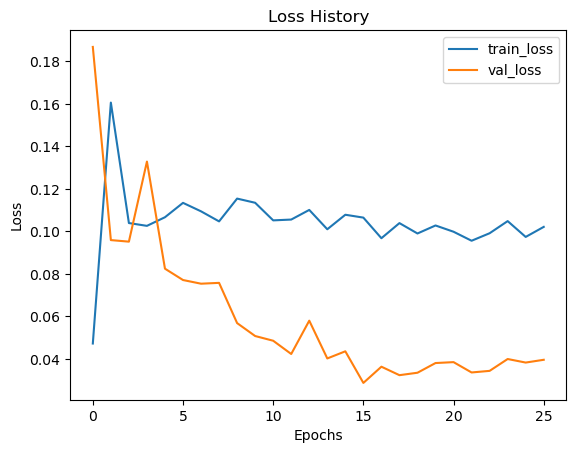

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

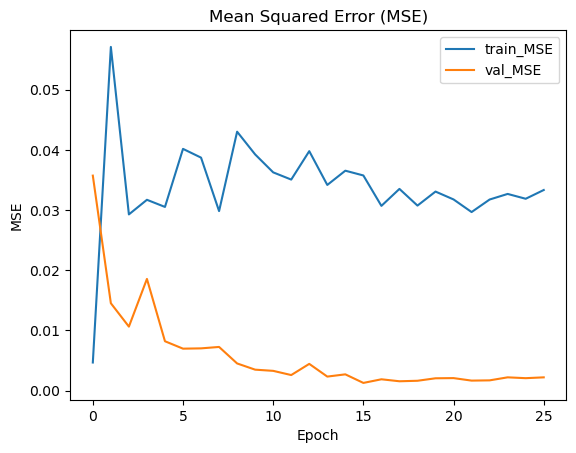

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

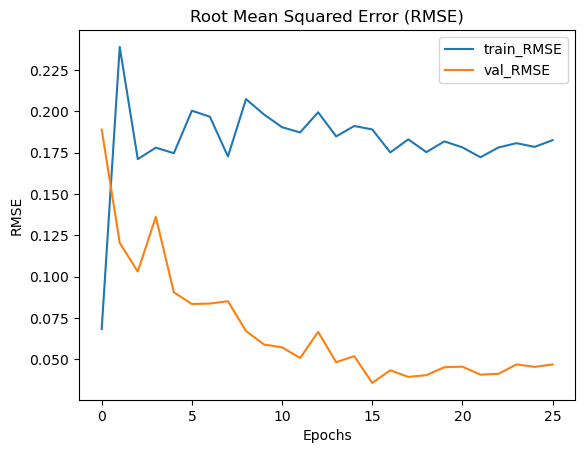

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

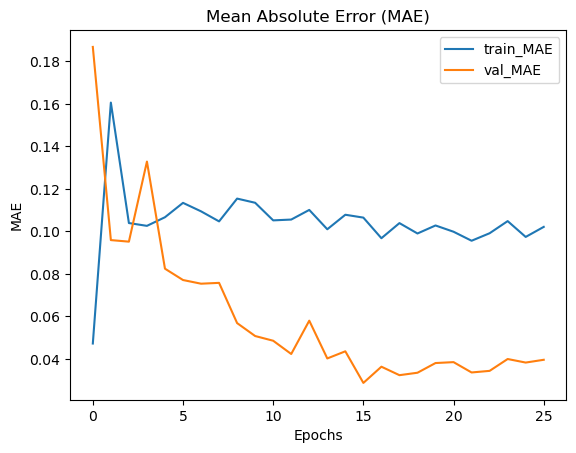

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

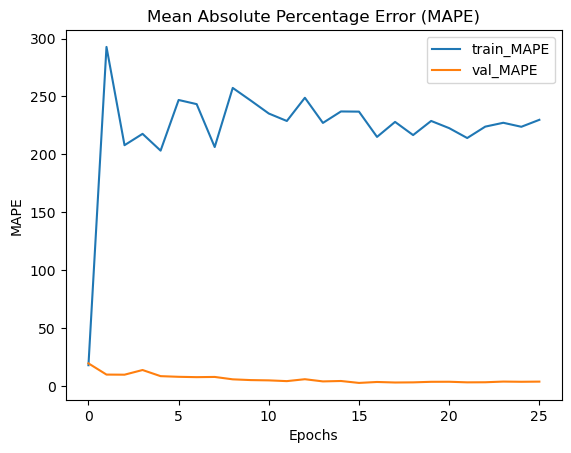

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:26:46.718521: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 5)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


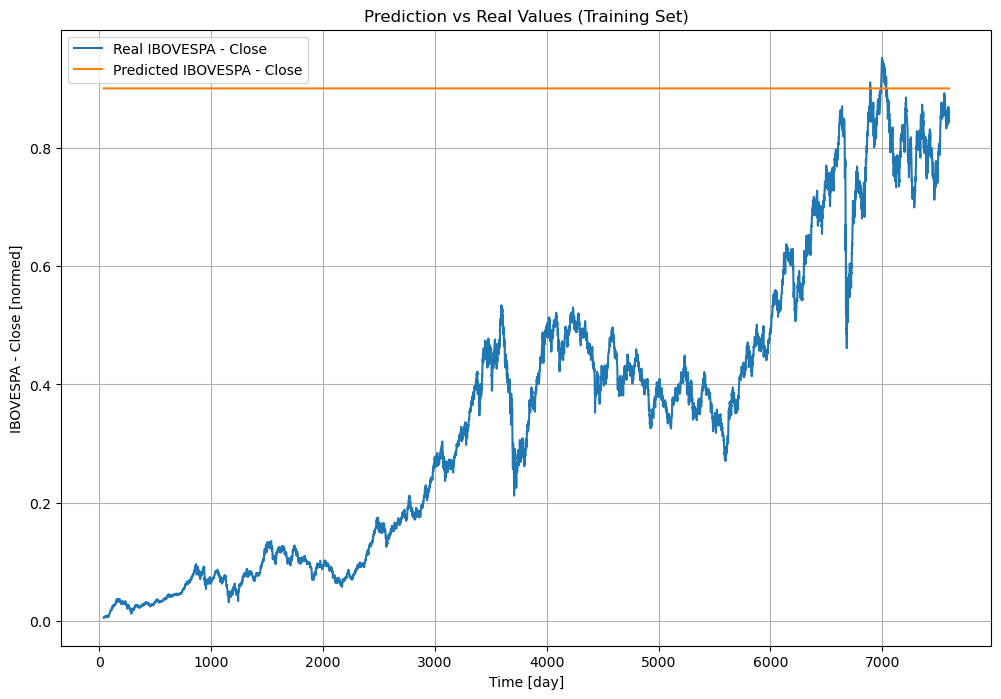

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 5)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


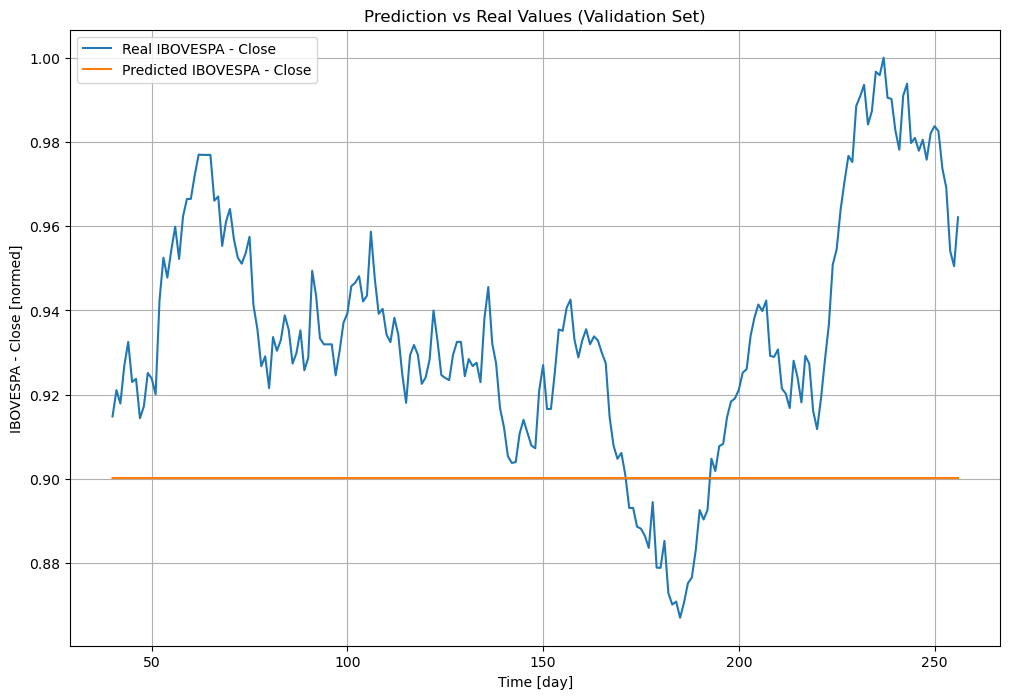

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 5)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


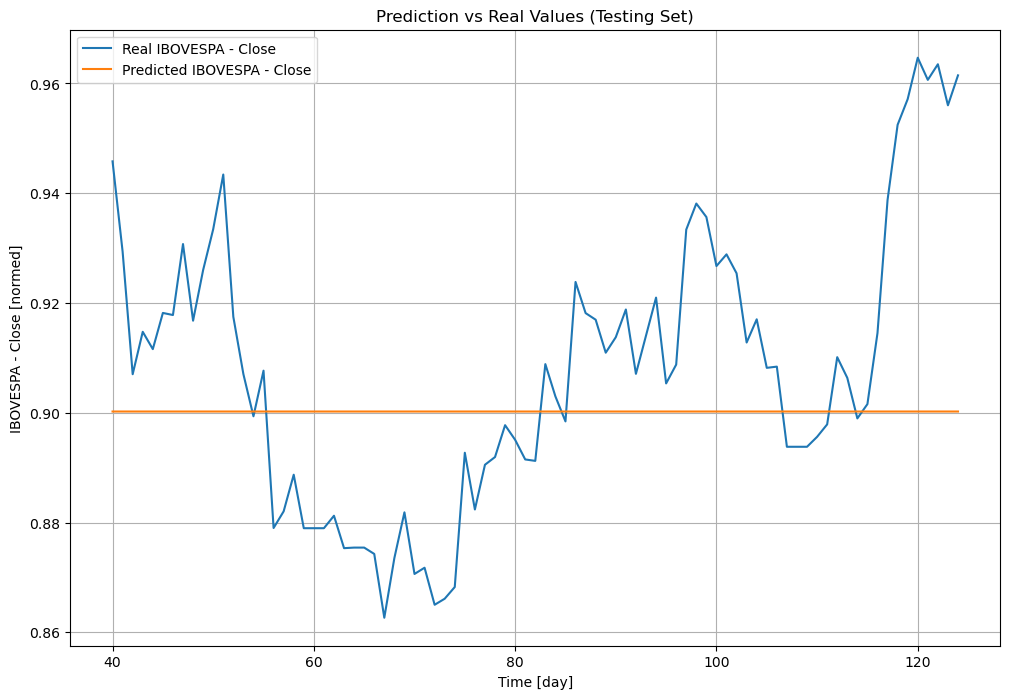

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

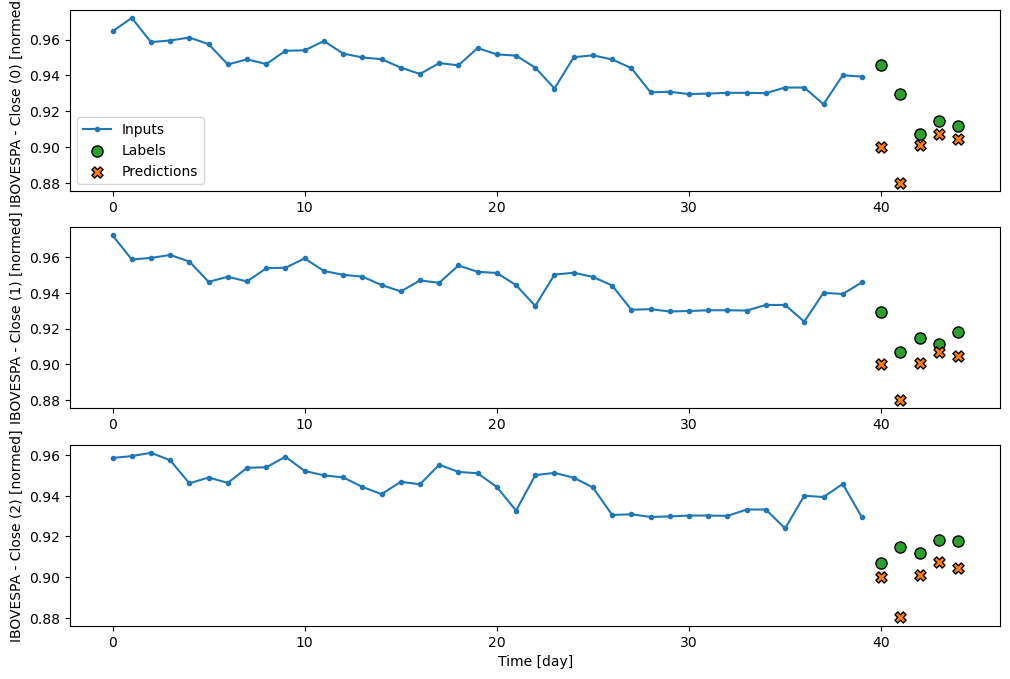

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:26s:866ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step


array([[[0.90023017, 0.90023017, 0.90023017, ..., 0.90023017,
         0.90023017, 0.90023017],
        [0.88013434, 0.88013434, 0.88013434, ..., 0.88013434,
         0.88013434, 0.88013434],
        [0.90097713, 0.90097713, 0.90097713, ..., 0.90097713,
         0.90097713, 0.90097713],
        [0.90718406, 0.90718406, 0.90718406, ..., 0.90718406,
         0.90718406, 0.90718406],
        [0.904595  , 0.904595  , 0.904595  , ..., 0.904595  ,
         0.90459526, 0.90459526]],

       [[0.90023017, 0.90023017, 0.90023017, ..., 0.90023017,
         0.90023017, 0.90023017],
        [0.8801343 , 0.8801343 , 0.8801343 , ..., 0.8801343 ,
         0.8801343 , 0.8801343 ],
        [0.90097713, 0.90097713, 0.90097713, ..., 0.90097713,
         0.90097713, 0.90097713],
        [0.90718406, 0.90718406, 0.90718406, ..., 0.90718406,
         0.90718406, 0.90718406],
        [0.904595  , 0.904595  , 0.904595  , ..., 0.904595  ,
         0.90459526, 0.90459526]],

       [[0.90023005, 0.90023005, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')